In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [2]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering'

In [3]:
dF = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [4]:
dF.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.0,0.333333,0.50,1.000000,0.75
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,0.0,1.0,0.333333,1.00,0.111111,0.00
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,0.0,1.0,0.666667,0.25,0.111111,0.50
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.0,0.333333,0.00,0.222222,0.75
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.0,0.666667,0.00,0.111111,0.25


In [5]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

In [6]:
dF.describe()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.441784,0.292914,0.227927,0.300518,0.264628,0.444319,0.316308,0.244975,0.368545,0.173273,0.277463,0.440921,0.229898,0.315213,0.471687
std,0.196813,0.294351,0.209842,0.256381,0.288454,0.197971,0.226178,0.214712,0.230461,0.378698,0.448001,0.178532,0.251877,0.276110,0.252071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.079383,0.071429,0.000000,0.333333,0.150000,0.125000,0.185135,0.000000,0.000000,0.333333,0.000000,0.111111,0.250000
50%,0.404762,0.214286,0.156611,0.214286,0.333333,0.333333,0.250000,0.187500,0.329663,0.000000,0.000000,0.333333,0.250000,0.222222,0.500000
75%,0.571429,0.464286,0.301351,0.500000,0.333333,0.500000,0.450000,0.437500,0.502469,0.000000,1.000000,0.666667,0.250000,0.444444,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Feature Selection</h3>

In [7]:
df = pd.DataFrame()

columns_to_add = ['JobLevel', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'OverallSatisfaction']

for element in columns_to_add:
    df[element] = dF[element]
    
df

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction
0,0.50,0.000000,0.40,0.4375,0.333333
1,1.00,0.333333,0.05,0.5000,0.333333
2,0.25,0.333333,0.05,0.3125,0.666667
3,0.00,0.000000,0.15,0.4375,0.333333
4,0.00,0.000000,0.50,0.1250,0.666667
...,...,...,...,...,...
878,0.00,0.000000,0.50,0.0000,0.666667
879,0.00,0.666667,0.85,0.0000,0.666667
880,0.25,0.000000,0.55,0.4375,0.333333
881,0.25,0.000000,0.15,0.1250,0.333333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JobLevel             883 non-null    float64
 1   StockOptionLevel     883 non-null    float64
 2   YearsAtCompany       883 non-null    float64
 3   YearsInCurrentRole   883 non-null    float64
 4   OverallSatisfaction  883 non-null    float64
dtypes: float64(5)
memory usage: 34.6 KB


In [9]:
df.describe()

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction
count,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.229898,0.264628,0.316308,0.244975,0.440921
std,0.251877,0.288454,0.226178,0.214712,0.178532
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.150000,0.125000,0.333333
50%,0.250000,0.333333,0.250000,0.187500,0.333333
75%,0.250000,0.333333,0.450000,0.437500,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Convert the DataFrame to a numpy array:
train_data = df.values

In [11]:
train_data

array([[0.5       , 0.        , 0.4       , 0.4375    , 0.33333333],
       [1.        , 0.33333333, 0.05      , 0.5       , 0.33333333],
       [0.25      , 0.33333333, 0.05      , 0.3125    , 0.66666667],
       ...,
       [0.25      , 0.        , 0.55      , 0.4375    , 0.33333333],
       [0.25      , 0.        , 0.15      , 0.125     , 0.33333333],
       [0.25      , 0.        , 0.5       , 0.25      , 0.33333333]])

In [12]:
type(train_data)

numpy.ndarray

<h3>K-means</h3>

We run the k-means algorithm with a range of k from 2 to 50 to find the optimal k, depending on four measures: Sum of Squared Error, Silhouette Score, Calinski-Harabaz Score and Davies-Bouldin Score.

* <b>Sum of Squared Error</b>
    Sum of squared distances of samples to their closest cluster center.

* <b>Silhouette Score</b>
    Compute the mean Silhouette Coefficient of all samples.
    The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
    This function returns the mean Silhouette Coefficient over all samples. 
    The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
    
* <b>Calinski and Harabasz score</b>
    It is also known as the Variance Ratio Criterion.
    The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.
    
* <b>Davies-Bouldin score</b>
   The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
    The minimum score is zero, with lower values indicating better clustering.

k:  2 SSE:  192.77733072186055 Silhouette Score:  0.23294441787527936 
 Calinski-Harabaz:  230.61406436543027 Davies-Bouldin:  1.8283911180869297

k:  3 SSE:  152.52077835785397 Silhouette Score:  0.24928586242130577 
 Calinski-Harabaz:  261.70319535523066 Davies-Bouldin:  1.4847663988162711

k:  4 SSE:  133.4095910564112 Silhouette Score:  0.20605569885936112 
 Calinski-Harabaz:  241.20796382333216 Davies-Bouldin:  1.4664214957219779

k:  5 SSE:  121.57249978796348 Silhouette Score:  0.20665104816967808 
 Calinski-Harabaz:  219.66626141895657 Davies-Bouldin:  1.5497133476502916

k:  6 SSE:  112.01638165375593 Silhouette Score:  0.20014367173307782 
 Calinski-Harabaz:  205.47094165747907 Davies-Bouldin:  1.4884681794213581

k:  7 SSE:  104.10999250781911 Silhouette Score:  0.2062955026095781 
 Calinski-Harabaz:  195.10668532665093 Davies-Bouldin:  1.412229731627693

k:  8 SSE:  99.3745406087892 Silhouette Score:  0.1965144693173777 
 Calinski-Harabaz:  180.96001225434924 Davies-Bouldin

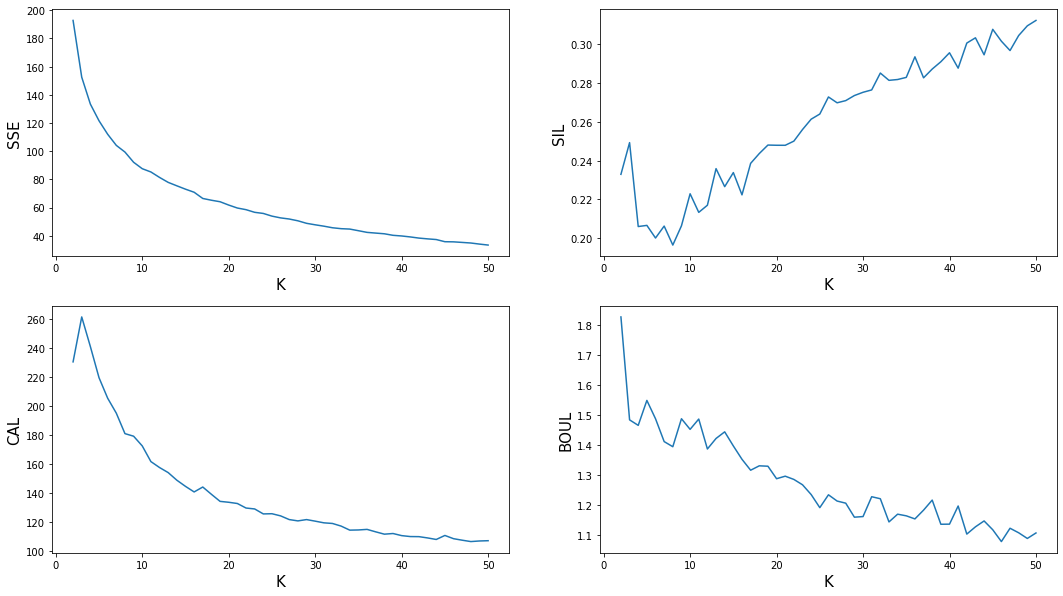

In [13]:
max_k = 50
sse_list = list()
silhouette = list()
calinski = list()
bouldin = list()
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
    
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, algorithm='full')
    kmeans.fit(train_data)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
    sil = silhouette_score(train_data, kmeans.labels_)
    silhouette.append(sil)
    
    cal = calinski_harabasz_score(train_data, kmeans.labels_)
    calinski.append(cal)
    
    boul = davies_bouldin_score(train_data, kmeans.labels_)
    bouldin.append(boul)
    
    print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil, "\n",
         "Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
    print()
        
ax[0, 0].plot(range(2, len(sse_list) + 2), sse_list)
ax[0, 0].set_ylabel('SSE', fontsize=15)
ax[0, 0].set_xlabel('K', fontsize=15)
    
ax[0, 1].plot(range(2, len(silhouette) + 2), silhouette)
ax[0, 1].set_ylabel('SIL', fontsize=15)
ax[0, 1].set_xlabel('K', fontsize=15)
    
ax[1, 0].plot(range(2, len(calinski) + 2), calinski)
ax[1, 0].set_ylabel('CAL', fontsize=15)
ax[1, 0].set_xlabel('K', fontsize=15)
    
ax[1, 1].plot(range(2, len(bouldin) + 2), bouldin)
ax[1, 1].set_ylabel('BOUL', fontsize=15)
ax[1, 1].set_xlabel('K', fontsize=15)
    
plt.show()
fig.tight_layout()

Analyzing the results obtained by running the kmeans algorithm, we observed that the optimal value of k is 3, as the sum of squared error is quite low and the other three evaluation metrics used report a better value for k = 3.
Then we run the kmeans by initializing the <b>number of clusters to 3</b>.

In [14]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', n_init=1000, max_iter=10000, algorithm='full')
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('Labels: ', dict(zip(bins, hist)))
print()
print ('SSE: ', kmeans.inertia_)
print ('Silhouette Score: ', silhouette_score(train_data, kmeans.labels_))
print ("Calinski - Harabaz Score: ", calinski_harabasz_score(train_data, kmeans.labels_))
print ("Davies - Bouldin Score: ", davies_bouldin_score(train_data, kmeans.labels_))

centers [[0.49528302 0.18616352 0.31471698 0.43278302 0.43396226]
 [0.09235669 0.1457891  0.31613588 0.14026008 0.44019816]
 [0.19217687 0.78684807 0.31972789 0.24192177 0.45578231]]

Labels:  {0: 265, 1: 471, 2: 147}

SSE:  152.52077835785397
Silhouette Score:  0.24928586242130577
Calinski - Harabaz Score:  261.70319535523066
Davies - Bouldin Score:  1.484766398816271


In [15]:
diz_kmeans_3_Features_Notebook = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_3_Features_Notebook['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_3_Features_Notebook['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_3_Features_Notebook['sse'] = float(kmeans.inertia_)
diz_kmeans_3_Features_Notebook['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))
diz_kmeans_3_Features_Notebook['calinski'] = float(calinski_harabasz_score(train_data, kmeans.labels_))
diz_kmeans_3_Features_Notebook['bouldin'] = float(davies_bouldin_score(train_data, kmeans.labels_))

In [16]:
with open('diz_kmeans_3_Features_Notebook.json', 'w') as fp:
    json.dump(diz_kmeans_3_Features_Notebook, fp, indent=4)

In [17]:
df['Labels'] = kmeans.labels_

In [18]:
df

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction,Labels
0,0.50,0.000000,0.40,0.4375,0.333333,0
1,1.00,0.333333,0.05,0.5000,0.333333,0
2,0.25,0.333333,0.05,0.3125,0.666667,1
3,0.00,0.000000,0.15,0.4375,0.333333,1
4,0.00,0.000000,0.50,0.1250,0.666667,1
...,...,...,...,...,...,...
878,0.00,0.000000,0.50,0.0000,0.666667,1
879,0.00,0.666667,0.85,0.0000,0.666667,2
880,0.25,0.000000,0.55,0.4375,0.333333,0
881,0.25,0.000000,0.15,0.1250,0.333333,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JobLevel             883 non-null    float64
 1   StockOptionLevel     883 non-null    float64
 2   YearsAtCompany       883 non-null    float64
 3   YearsInCurrentRole   883 non-null    float64
 4   OverallSatisfaction  883 non-null    float64
 5   Labels               883 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 38.1 KB


In [20]:
np.unique(df['Labels'])

array([0, 1, 2], dtype=int32)

In [21]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([265, 471, 147]))

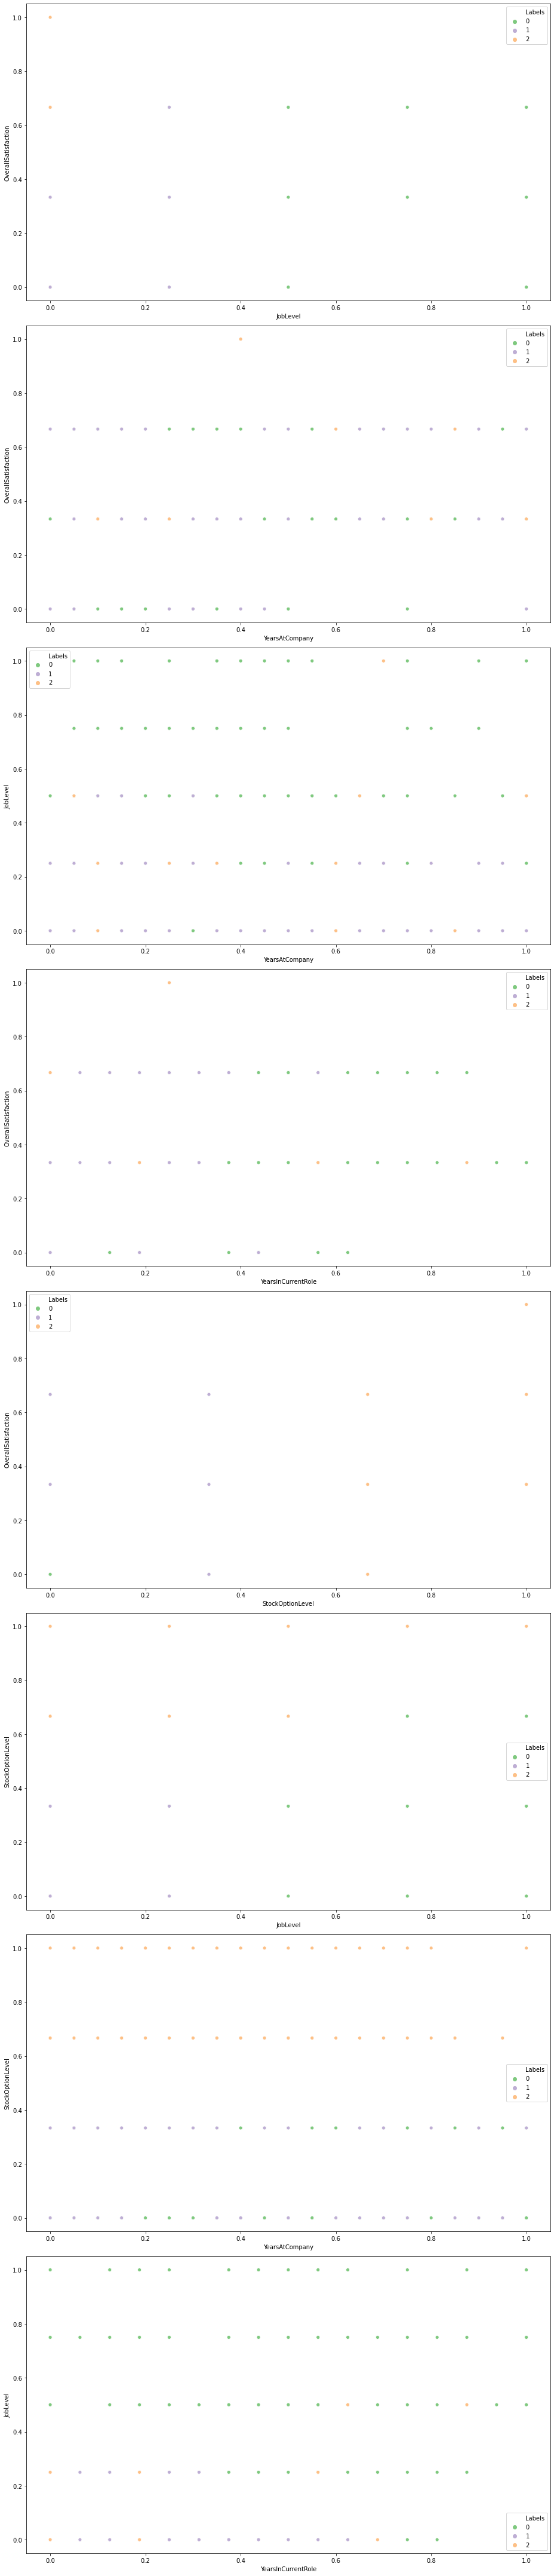

In [42]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize = (13,60))

sns.scatterplot(x = 'JobLevel', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "Accent", ax = ax1)

sns.scatterplot(x = 'YearsAtCompany', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "Accent", ax = ax2)

sns.scatterplot(x = 'YearsAtCompany', y = 'JobLevel', data = df, hue = "Labels", legend = "full", palette = "Accent", ax = ax3)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "Accent", ax = ax4)

sns.scatterplot(x = 'StockOptionLevel', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "Accent", ax = ax5)

sns.scatterplot(x = 'JobLevel', y = 'StockOptionLevel', data = df, hue = "Labels", legend = "full", palette = "Accent", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'StockOptionLevel', data = df, hue = "Labels", legend = "full", palette = "Accent", ax = ax7)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'JobLevel', data = df, hue = "Labels", legend = "full", palette = "Accent", ax = ax8)


plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [23]:
scaler = MinMaxScaler()

In [24]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [25]:
df_NON_normalized

,Age,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyHours,TaxRate,OverallSatisfaction
0,52,0,0,1,0,9,4,2,0,3,...,17,3,0,2,2,8,7,156.61,0.39,2
1,36,0,0,1,0,1,1,2,0,3,...,14,3,1,3,3,1,8,157.94,0.41,2
2,25,0,0,0,1,16,3,3,0,3,...,25,3,1,4,3,1,5,448.06,0.70,3
3,33,0,0,1,0,5,4,2,0,3,...,14,2,0,1,3,3,7,271.91,0.84,2
4,31,0,0,1,0,9,2,3,1,3,...,12,3,0,2,3,10,2,106.37,0.21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,38,1,0,1,0,12,3,3,1,4,...,15,4,0,2,3,10,0,282.47,0.79,3
879,37,0,0,1,0,16,2,4,1,4,...,13,2,2,3,2,17,0,76.29,0.71,3
880,33,1,1,0,0,6,4,2,1,1,...,18,2,0,2,2,11,7,272.88,0.75,2
881,33,0,0,1,0,4,1,3,0,2,...,12,1,0,2,4,3,2,208.67,0.86,2


In [26]:
df_NN = pd.DataFrame()

col_to_add = ['JobLevel', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'OverallSatisfaction']

for element in col_to_add:
    df_NN[element] = df_NON_normalized[element]
    
df_NN

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction
0,3,0,8,7,2
1,5,1,1,8,2
2,2,1,1,5,3
3,1,0,3,7,2
4,1,0,10,2,3
...,...,...,...,...,...
878,1,0,10,0,3
879,1,2,17,0,3
880,2,0,11,7,2
881,2,0,3,2,2


In [27]:
X = scaler.fit_transform(df_NN.values)

In [28]:
print(kmeans.cluster_centers_)

[[0.49528302 0.18616352 0.31471698 0.43278302 0.43396226]
 [0.09235669 0.1457891  0.31613588 0.14026008 0.44019816]
 [0.19217687 0.78684807 0.31972789 0.24192177 0.45578231]]


In [29]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [30]:
print(centers)

[[2.98113208 0.55849057 6.29433962 6.9245283  2.30188679]
 [1.36942675 0.4373673  6.32271762 2.24416136 2.32059448]
 [1.76870748 2.36054422 6.39455782 3.8707483  2.36734694]]


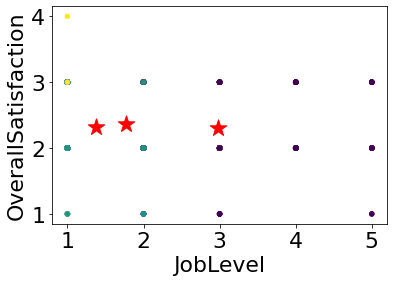

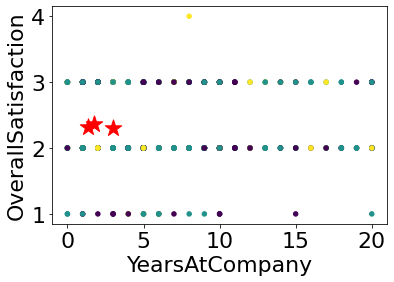

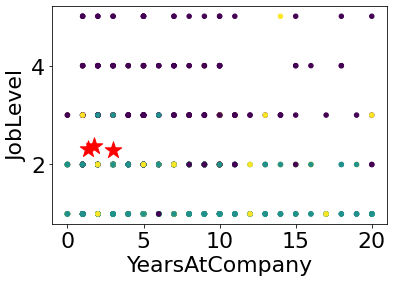

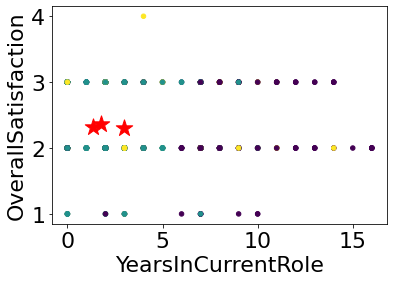

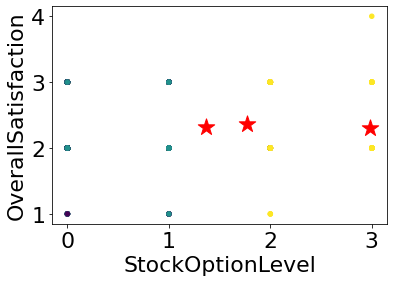

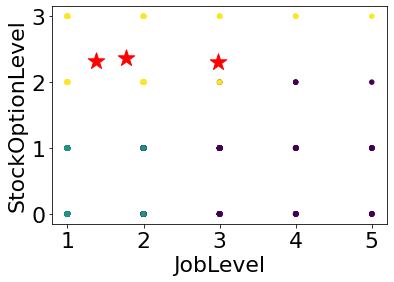

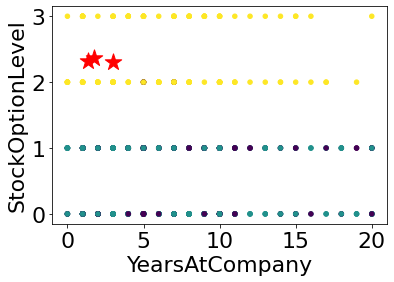

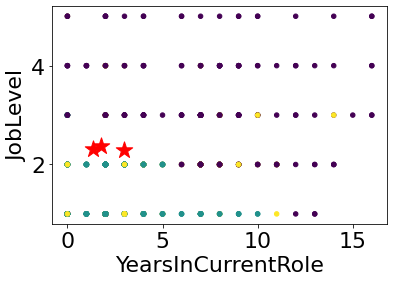

In [32]:
features_to_plot = [('JobLevel', 'OverallSatisfaction'), ('YearsAtCompany', 'OverallSatisfaction'),
                    ('YearsAtCompany', 'JobLevel'), ('YearsInCurrentRole', 'OverallSatisfaction'), 
                    ('StockOptionLevel', 'OverallSatisfaction'), 
                    ('JobLevel', 'StockOptionLevel'), ('YearsAtCompany', 'StockOptionLevel'),
                    ('YearsInCurrentRole', 'JobLevel')]

for a, b in features_to_plot:
    plt.scatter(df_NN[a], df_NN[b], c=kmeans.labels_, s=20)
    plt.scatter(centers[:, 0], centers[:, 4], s=300, marker='*', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

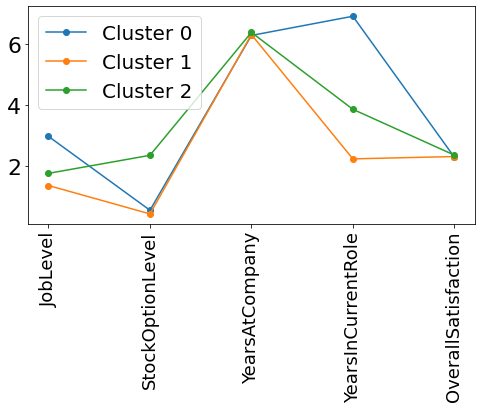

In [33]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_NN.columns)), df_NN.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

In [43]:
df_NN['Labels'] = df['Labels']
df_NON_normalized['Labels'] = df['Labels']

In [35]:
df_NN

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction,Labels
0,3,0,8,7,2,0
1,5,1,1,8,2,0
2,2,1,1,5,3,1
3,1,0,3,7,2,1
4,1,0,10,2,3,1
...,...,...,...,...,...,...
878,1,0,10,0,3,1
879,1,2,17,0,3,2
880,2,0,11,7,2,0
881,2,0,3,2,2,1


In [44]:
df_NON_normalized

,Age,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyHours,TaxRate,OverallSatisfaction,Labels
0,52,0,0,1,0,9,4,2,0,3,...,3,0,2,2,8,7,156.61,0.39,2,0
1,36,0,0,1,0,1,1,2,0,3,...,3,1,3,3,1,8,157.94,0.41,2,0
2,25,0,0,0,1,16,3,3,0,3,...,3,1,4,3,1,5,448.06,0.70,3,1
3,33,0,0,1,0,5,4,2,0,3,...,2,0,1,3,3,7,271.91,0.84,2,1
4,31,0,0,1,0,9,2,3,1,3,...,3,0,2,3,10,2,106.37,0.21,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,38,1,0,1,0,12,3,3,1,4,...,4,0,2,3,10,0,282.47,0.79,3,1
879,37,0,0,1,0,16,2,4,1,4,...,2,2,3,2,17,0,76.29,0.71,3,2
880,33,1,1,0,0,6,4,2,1,1,...,2,0,2,2,11,7,272.88,0.75,2,0
881,33,0,0,1,0,4,1,3,0,2,...,1,0,2,4,3,2,208.67,0.86,2,1


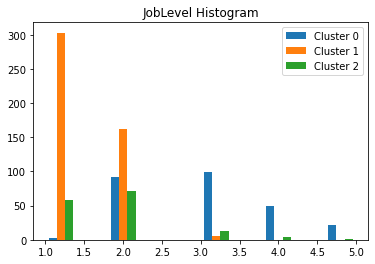

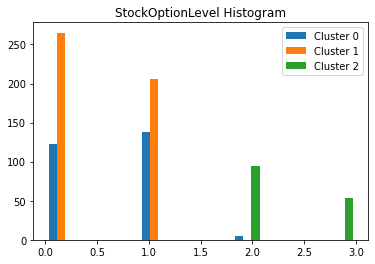

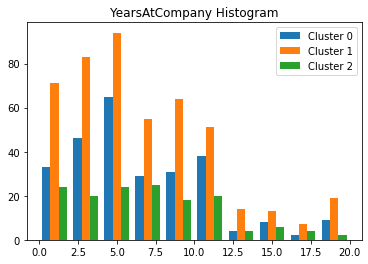

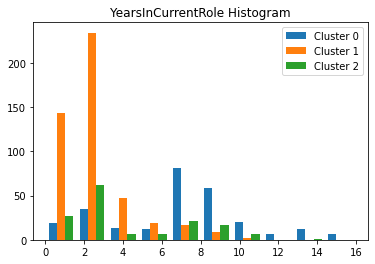

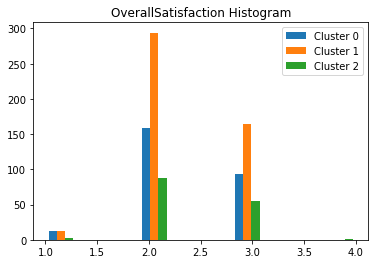

In [37]:
for column in df_NN.columns:
    if column != 'Labels':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df_NN['Labels']):
            cluster_list.append(df_NN[df_NN['Labels'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

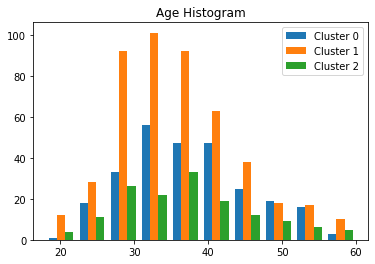

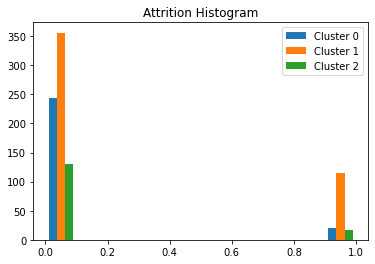

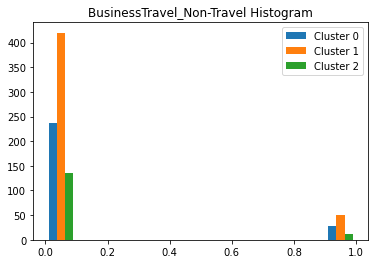

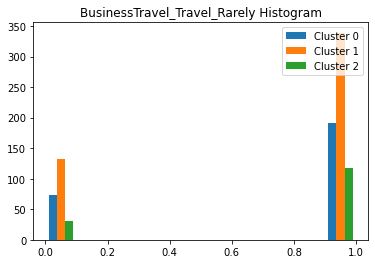

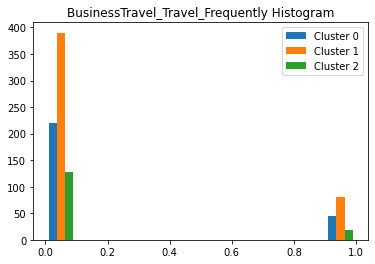

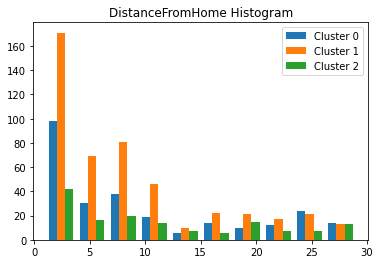

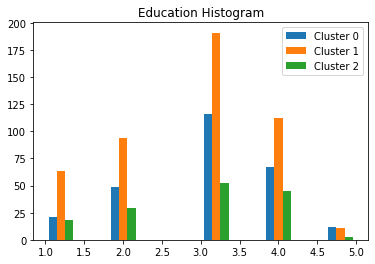

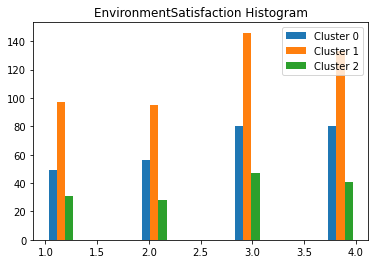

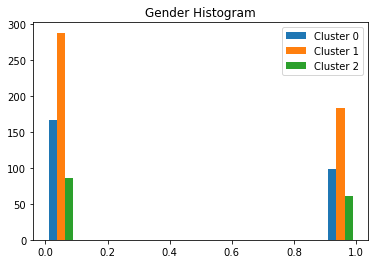

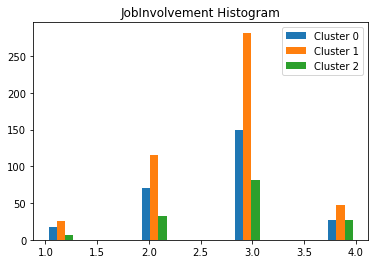

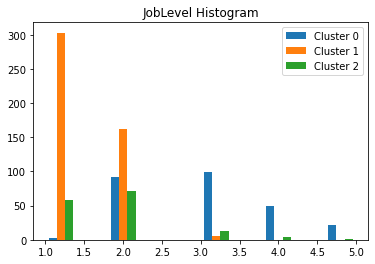

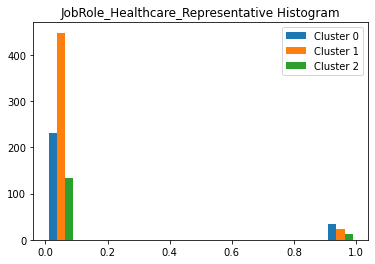

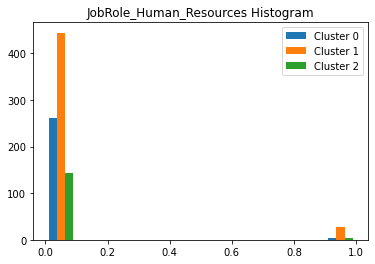

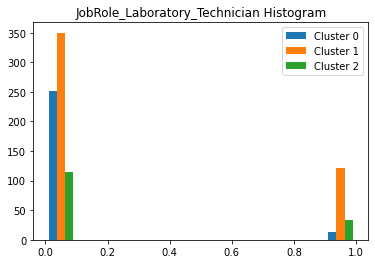

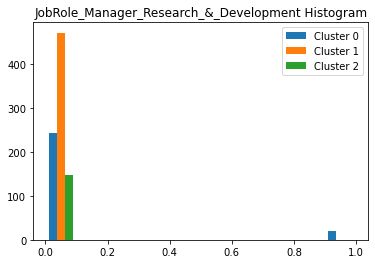

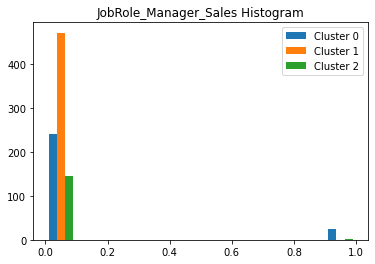

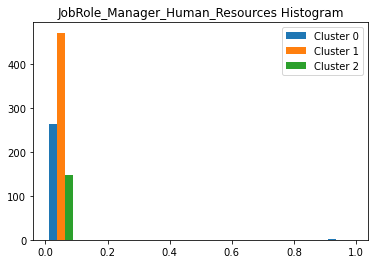

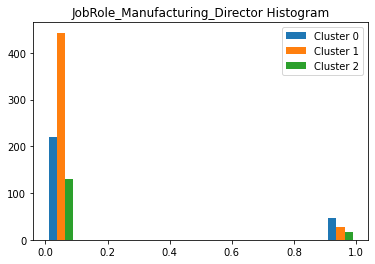

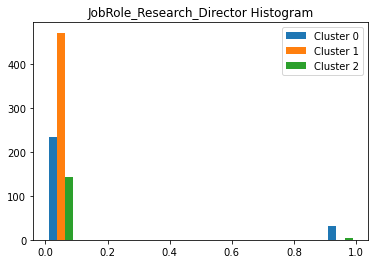

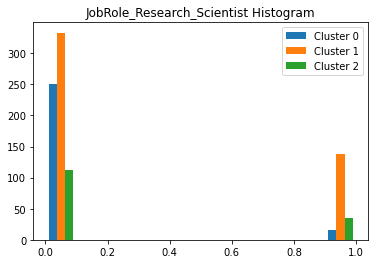

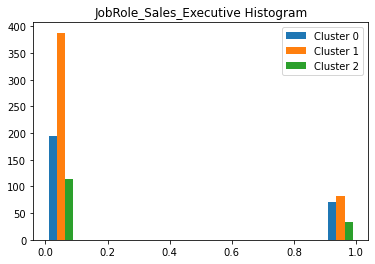

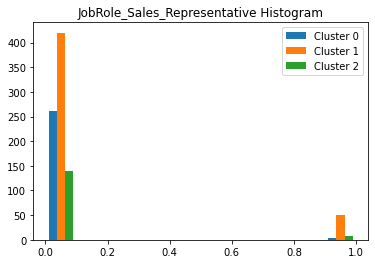

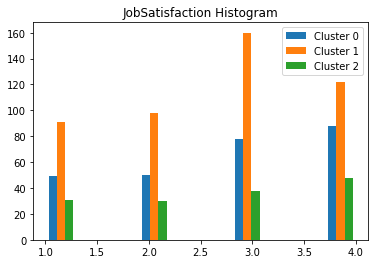

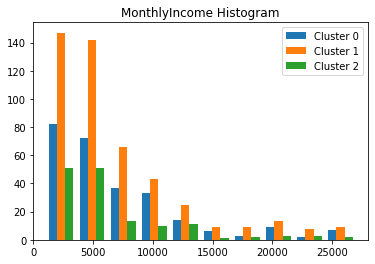

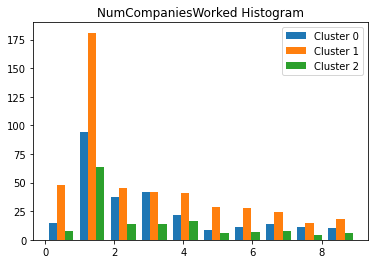

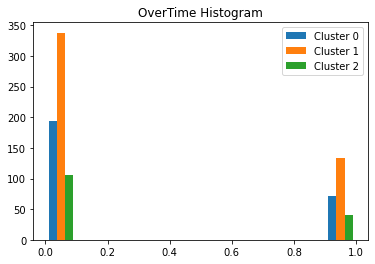

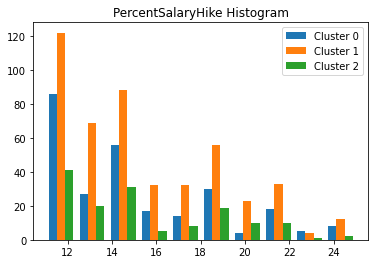

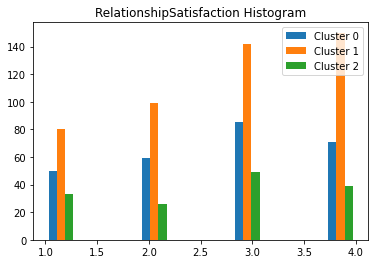

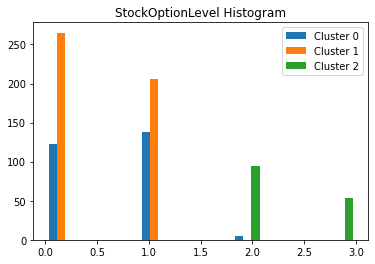

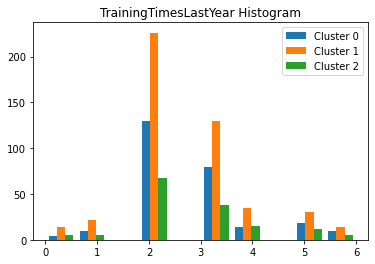

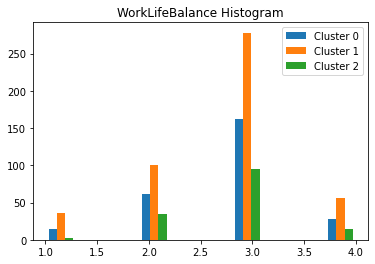

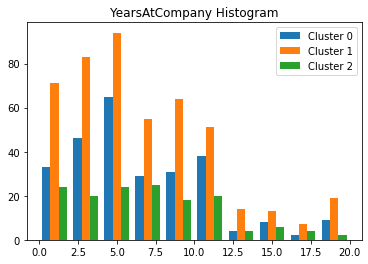

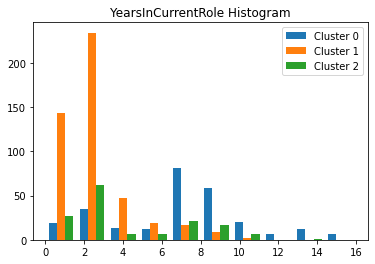

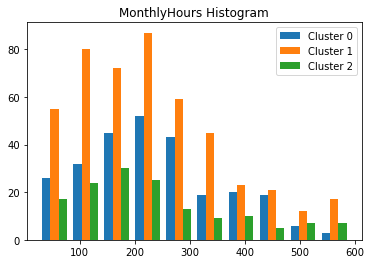

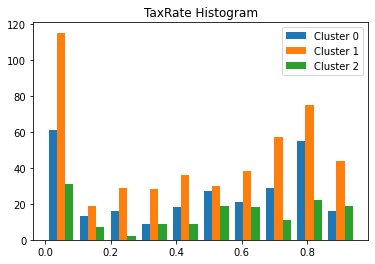

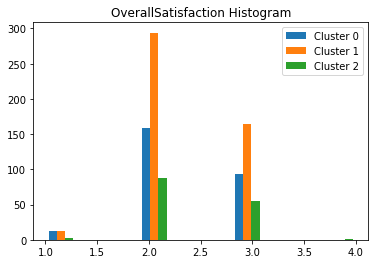

In [46]:
for column in df_NON_normalized.columns:
    if column != 'Labels':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df_NON_normalized['Labels']):
            cluster_list.append(df_NON_normalized[df_NON_normalized['Labels'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

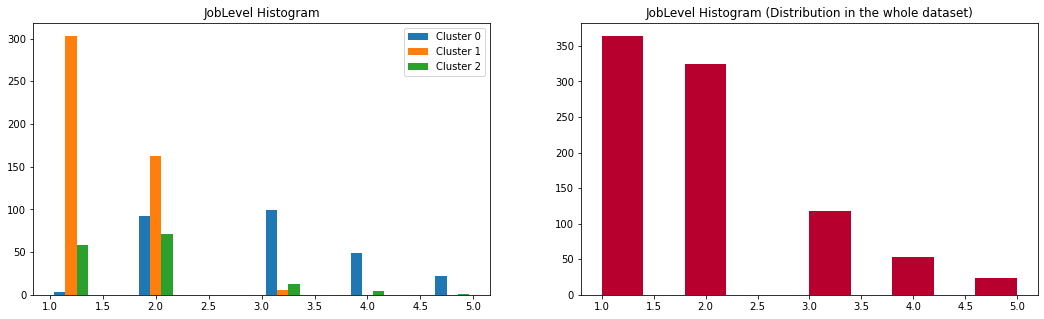

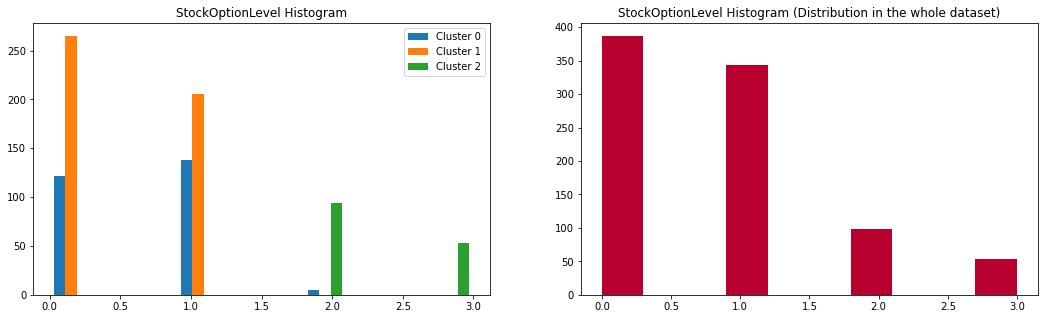

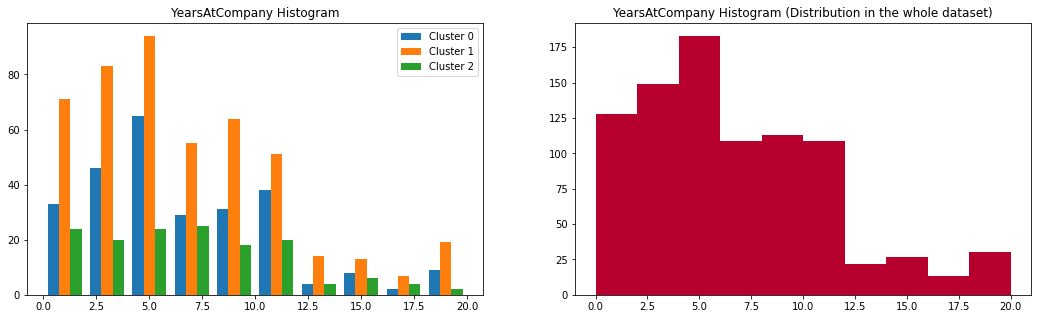

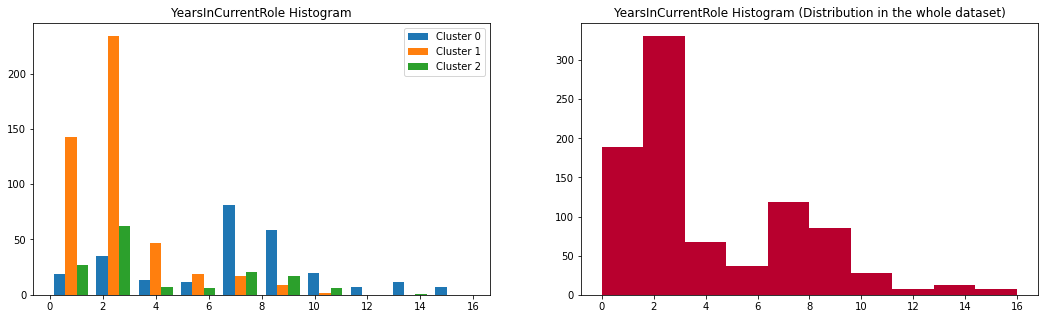

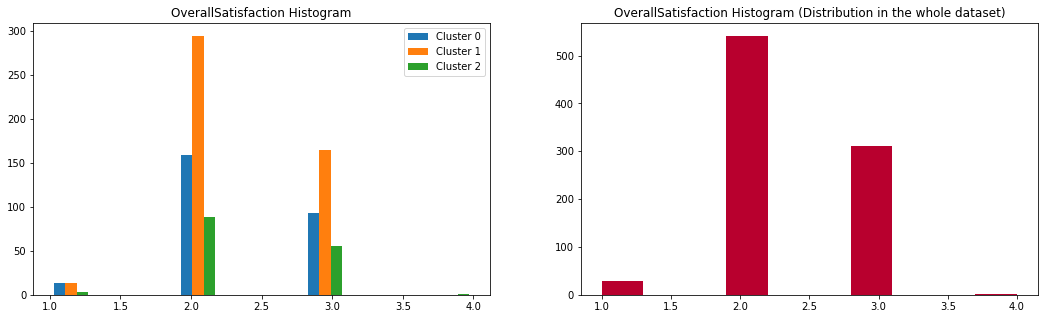

In [65]:
for column in df_NN.columns:
    
    if column != 'Labels':
        
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df_NN['Labels']):
            cluster_list.append(df_NN[df_NN['Labels'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)                 #num cluster

        ax[0].hist(cluster_list, label = list_num_cluster)
        ax[0].legend(loc='upper right')
        ax[0].set_title(column + " Histogram")
        
        ax[1].hist(df_NON_normalized[column], color = "#B8002E")
        ax[1].set_title(column + " Histogram (Distribution in the whole dataset)")
        
        plt.show()

<h2>Comparison of the distribution of variables within the clusters and that in the whole dataset</h2>

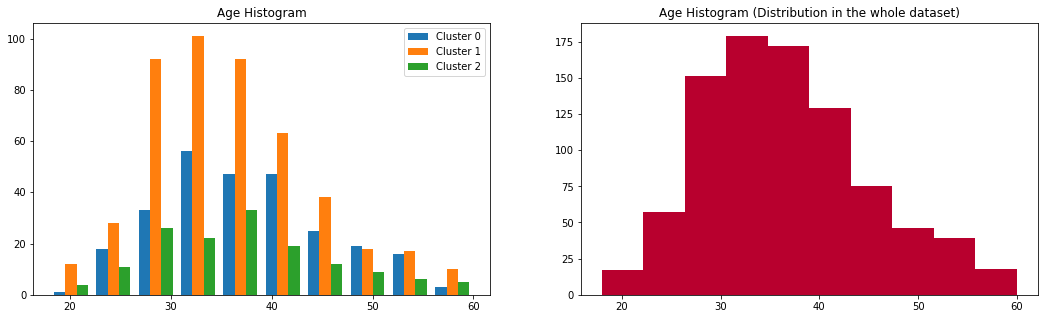

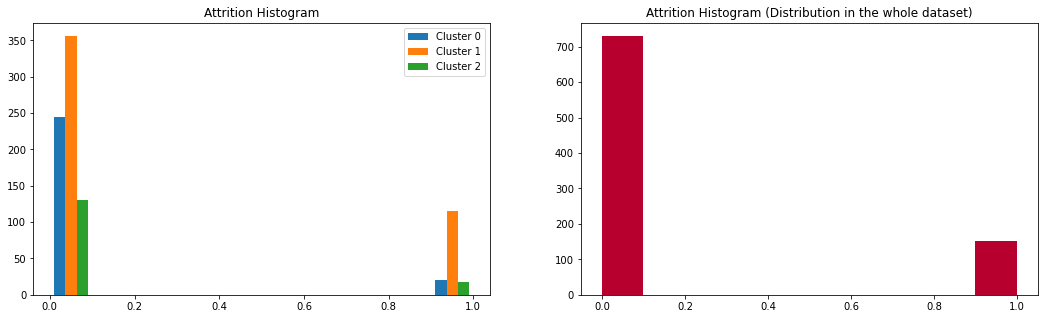

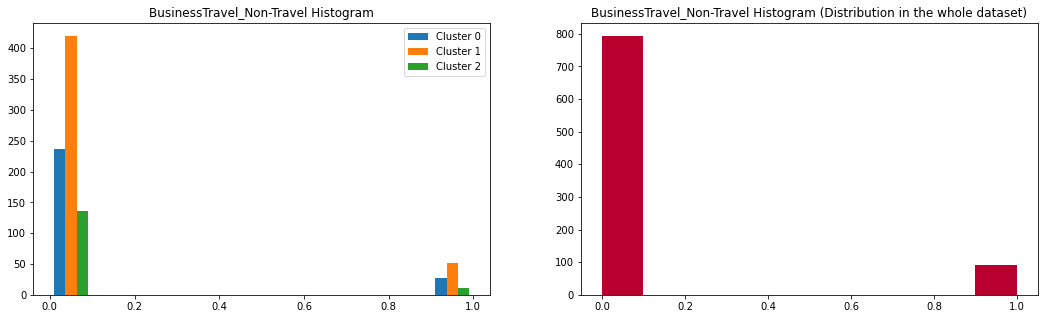

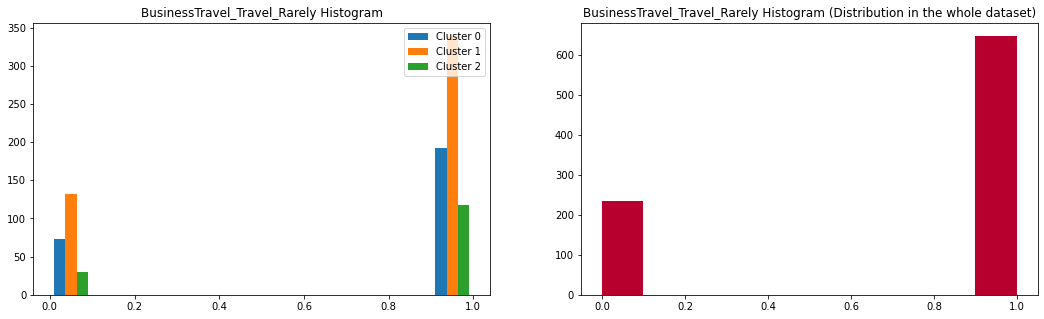

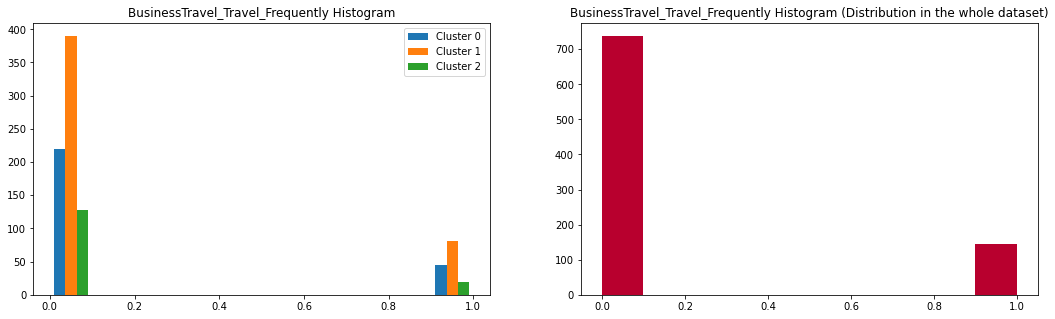

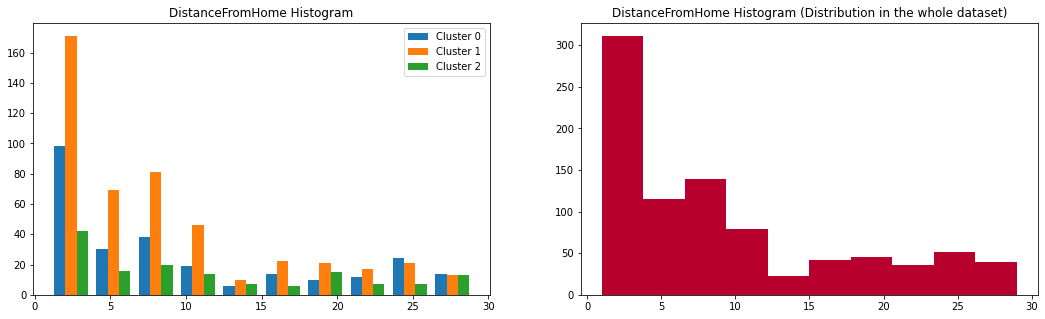

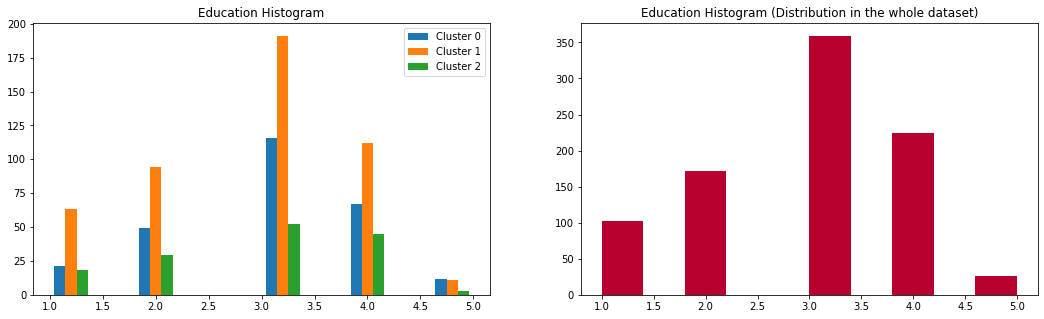

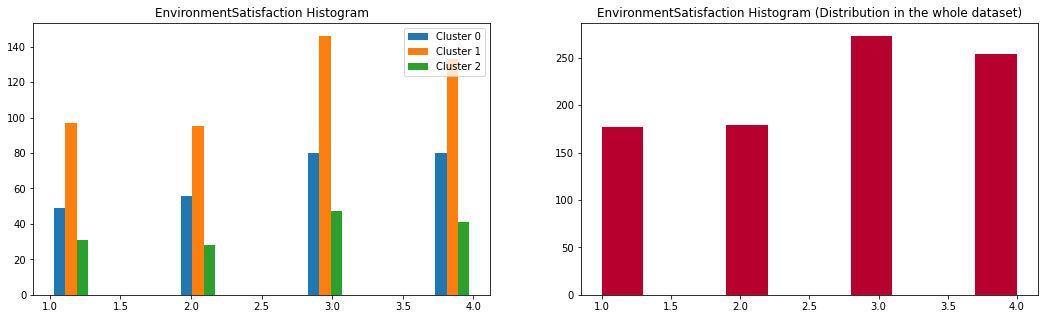

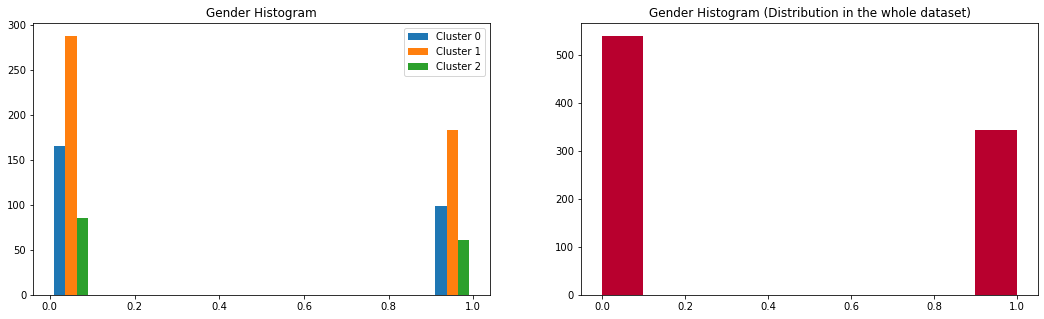

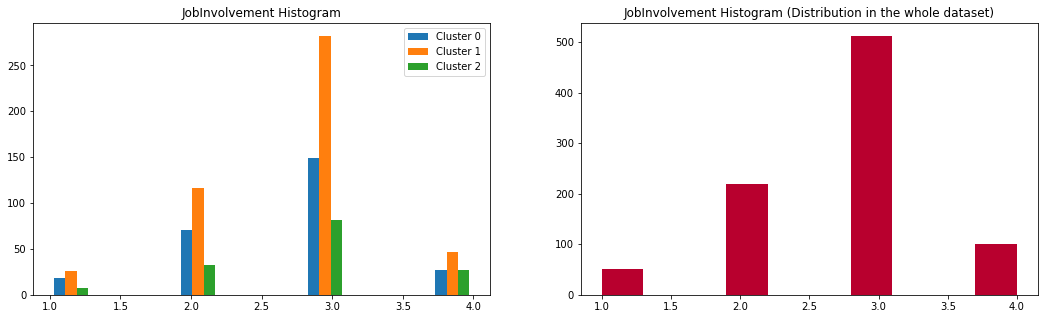

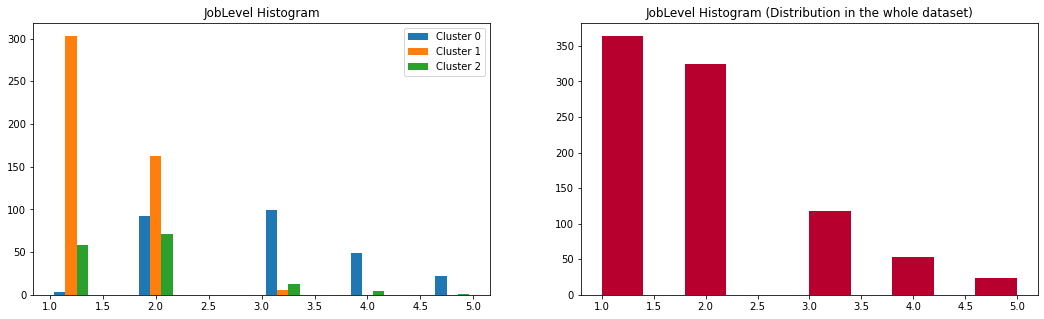

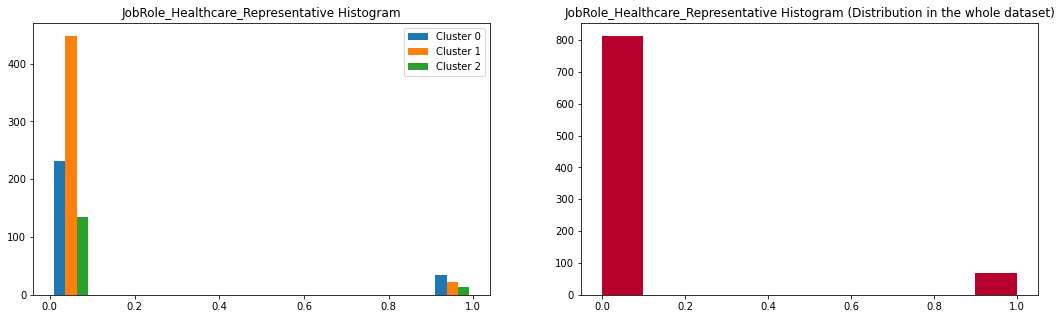

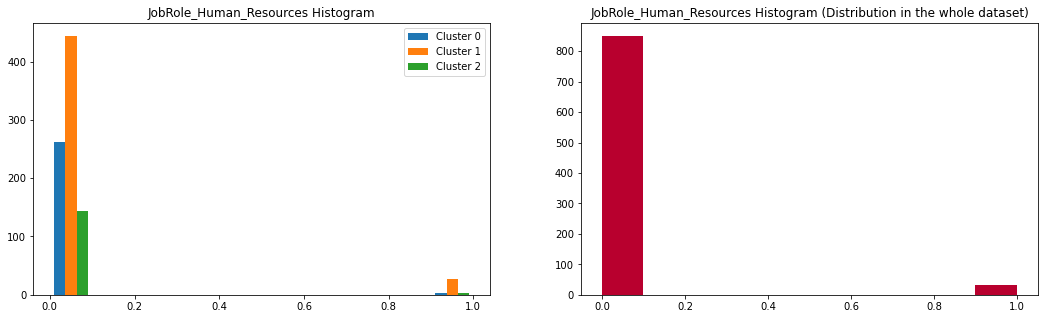

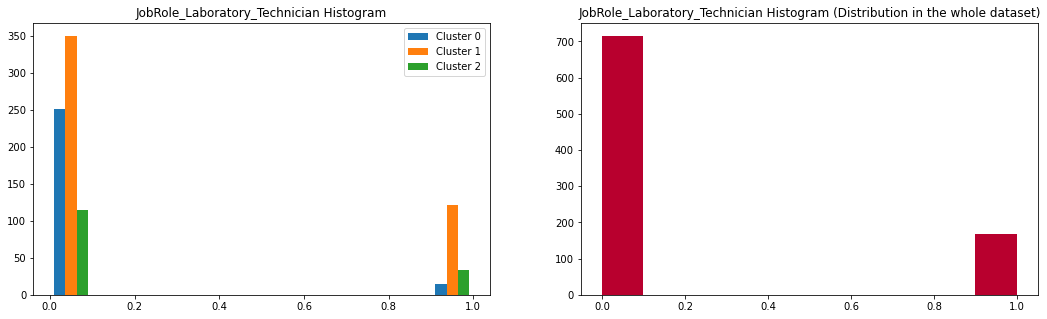

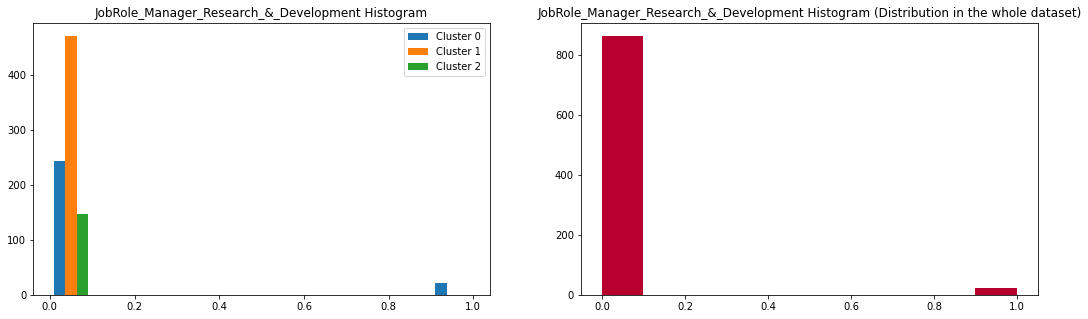

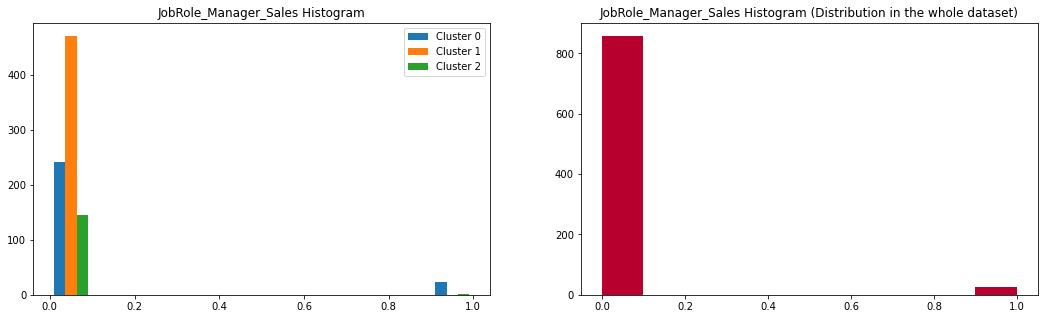

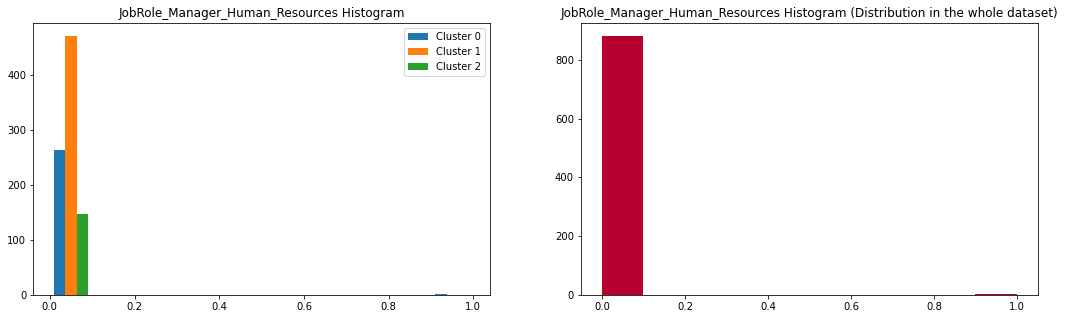

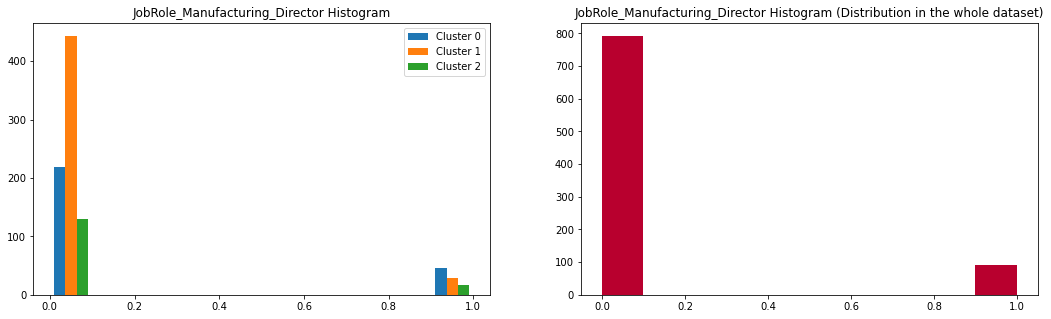

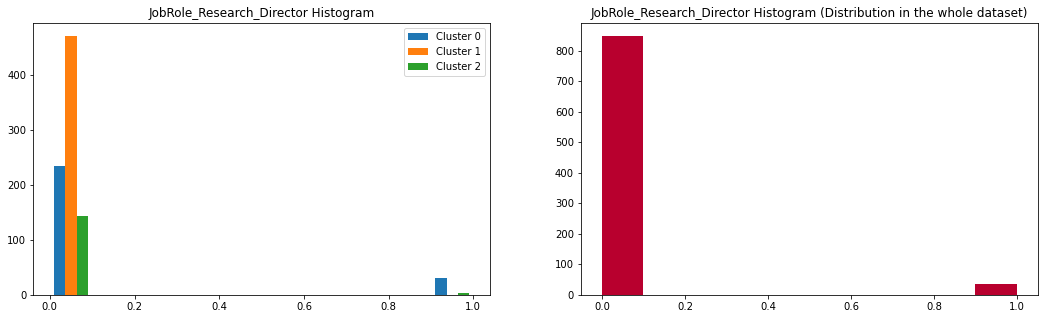

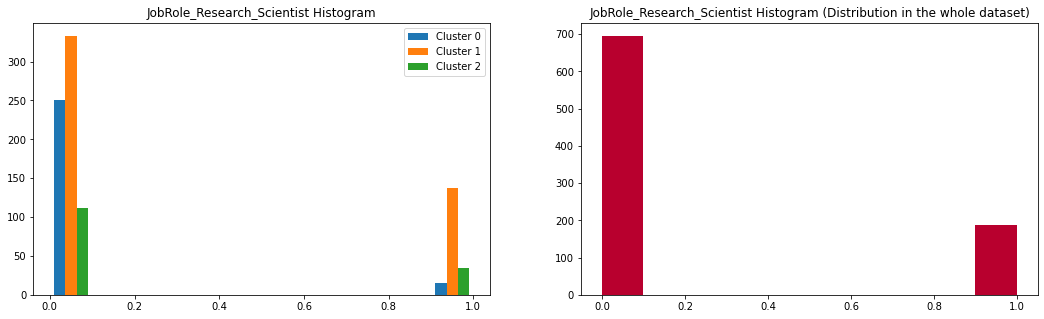

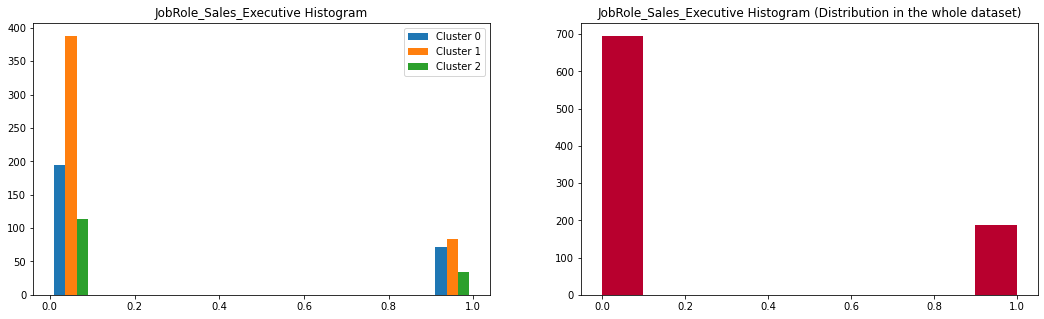

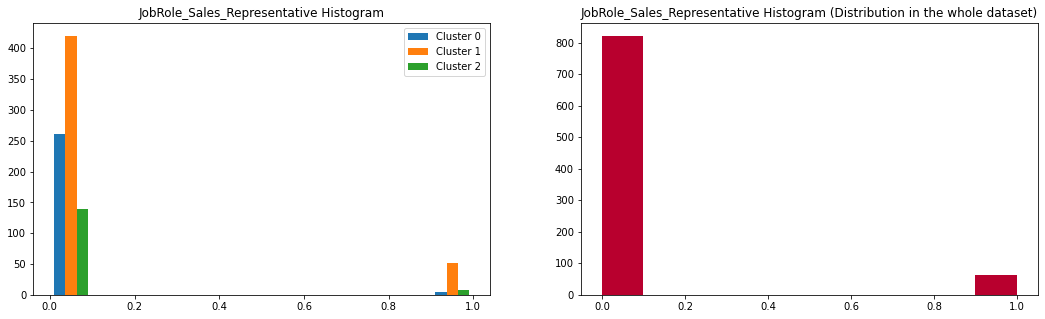

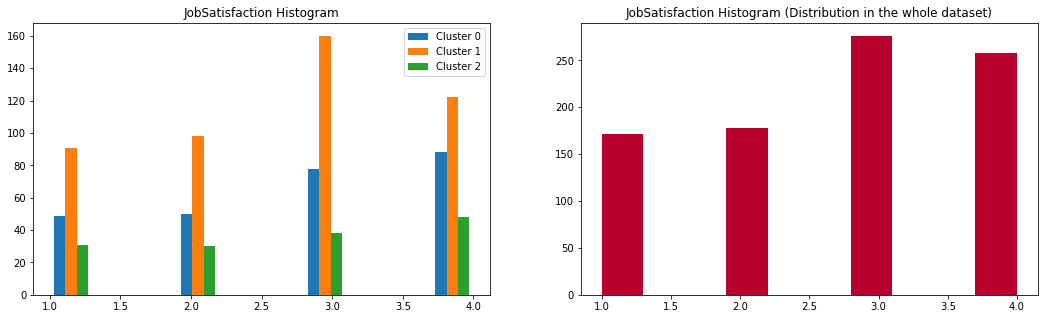

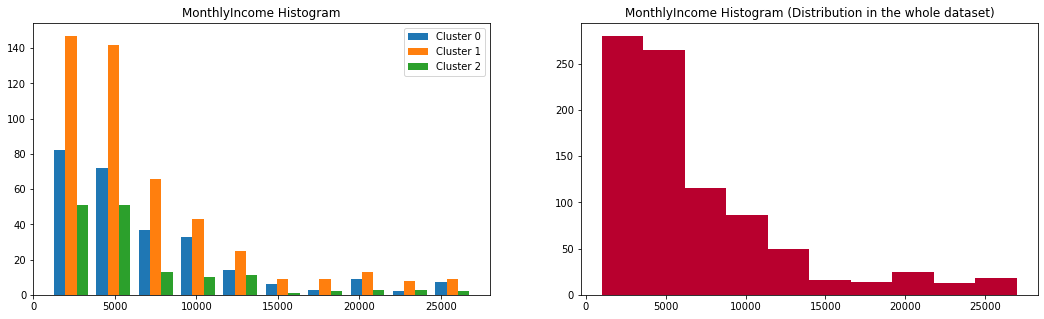

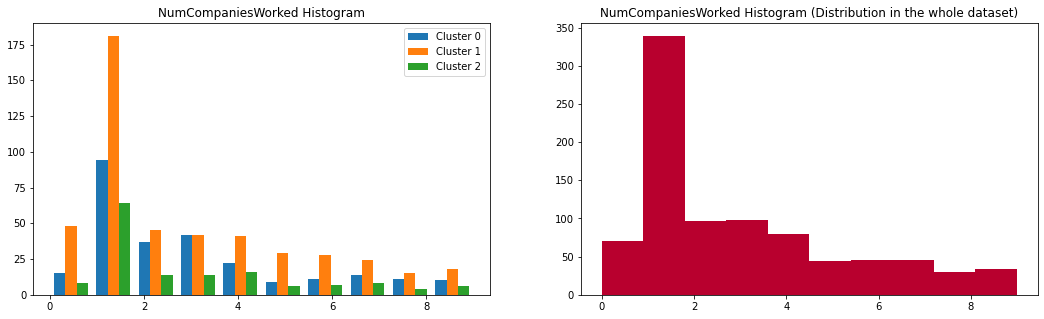

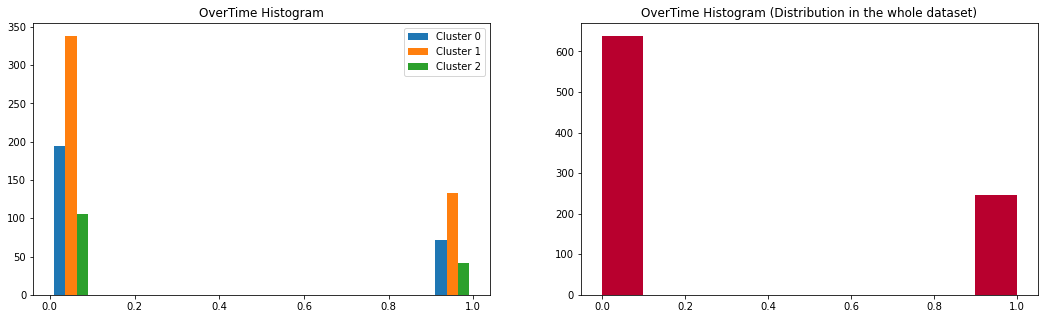

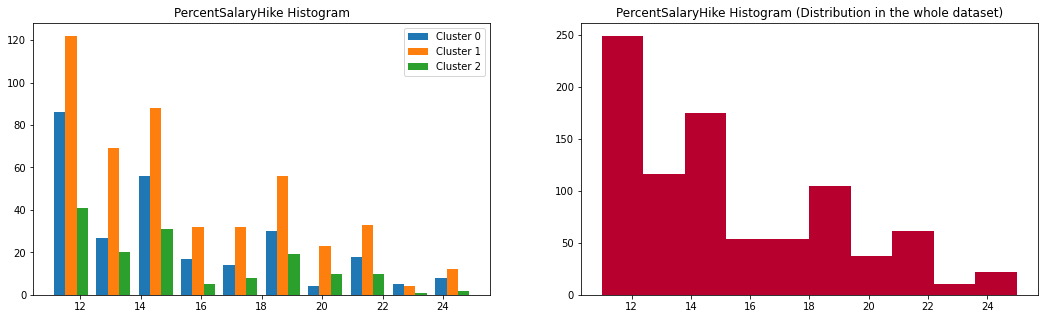

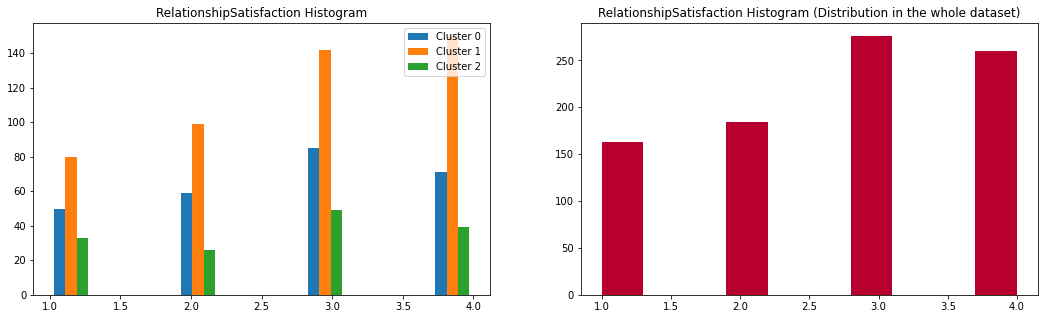

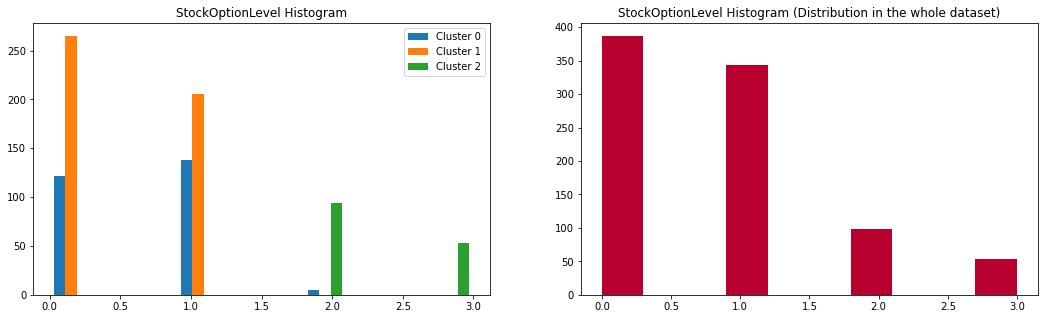

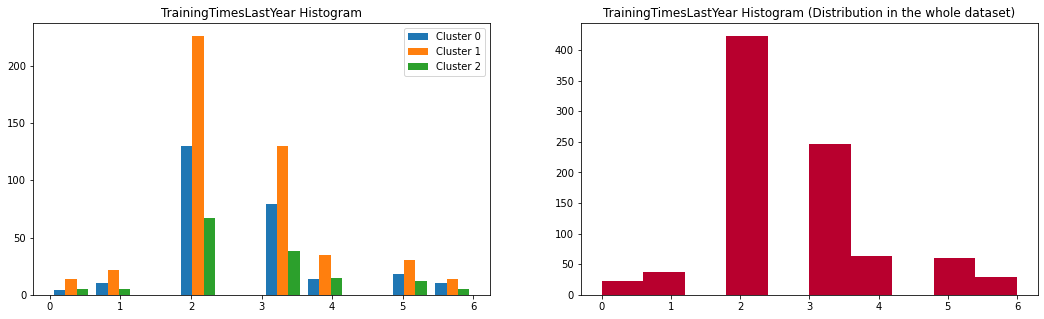

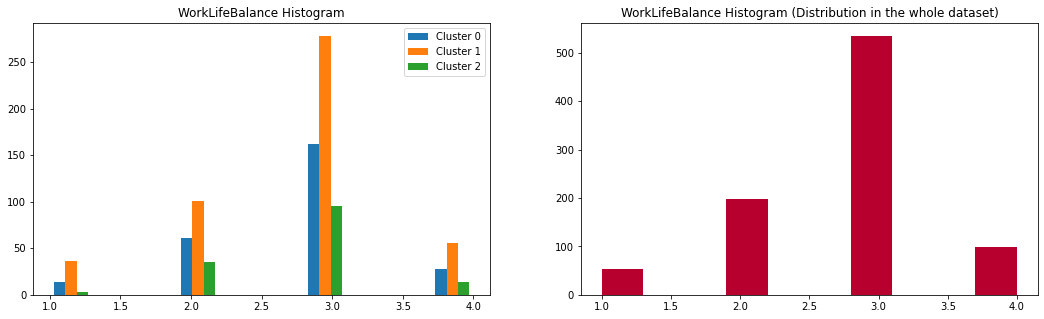

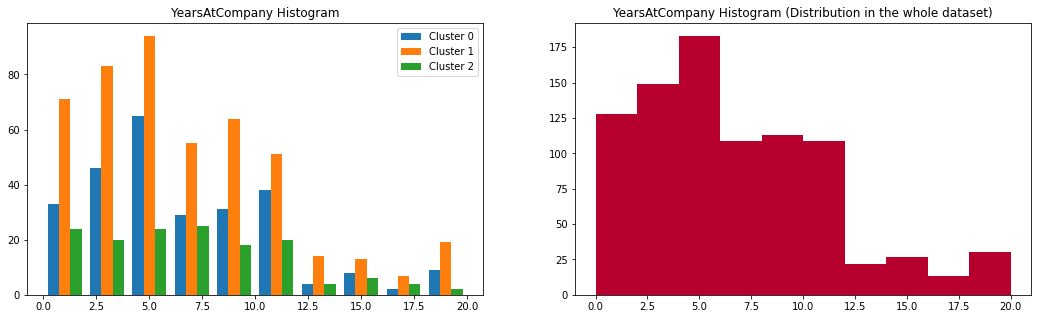

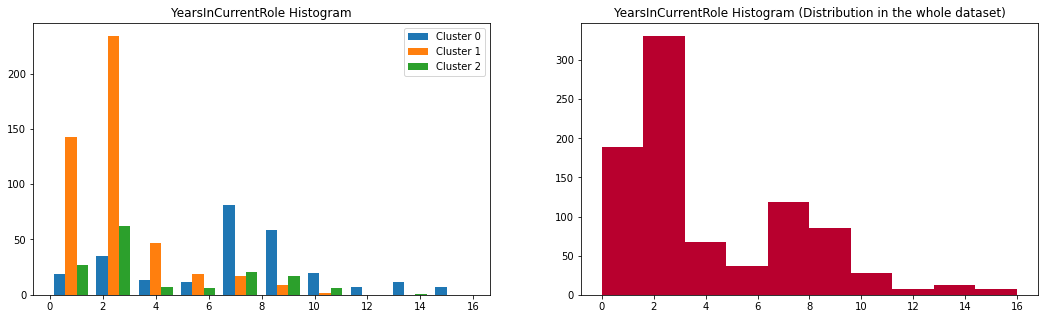

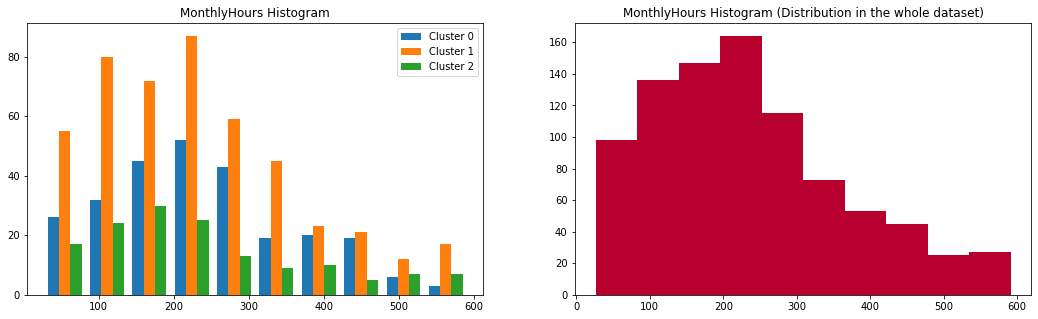

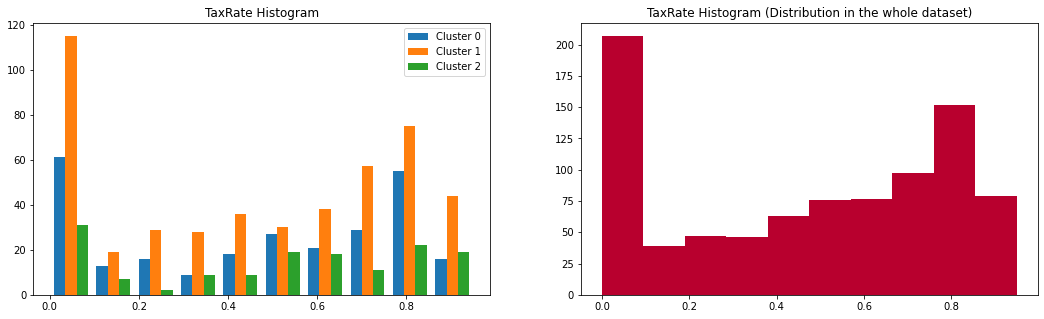

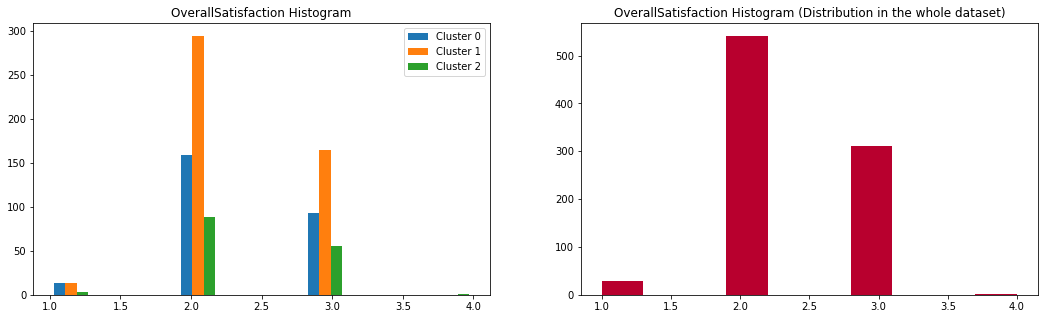

In [64]:
for column in df_NON_normalized.columns:
    
    if column != 'Labels':
        
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df_NON_normalized['Labels']):
            cluster_list.append(df_NON_normalized[df_NON_normalized['Labels'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)                 #num cluster

        ax[0].hist(cluster_list, label = list_num_cluster)
        ax[0].legend(loc='upper right')
        ax[0].set_title(column + " Histogram")
        
        ax[1].hist(df_NON_normalized[column], color = "#B8002E")
        ax[1].set_title(column + " Histogram (Distribution in the whole dataset)")
        
        plt.show()

<h3>Description</h3>

The 3 clusters we obtained from the application of the Kmeans algorithm are composed as follows:

* 0: 265
* 1: 471
* 2: 147

Let's see how the variables are distributed within them compared to how they are distributed in the complete dataset.

• <b>Age</b>:
the distribution of cluster 1 is the one that most closely resembles the distribution in the complete dataset, demonstrating a trend that resembles a normal distribution, although a right asymmetry is evident. The cluster 0 distribution has a similar shape, but on a smaller scale.
Cluster 2 demonstrates an uneven distribution, which deviates from the previous ones and from the distribution in the complete dataset.

• <b>Attrition</b>
With regard to attraction, we note that cluster 1 contains the largest values for the value 0 but also contains the majority of employees who leave the company.
As for the other two clusters, they are more distinguished by the attrition value 0, for which cluster 0 demonstrates higher values, while for the value 1 there is no interesting difference.
All three distributions, albeit on a different scale, recall the distribution of attrition in the complete dataset, for which we observe a majority of employees who do not leave the company.

In this case, being a discrete variable, we cannot say, for any of the three clusters, that it contains only employees who leave the company or who remain, since we observe the values of 0 and 1 for both.
As our goal is to distinguish employees based on their career choice (Attrition), this not very distinct distribution will require further investigation later.

• <b>Business_Travel</b>:
We note, for all three clusters and for all three variables concerning the frequency of trips, that their distribution reflects the distribution of these same variables in the complete dataset, with the only difference being the amount of values contained in them.
As we can see in the distribution of the complete dataset, most employees rarely travel.

• <b>DistanceFromHome</b>
The distribution of the variable within the three clusters reflects, for all three, that of the complete dataset, always with the difference in scale between the three clusters as regards the amount of values within them.
So we can say that the majority of employees are a short distance from home, but even in this case there is no clear difference in values between clusters.

• <b>Education</b>
Also in this case we note that the distribution of the variable within the three clusters reflects, for all three, that of the complete dataset, always with the difference in scale between the three clusters as regards the quantity of values within them. .
The distribution has a shape that resembles a Gaussian, albeit with a slight asymmetry to the left.
As regards the lower values of Education, we observe that there is more difference between cluster 1 and the other two, as the first contains the majority of values; as regards the higher values of Education, we observe a reversal, in fact cluster 0 contains more high values than cluster 1.

• <b>EnvironmentSatisfaction</b>
Clusters 1 and 2 have a distribution that most closely resembles that of the full dataset, while for cluster 0 we have a slight initial growth and subsequent stabilization.
In particular, for clusters 1 and 2 we have a majority of medium-high values for the variable in question, for cluster 0 we observe a sort of parity between medium-high values.

• <b>Gender</b>
Also in this case, the distribution of the genus within the three clusters reflects the distribution in the normal dataset. In clusters 0 and 1 there is a clear majority of men compared to women, while for cluster 2 the difference is less evident.

• <b>JobInvolvement</b>
The distribution of the variable in the three clusters reflects the normal one, and the shape resembles a Gaussian, although there is also a slight left asymmetry here.
As for the higher value of the variable, we observe a majority of values for cluster 1 and a sort of parity between the other two, which in the previous values showed a recurring majority-minority pattern.

• <b>JobLevel</b>
For this variable we observe that the distribution in the complete dataset is represented by clusters 1 and 0: there is a sort of division, which sees a majority of lower values captured by cluster 1 and a majority of higher values captured by cluster 0.
The distribution of the variable within cluster 2 is quite different from that in the complete dataset, as at the beginning we observe a growth instead of a decrease.
So in this case we can say that there is an evident difference in content within the three clusters.

• <b>JobRole_Healthcare_Representative</b>
The distribution of the three clusters reflects that of the complete dataset but, while cluster 1 contains the majority of 0 values, as far as value 1 is concerned, the majority is held by cluster 0.

• <b>JobRole_Human_Resources</b>
The distribution of the three clusters reflects that of the complete dataset but for the value 1 almost all the values are contained in cluster 1, so here too there is an interesting difference in the content of the clusters.

• <b>JobRole_Laboratory_Technician</b>
The distribution of the three clusters reflects that of the full dataset but, in this case, for the value 1, cluster 1 holds the majority. We don't see a particular difference between clusters.

• <b>JobRole_Manager_Research _ & _ Development</b>
In this case cluster 0 reflects more the distribution of the normal dataset, as it contains a majority of 0 values and a minority of 1 values, while for clusters 1 and 2 the distribution is only for the value 0.
However, we can see a clear difference between clusters, as clusters 1 and 2 do not contain 1 values of the variable in question.

• <b>JobRole_Manager_Sales</b>
Also in this case cluster 0 reflects more the distribution of the normal dataset, as it contains a majority of 0 values and a minority of 1 values, while for cluster 1 the distribution is only for the value 0 and cluster 2 contains a very small amount of values 1.
Again we can see a clear difference between clusters in terms of content.

• <b>JobRole_Manager_Human_Resources</b>
In this case, the distribution in the complete dataset is reflected more by cluster 2, since for the value 1 it is the only one that contains few values, but in reality it is the cluster that contains fewer values even than the value 0.

• <b>JobRole_Manufacturing_Director</b>
The distribution in the complete dataset is "respected" by all three clusters, except that cluster 1 contains the majority of the values for 0, while cluster 0 contains the majority of values for the value 1.

• <b>JobRole_Research_Director</b>
Cluster 0 has a distribution that most closely resembles that of the full dataset, although with fewer values for 0 than cluster 1. For value 1, it is the cluster that contains the majority of the values.

• <b>JobRole_Research_Scientist</b>
All clusters have a distribution that reflects the normal one, although the majority of both values, 0 and 1, belong to cluster 1.

• <b>JobRole_Sales_Executive</b>
All clusters have a distribution that reflects the normal one, although the majority of both values, 0 and 1, belong to cluster 1.

• <b>JobRole_Sales_Representative</b>
Cluster 1 has a distribution that most closely resembles that of the full dataset. Also, for the value 1 it is the cluster that contains the majority of the values.
Here we can see a fairly important difference between the content of the clusters, as clusters 0 and 2 contain 0 values and very few 1 values.

• <b>JobSatisfaction</b>
Cluster 1 has a distribution that most closely resembles that of the full dataset, while for clusters 0 and 2 we see gradual growth.
Within all three clusters there are different values of job satisfaction, so we cannot establish a significant difference with respect to the content of the clusters.

• <b>MonthlyIncome</b>
We observe a trend very similar to that of the distribution in the complete dataset for all clusters, so in all three there is a majority of low salaries, and we do not notice any interesting differences in content between them.

• <b>NumCompaniesWorked</b>
We note a very similar trend to that of the distribution in the complete dataset for all clusters, with an evident majority of values between 0 and 1 for cluster 1.

• <b>OverTime</b>
We see a trend very similar to that of the distribution in the complete dataset for all clusters and there is no evident difference in content between the clusters.

• <b>PercentSalaryHike</b>
Also in this case we observe a very similar trend to that of the distribution in the complete dataset for all clusters and there is no evident difference in content between the clusters.

• <b>RelationshipSatisfaction</b>
Cluster 0 demonstrates a distribution more similar to that of the full dataset while cluster 1 shows gradual growth and cluster 2 has an oscillatory trend.

• <b>StockOptionLevel</b>
In this case, the distribution in the complete dataset is divided among the clusters: clusters 0 and 1 capture the first part, then the low and medium-low values, while cluster 2 captures the high and medium-high values, with a small amount of 2.0 values for cluster 0.
Therefore we can observe a difference in content between clusters 0-1 and 2, since cluster 2 contains only high and medium-high values, while the first two contain only low and medium-low values.

• <b>TrainingTimesLastYear</b>
In this case, all three clusters demonstrate a distribution similar to that in the full dataset and the shape vaguely resembles a Gaussian, with a slight right skew.

• <b>WorkLifeBalance</b>
In this case, all three clusters demonstrate a distribution similar to that in the complete dataset and the shape vaguely resembles a Gaussian, with a slight left asymmetry.

• <b>YearsAtCompany</b>
In this case cluster 1 better remembers the distribution of the complete dataset, cluster 0 shows some differences, especially in the intermediate values, while cluster 2 shows an oscillatory trend.

• <b>YearsInCurrentRole</b>
The distribution of cluster 0 is the one that most closely resembles the distribution in the complete dataset, although in the lower values the majority of the elements are captured by cluster 1, and this is true, albeit with less precision, for cluster 2.
    As for the second part of the distribution of the normal dataset, which covers the medium-high values, it is captured almost exclusively by cluster 0, with some element of the central values also belonging to the other two clusters.

• <b>MonthlyHours</b>
In this case all three clusters demonstrate a distribution faithful to that of the complete dataset and there is no clear difference in content between clusters.

• <b>TaxRate</b>
In this case, clusters 0 and 1 demonstrate a distribution that is faithful to that of the complete dataset, unlike cluster 2, and there is no clear difference in content between the clusters.

• <b>OverallSatisfaction</b>
In this case, all three clusters demonstrate a distribution that is faithful to that of the complete dataset and there is no clear difference in content between clusters.

<h2>Investigations on clusters</h2>

<h3>Cluster 0 (the biggest)</h3>

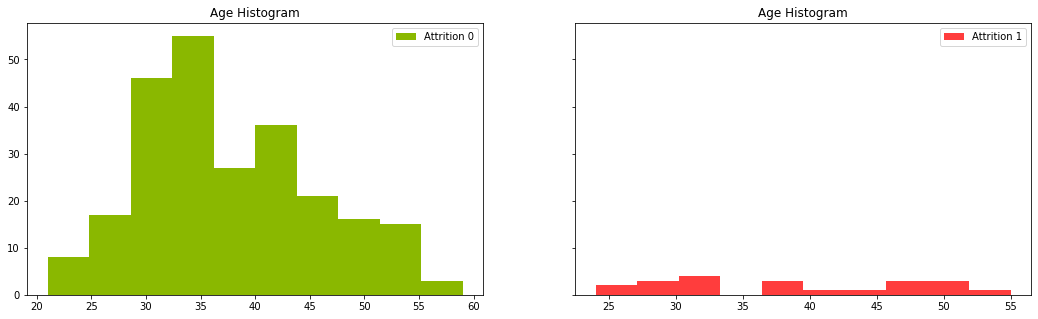

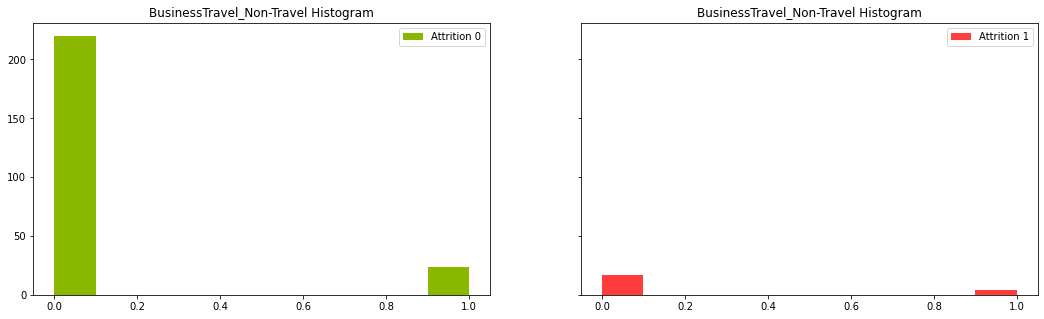

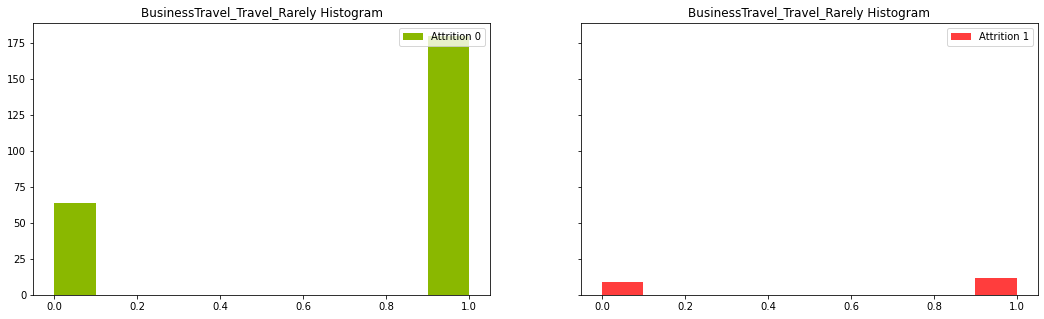

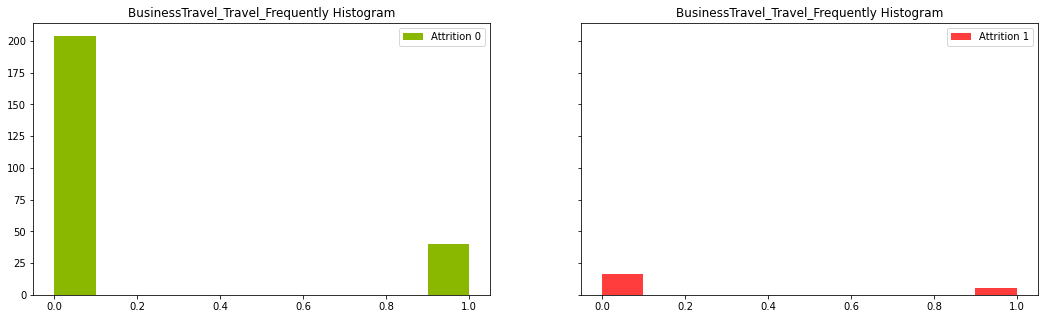

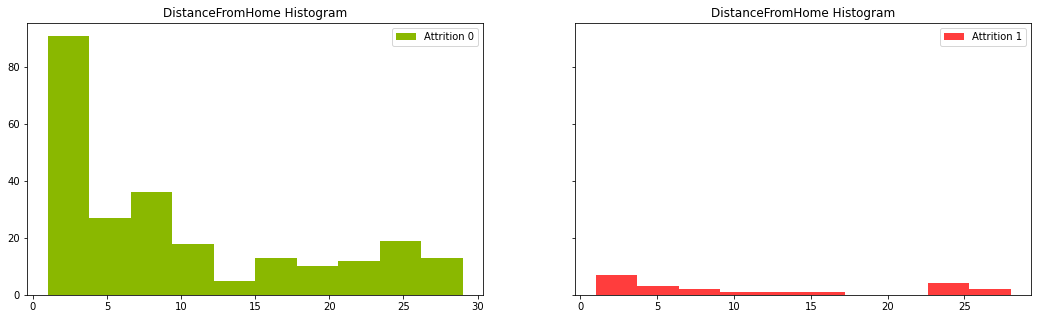

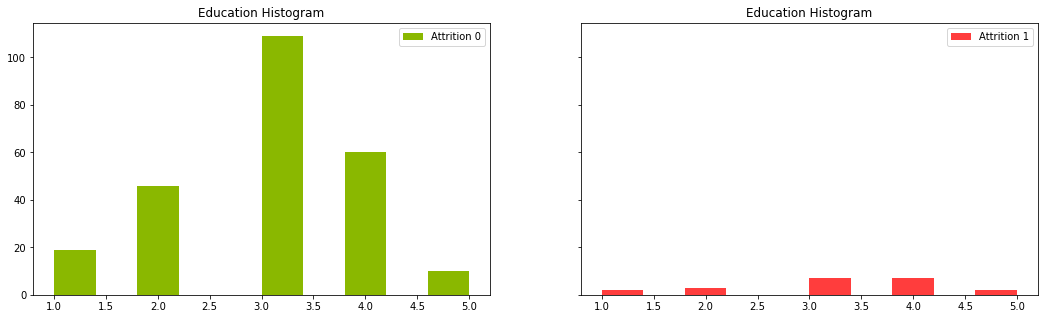

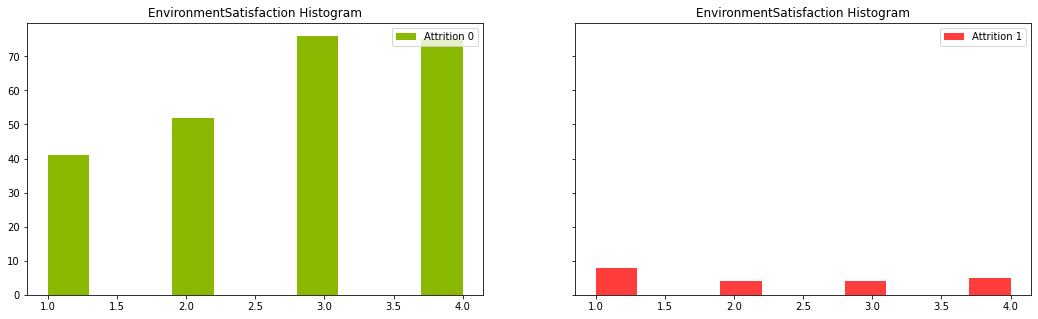

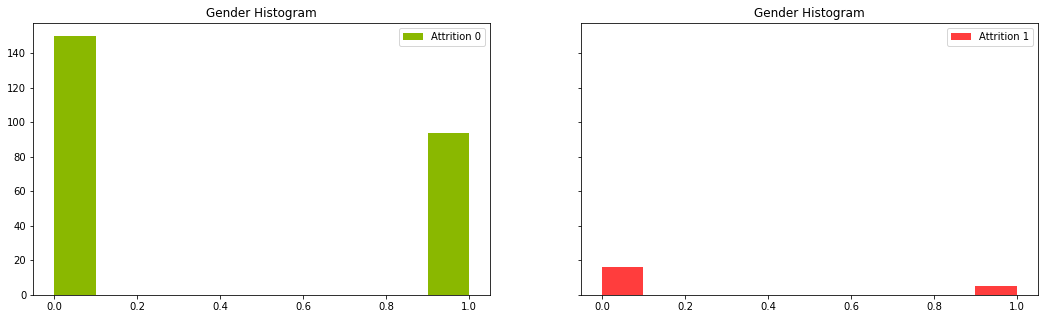

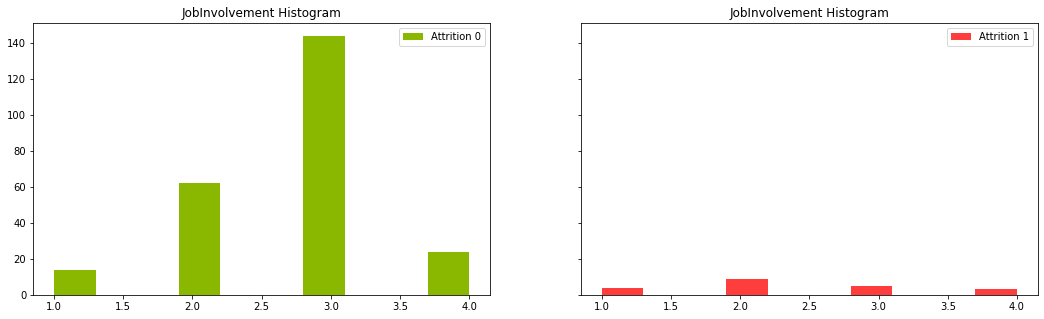

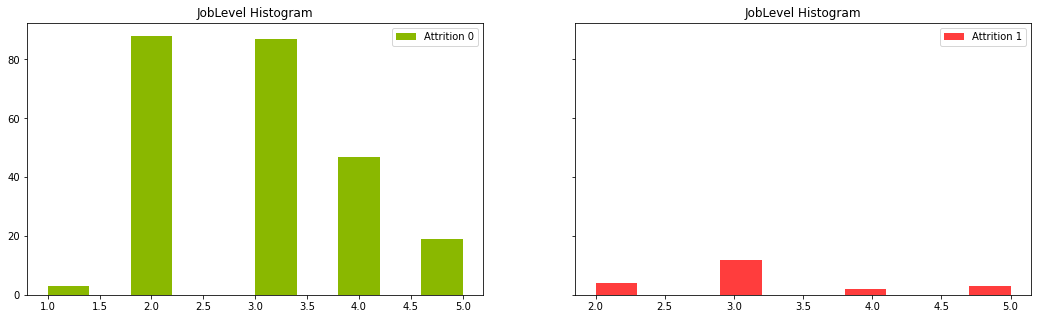

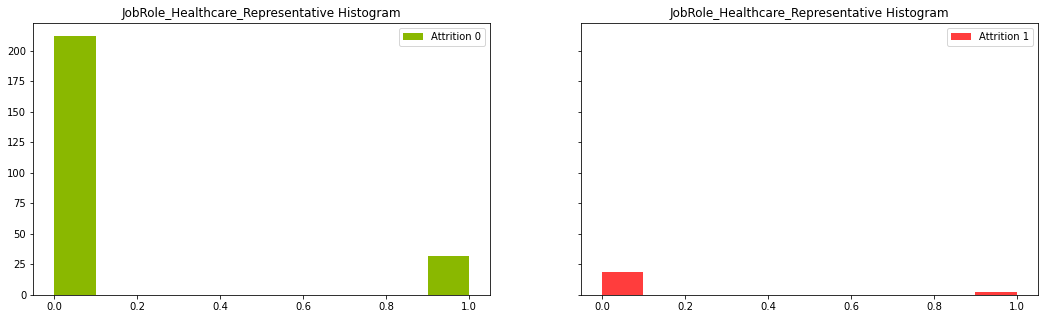

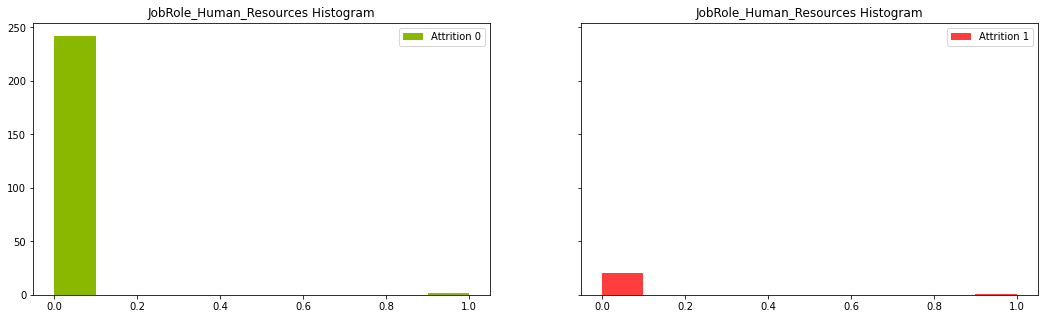

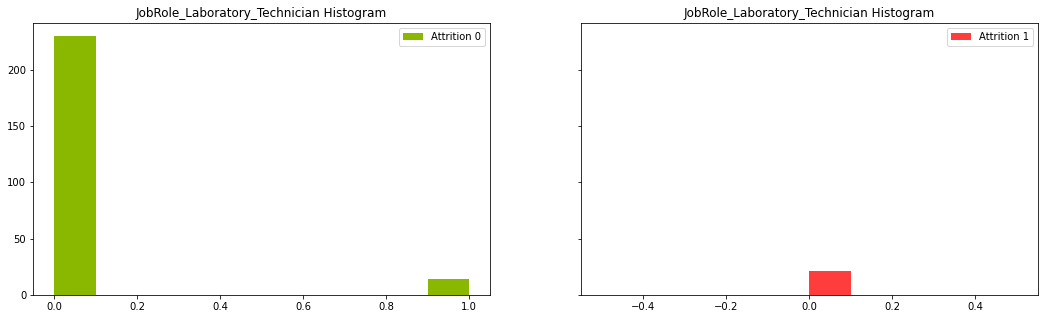

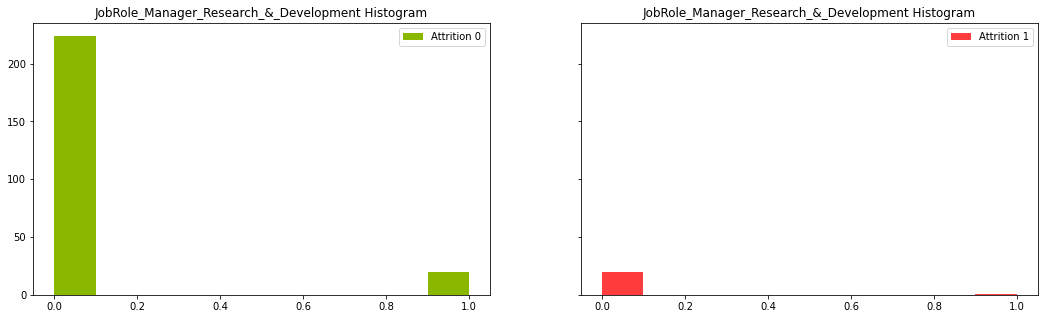

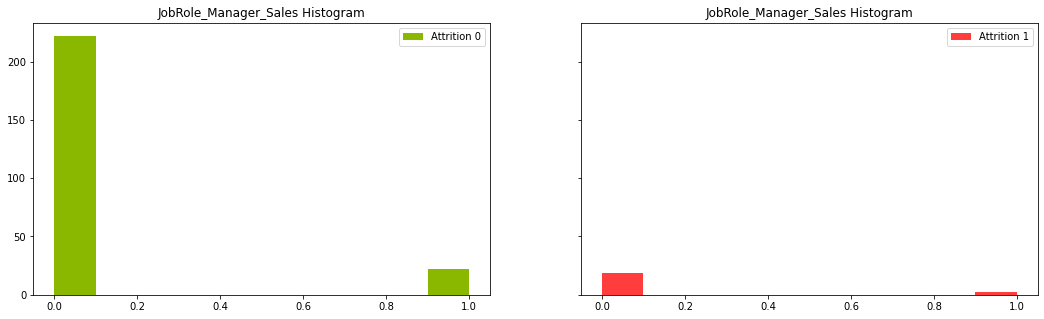

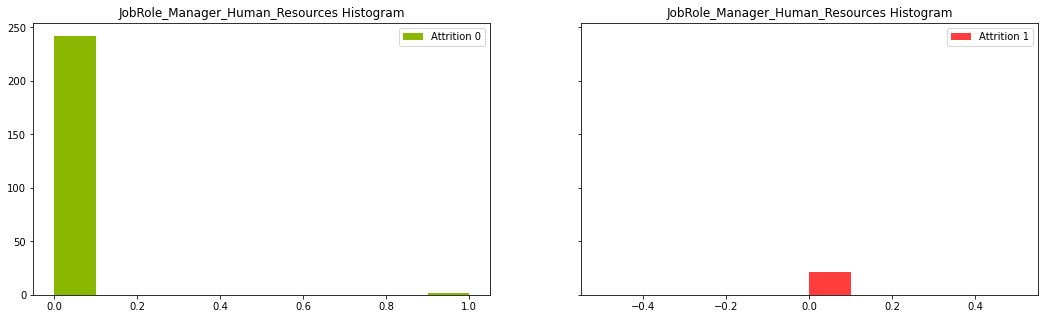

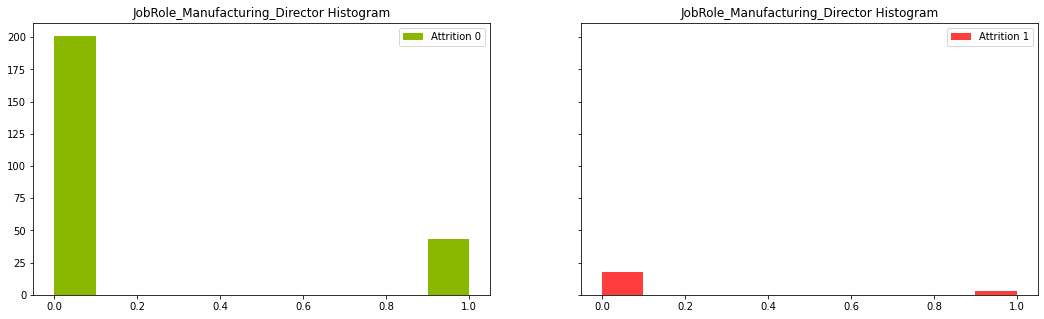

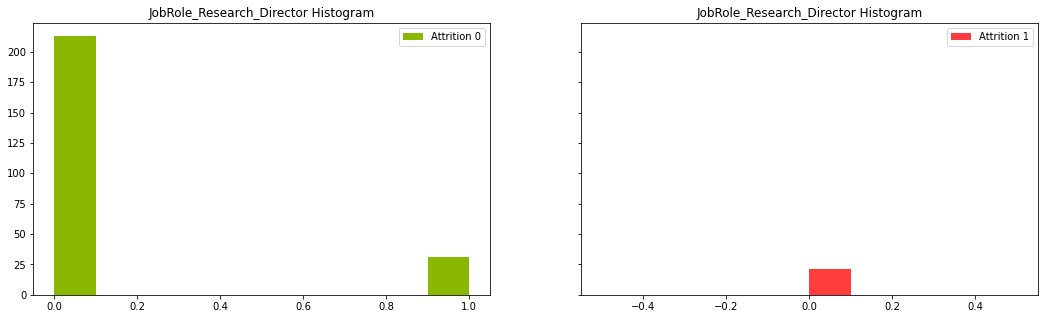

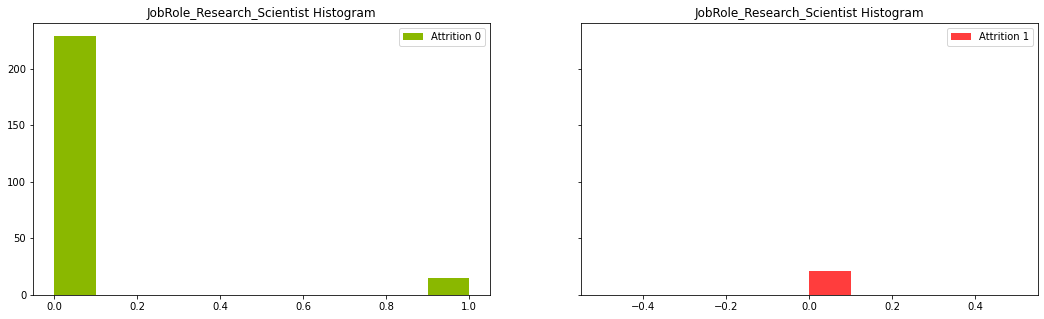

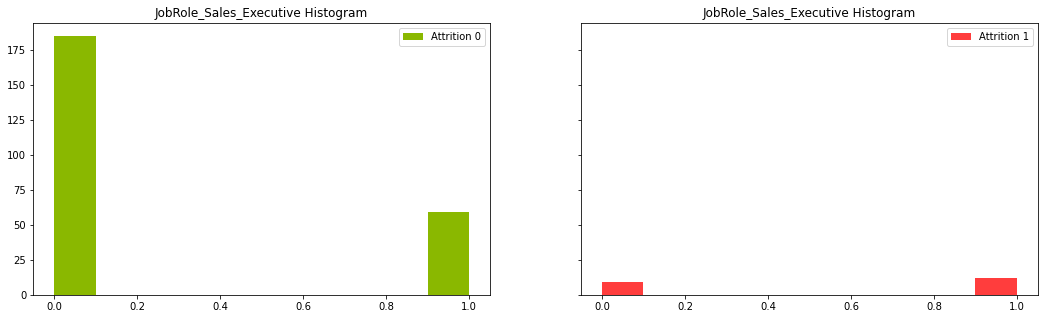

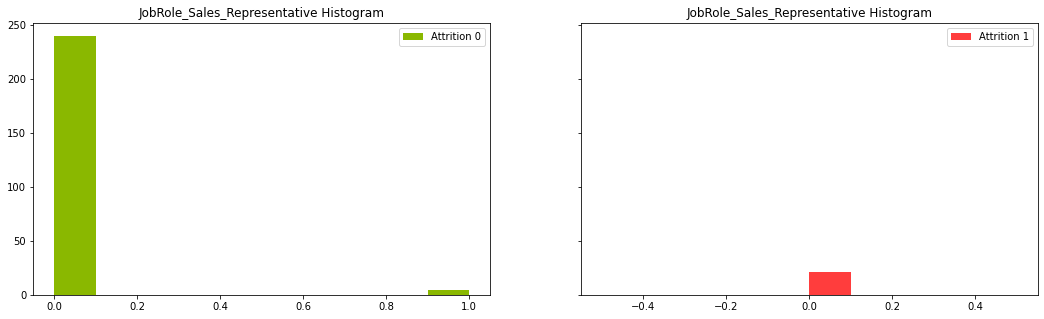

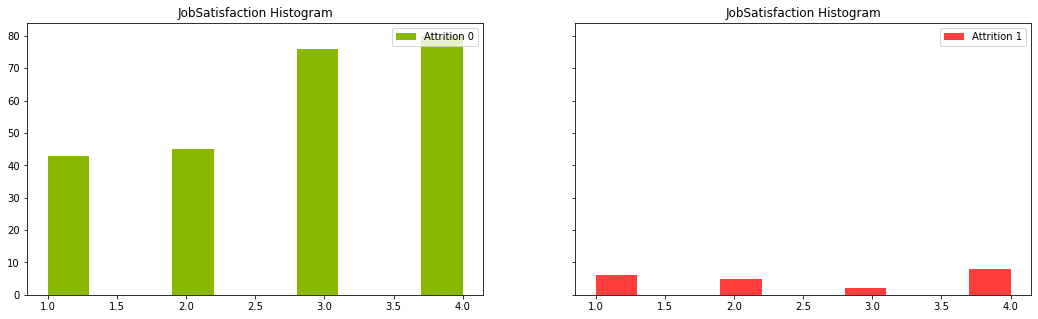

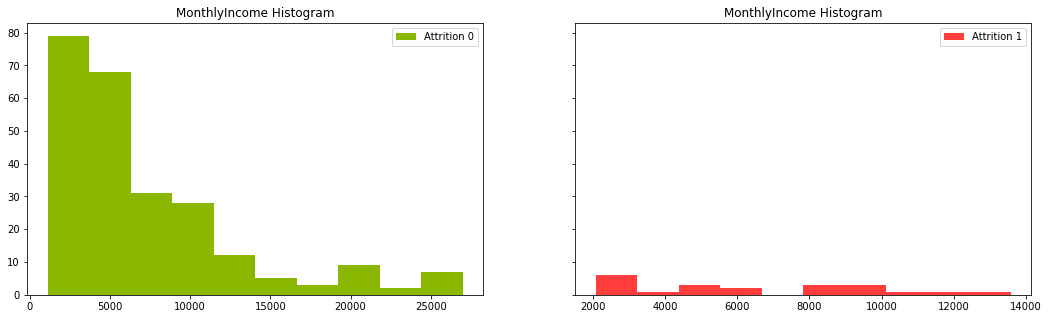

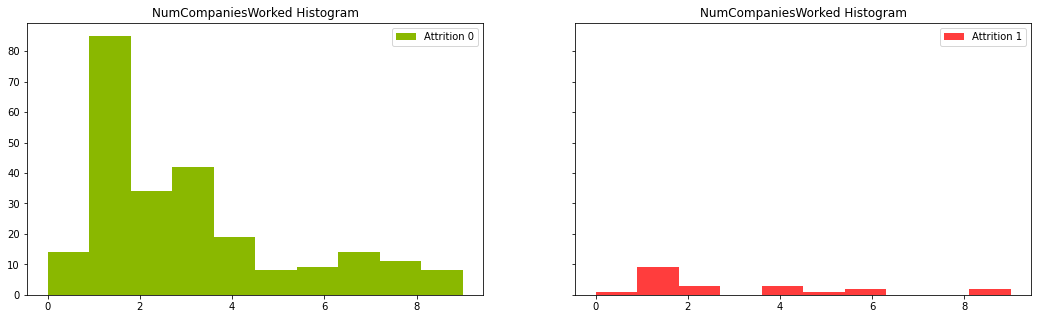

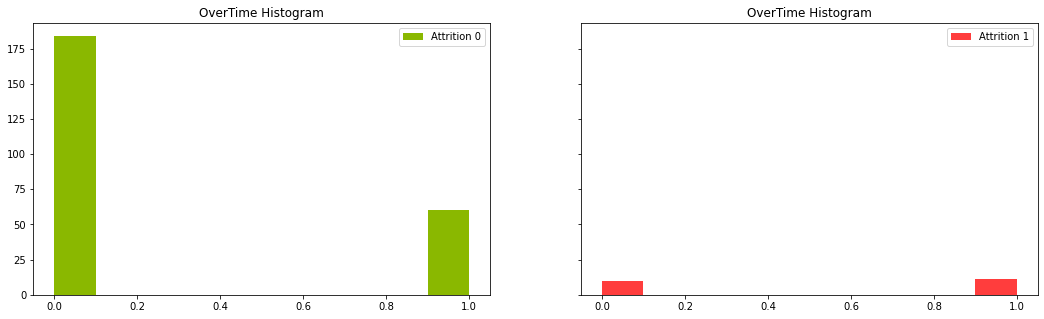

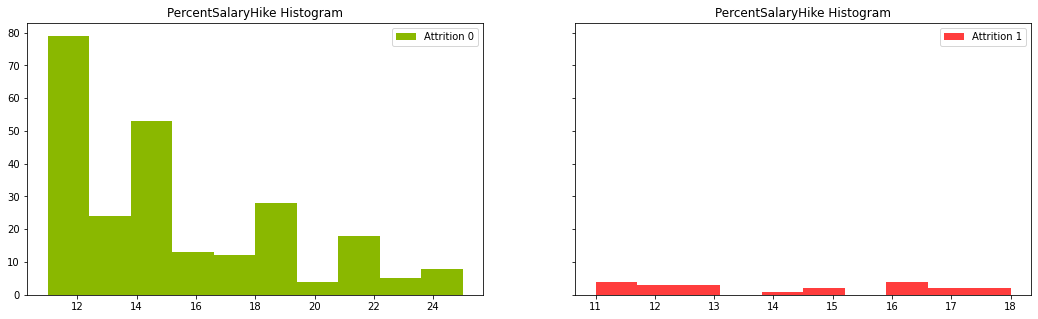

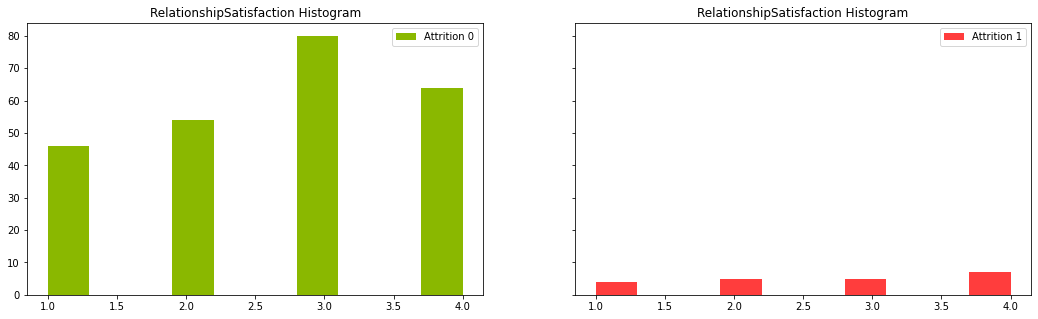

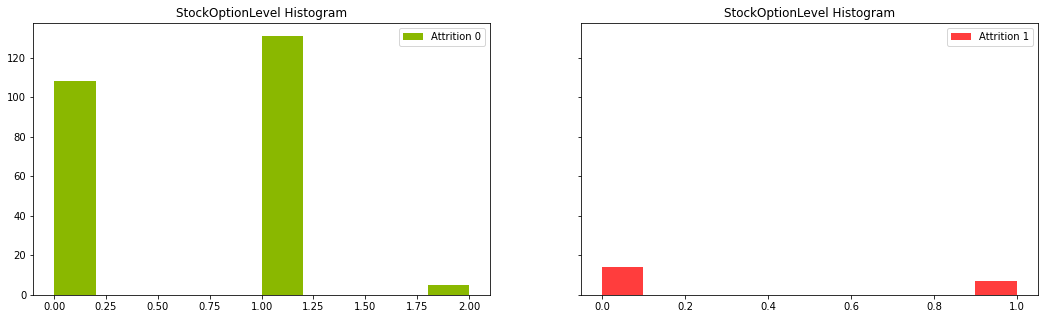

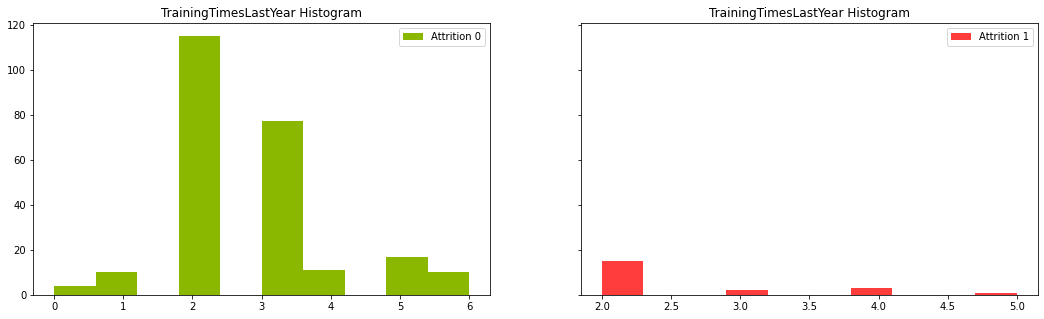

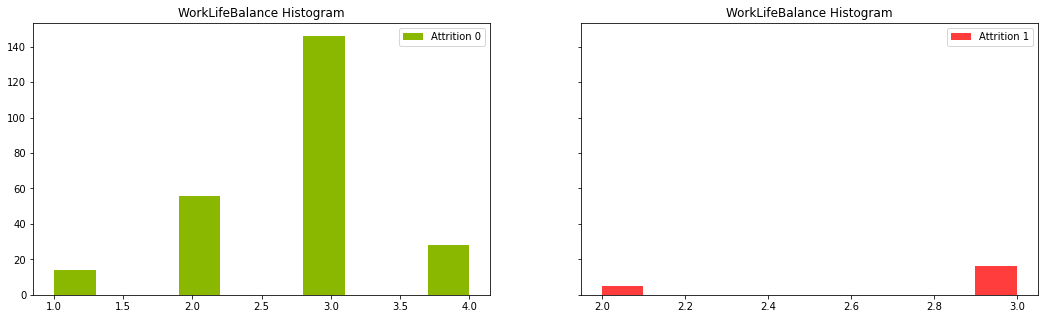

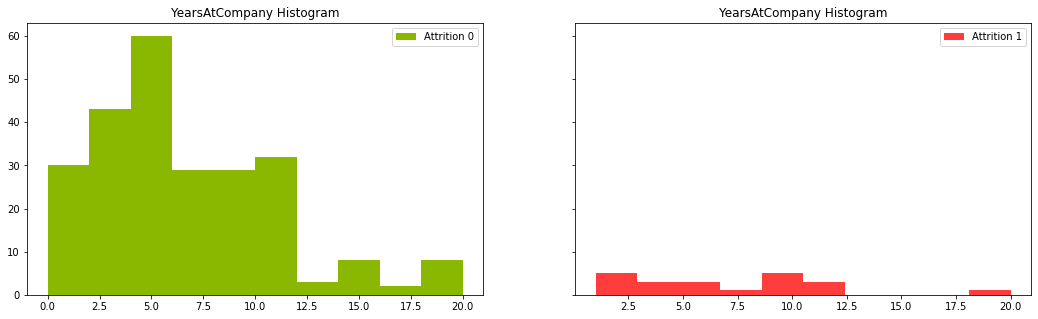

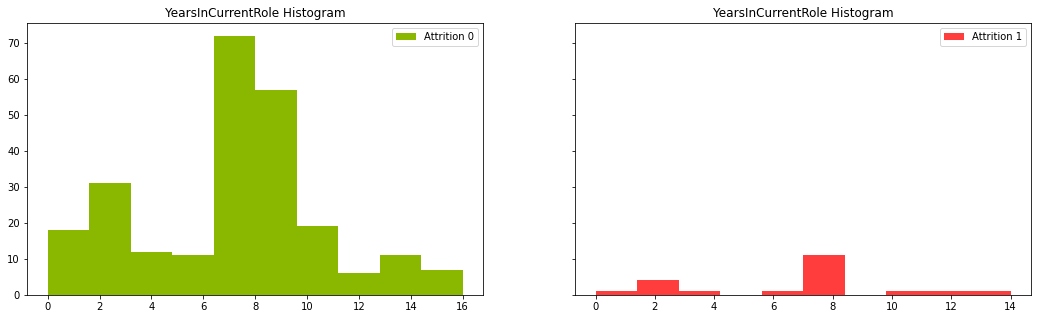

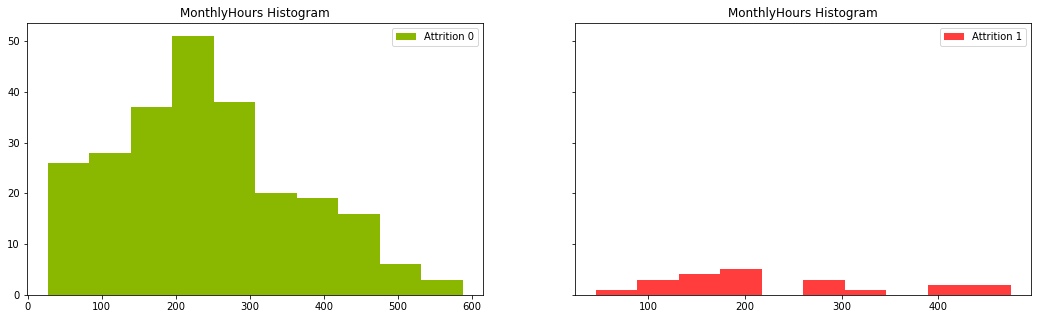

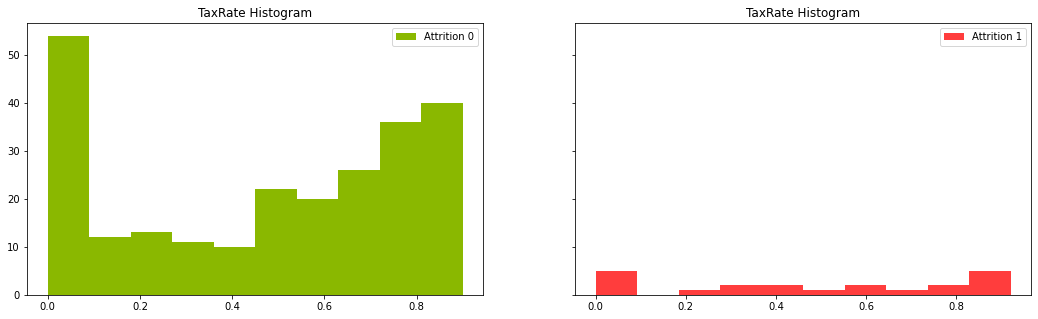

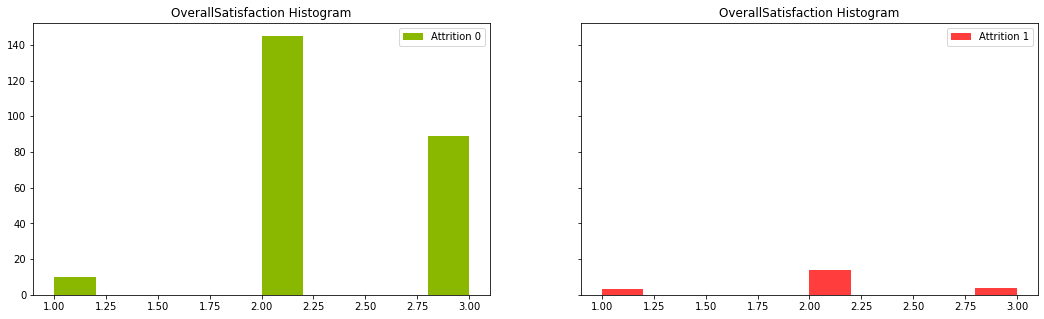

In [94]:
Attrition_0_dataset = df_NON_normalized[(df_NON_normalized['Labels'] == 0) & (df_NON_normalized['Attrition'] == 0)]
Attrition_1_dataset = df_NON_normalized[(df_NON_normalized['Labels'] == 0) & (df_NON_normalized['Attrition'] == 1)]

for column in df_NON_normalized.columns:
    
    if (column != 'Labels' and column != 'Attrition'):
        
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5), sharey = True)
        
        ax[0].hist(Attrition_0_dataset[column], label = 'Attrition 0', color = "#8AB800")
        ax[0].legend(loc='upper right')
        ax[0].set_title(column + " Histogram")
        
        ax[1].hist(Attrition_1_dataset[column], label = 'Attrition 1', color = "#FF3D3D")
        ax[1].legend(loc='upper right')
        ax[1].set_title(column + " Histogram")

        plt.show()

<h3>Description</h3>

In <b>cluster 0</b> the employees who leave are more men than women, they are between 24 and 34 years old and between 36 and 55 years old, they don't travel frequently, the distance from the workplace to home is either very short or quite high.
They have a medium-high education level, their satisfaction with the work environment is largely low and, for some, higher; their work involvement is mostly low, their job level is medium-low and some of them are part of the sales_Executive department.
Their job satisfaction is quite high, but for some quite low, their salary is for the most part low, for some higher.
Many of them have worked in a few agencies before, some work overtime and some don't, their satisfaction with working relationships is medium to high. Furthermore, for many of them it has been a short time since the last update in the workplace.
They have a medium-high life balance, have spent about 2 to 12 years in the company, have been in their current role for a few years, about 2 to 8, do not have many total working hours, and their overall satisfaction is average.

<h3>Cluster 1</h3>

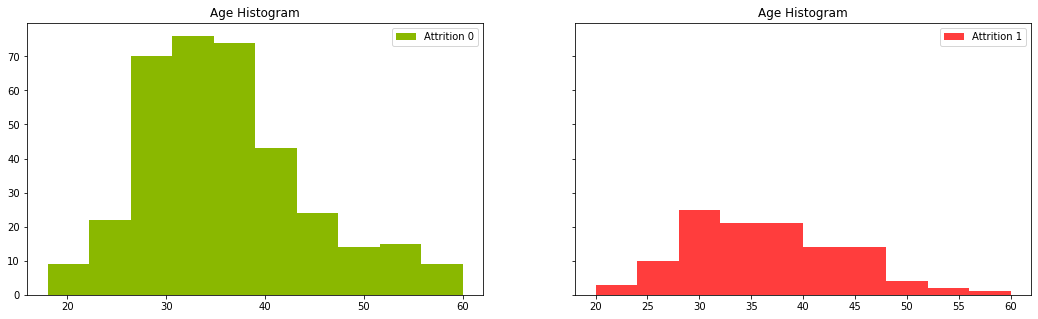

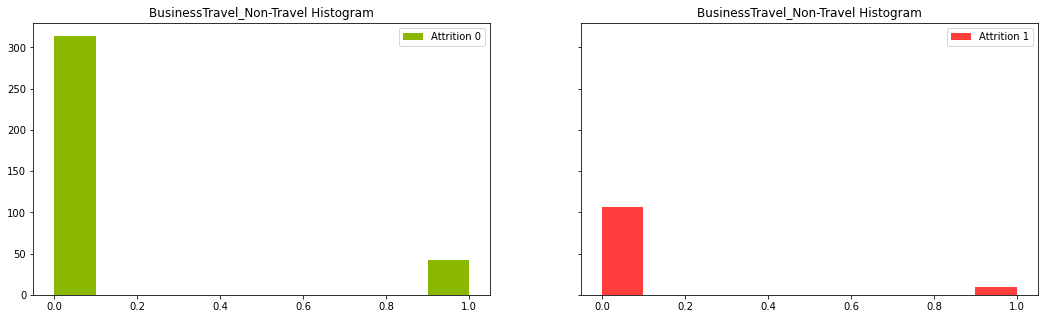

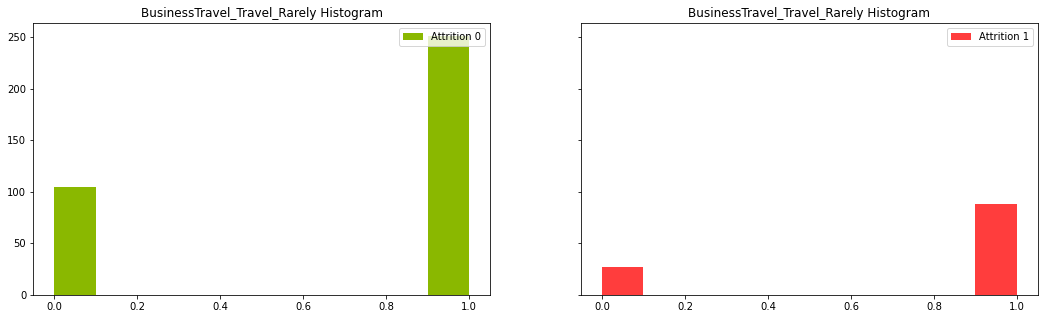

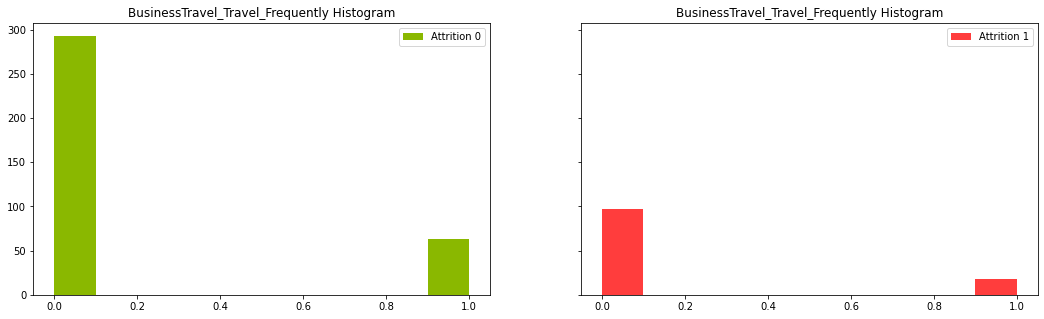

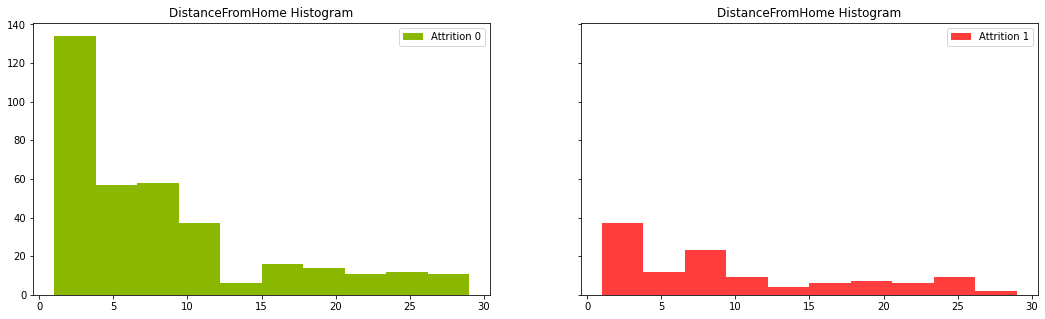

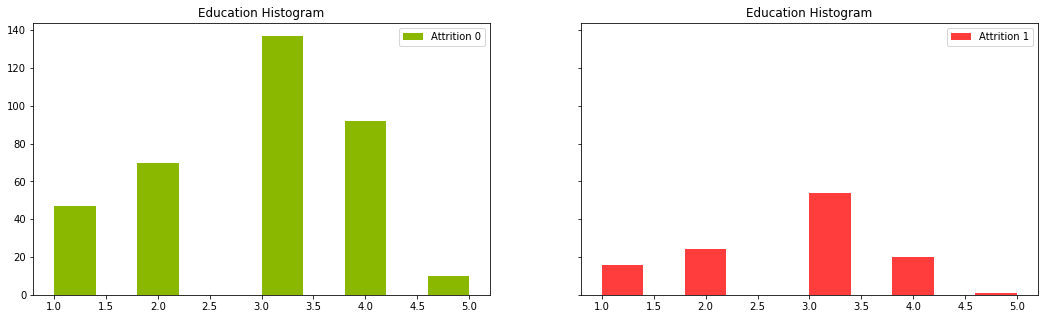

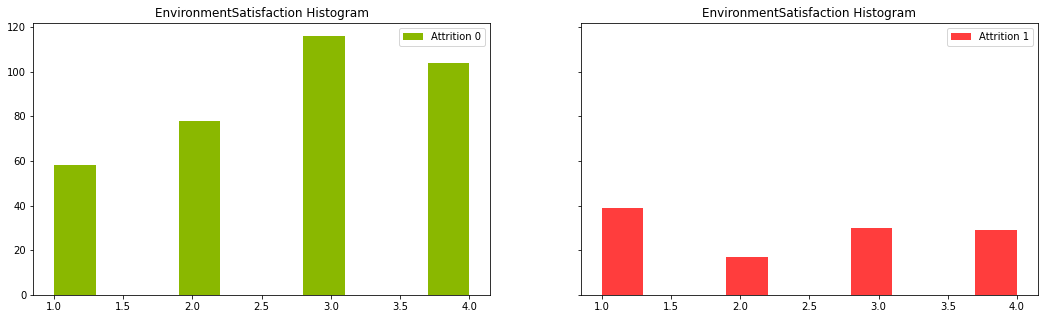

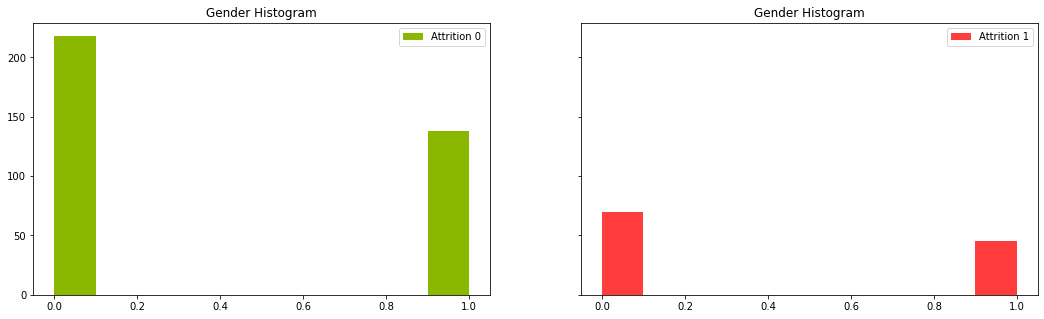

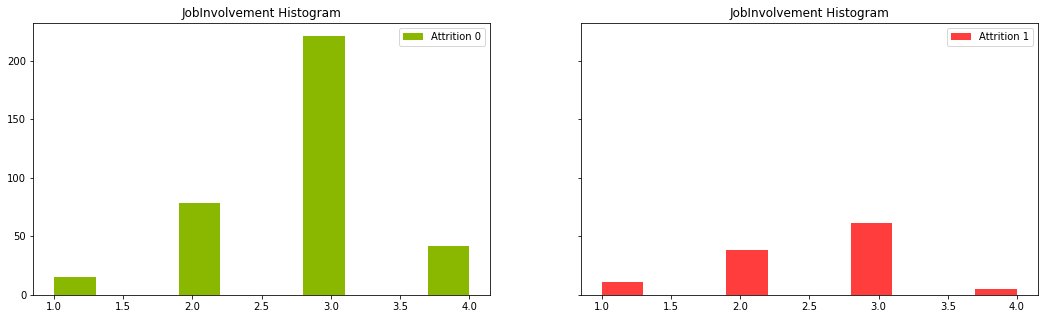

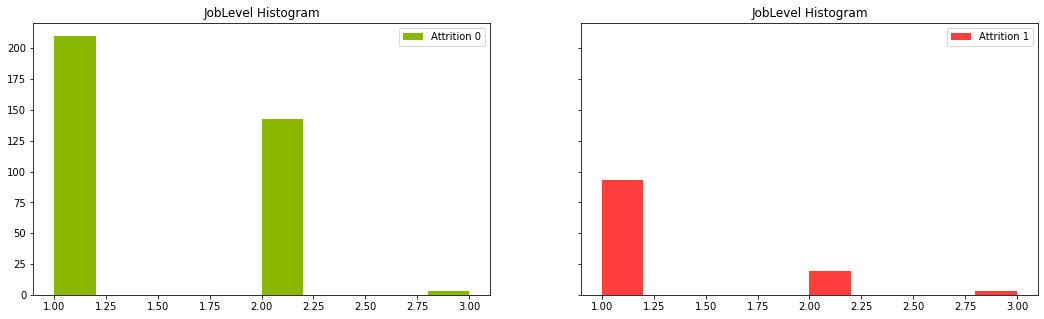

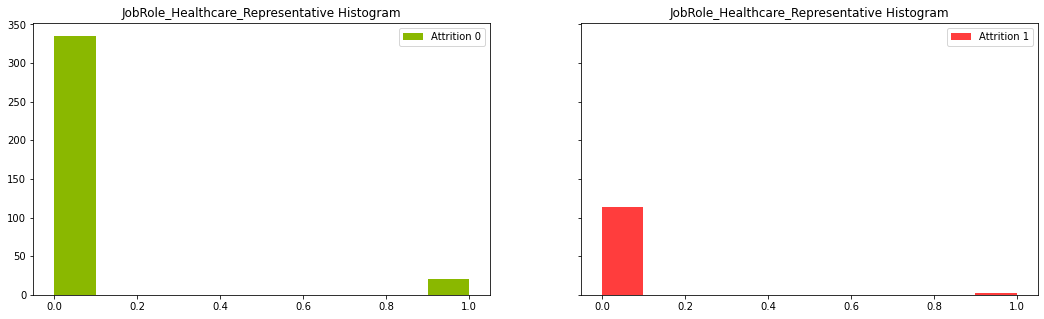

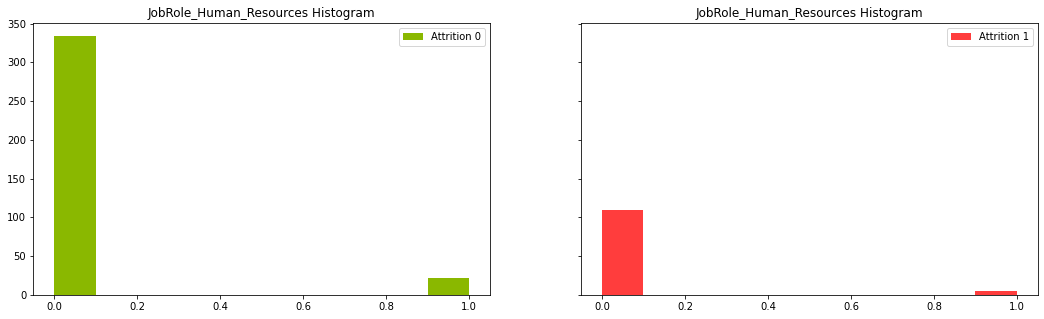

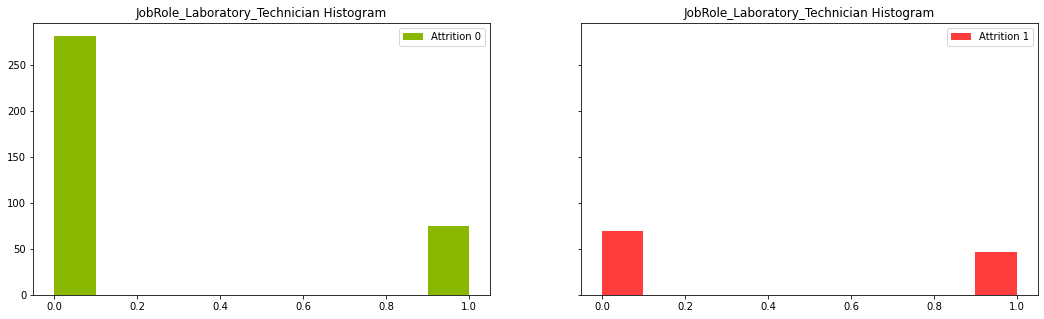

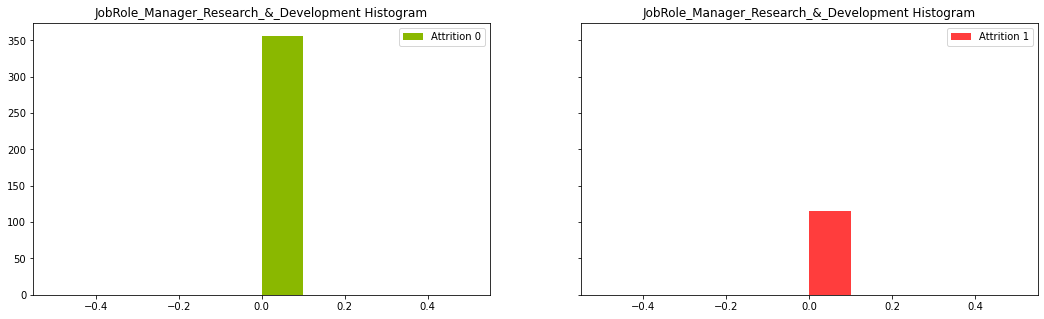

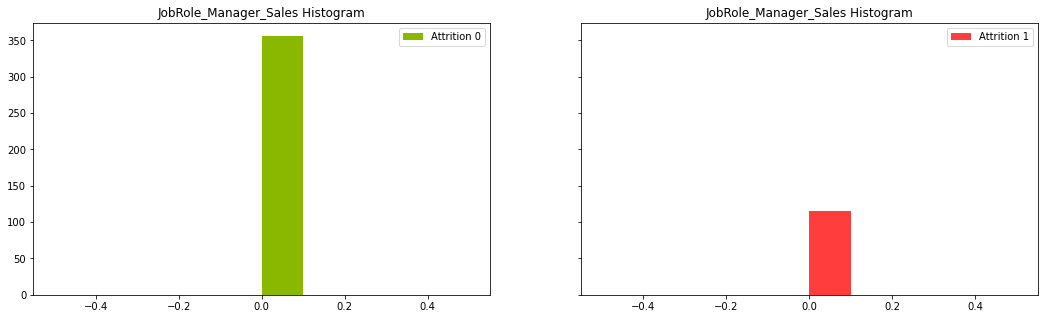

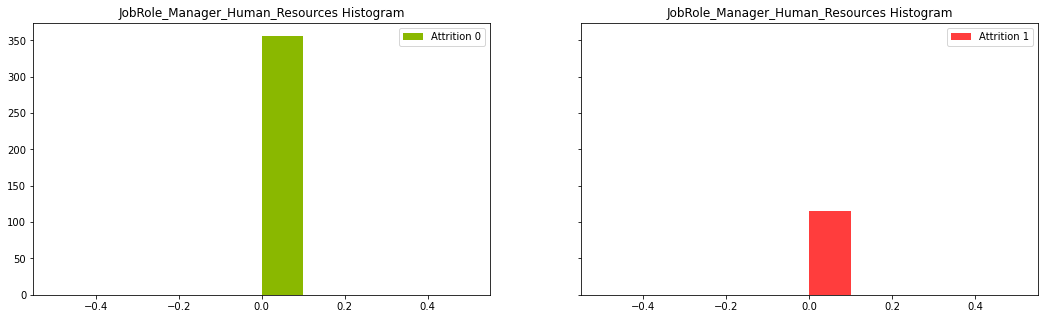

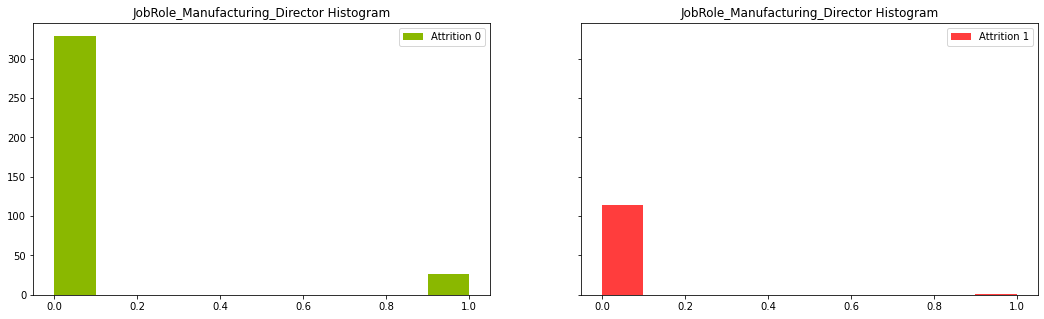

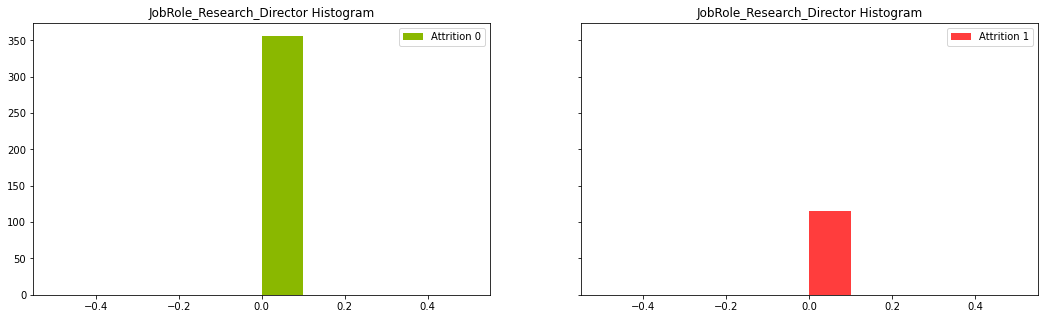

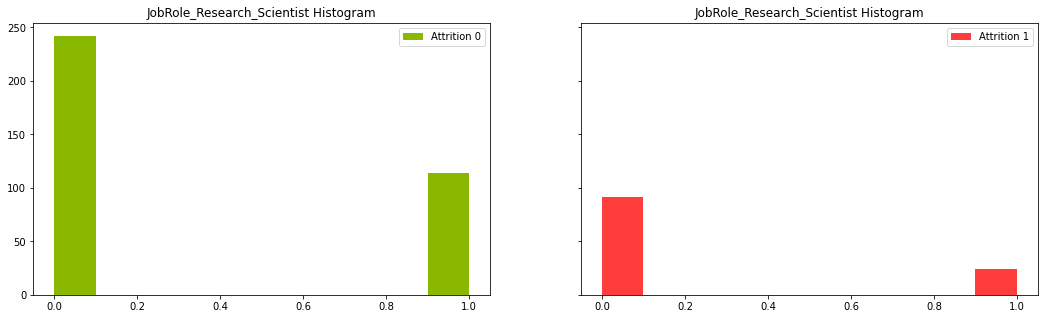

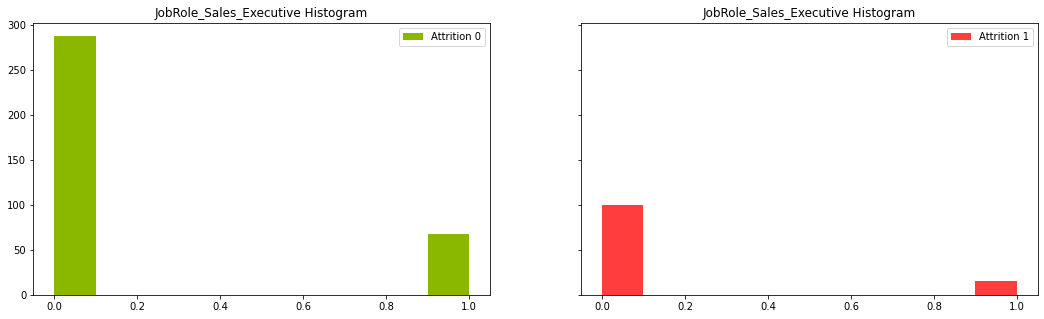

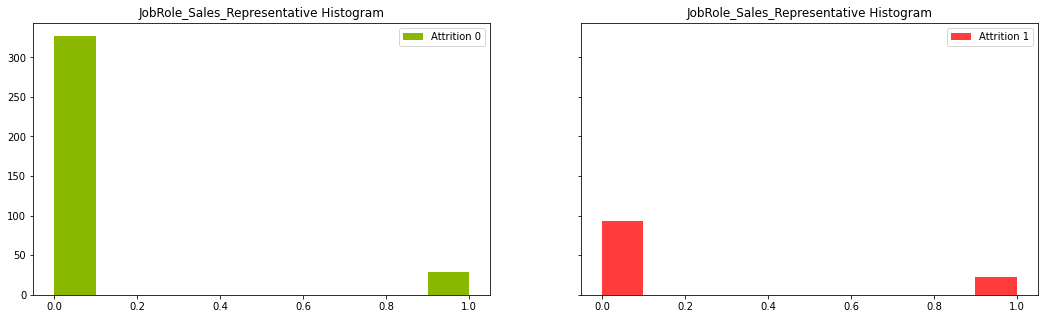

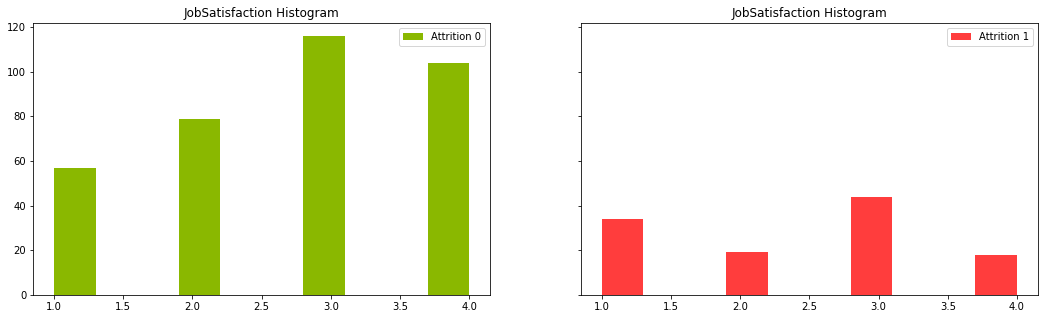

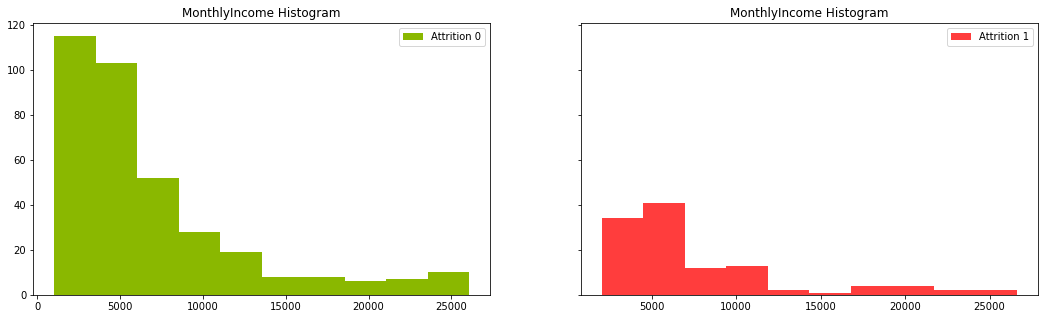

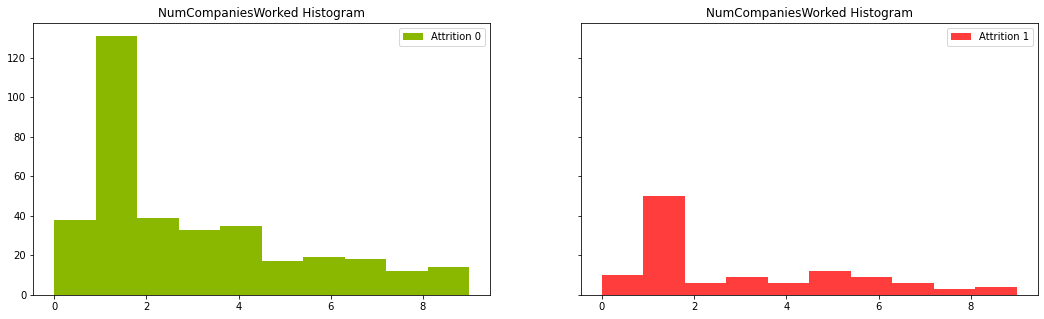

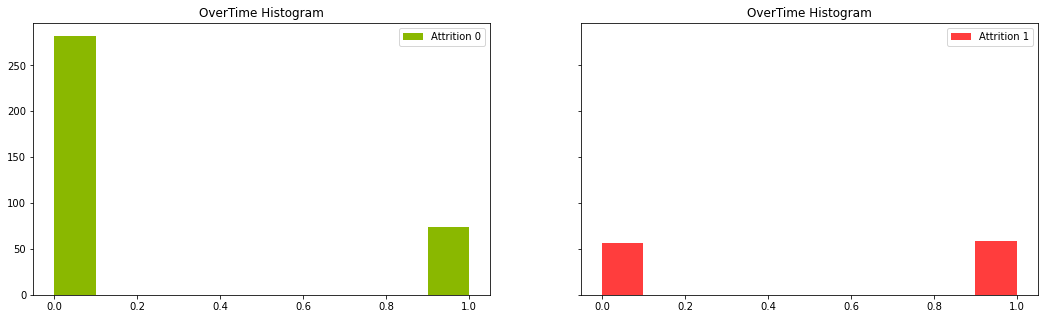

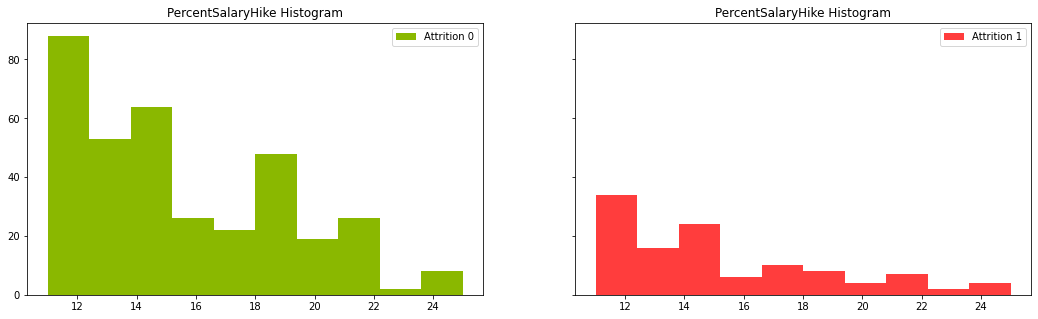

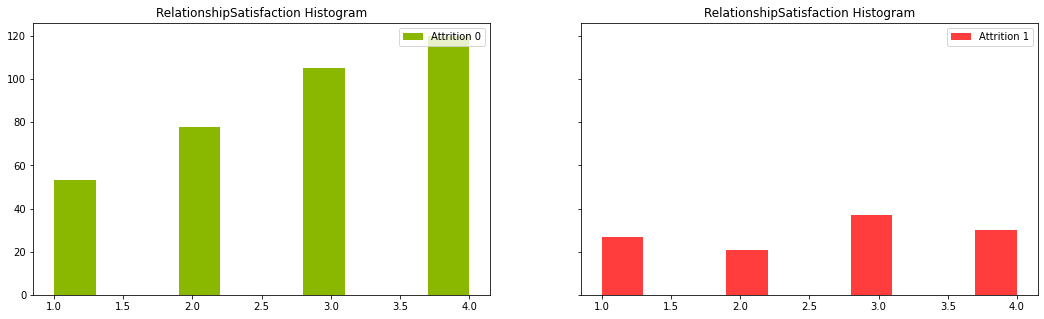

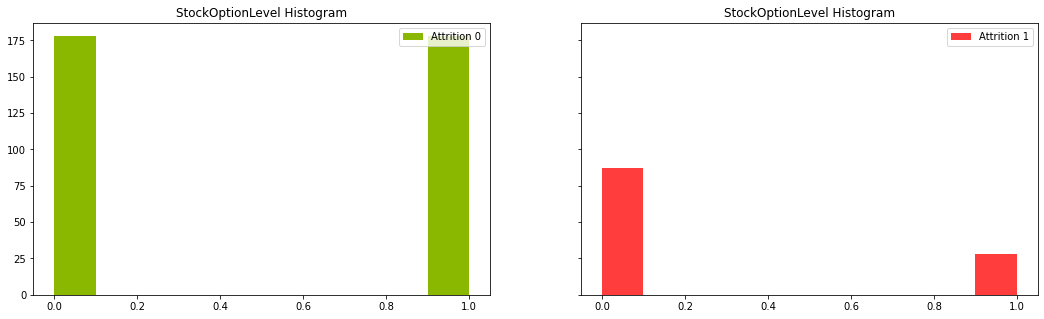

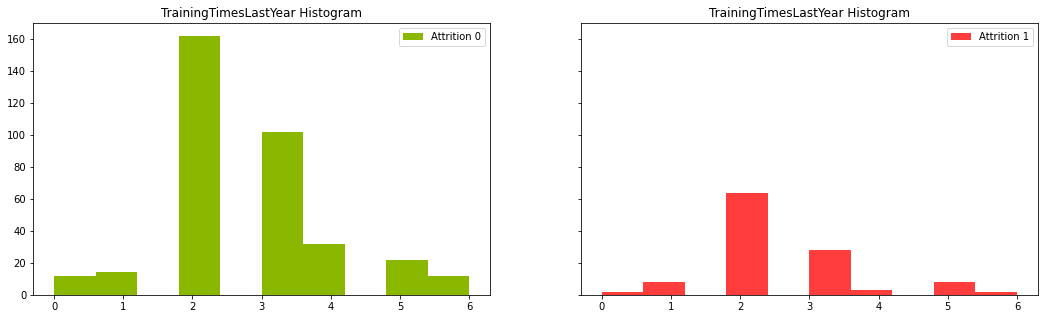

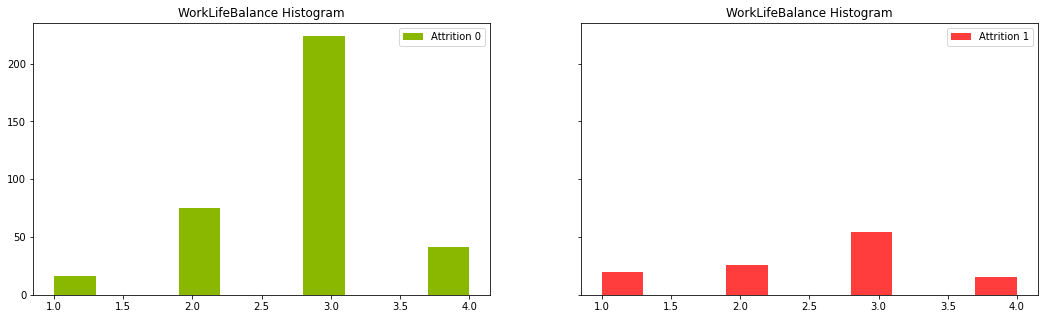

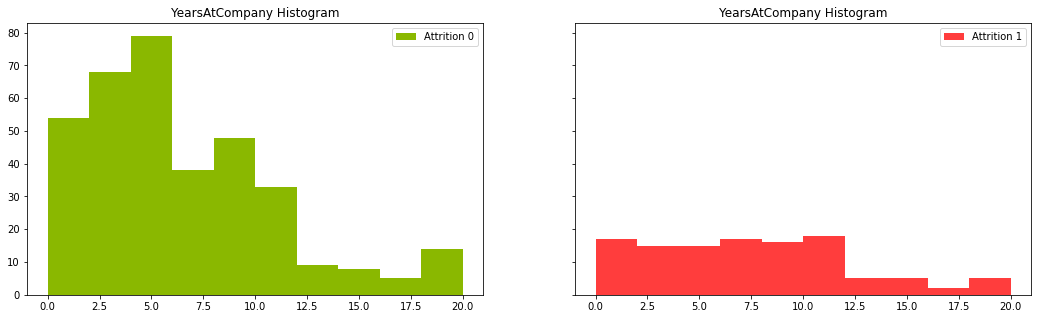

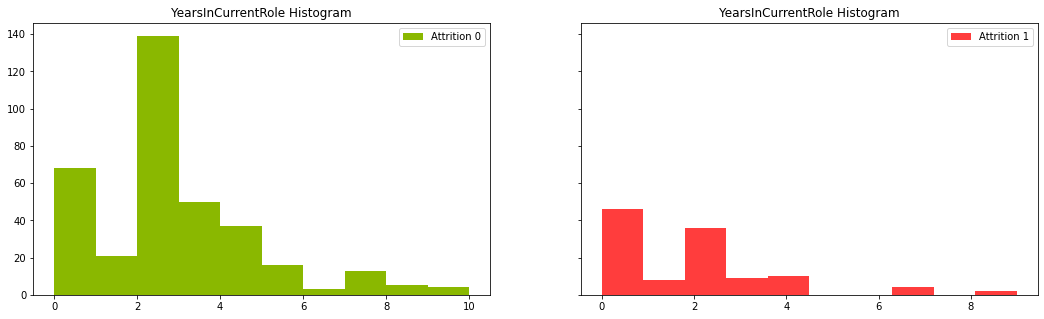

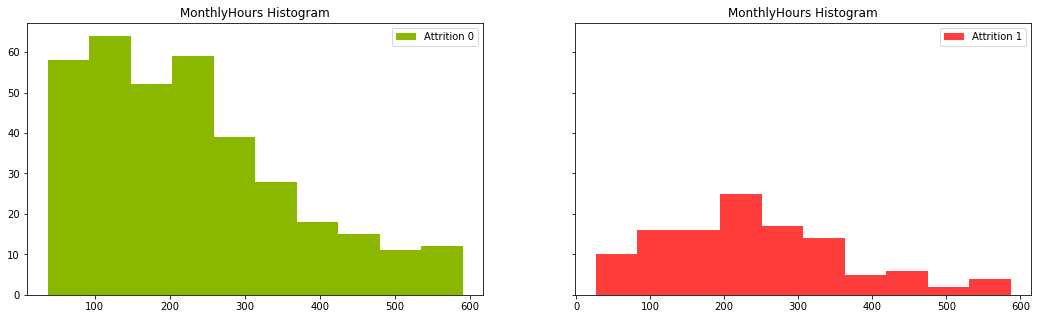

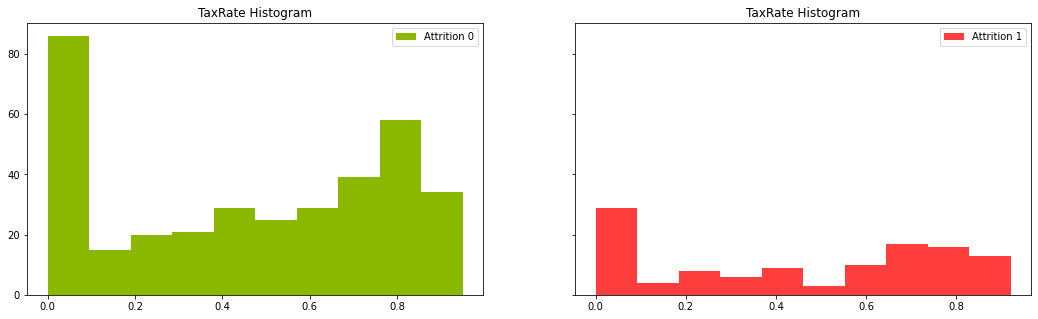

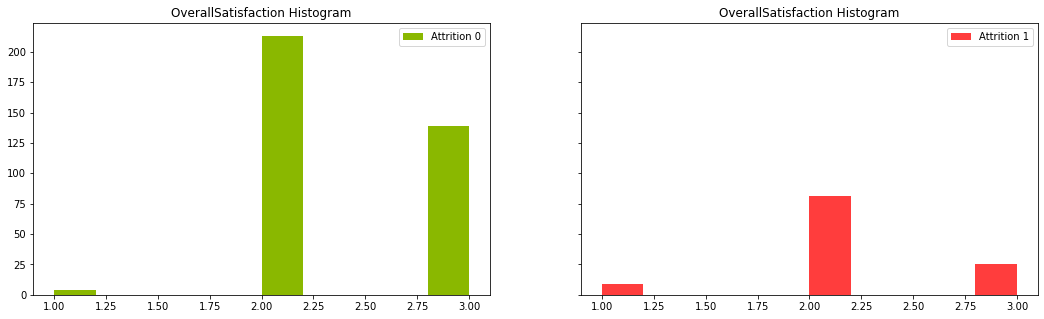

In [95]:
Attrition_0_dataset = df_NON_normalized[(df_NON_normalized['Labels'] == 1) & (df_NON_normalized['Attrition'] == 0)]
Attrition_1_dataset = df_NON_normalized[(df_NON_normalized['Labels'] == 1) & (df_NON_normalized['Attrition'] == 1)]

for column in df_NON_normalized.columns:
    
    if (column != 'Labels' and column != 'Attrition'):
        
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5), sharey = True)
        
        ax[0].hist(Attrition_0_dataset[column], label = 'Attrition 0', color = "#8AB800")
        ax[0].legend(loc='upper right')
        ax[0].set_title(column + " Histogram")
        
        ax[1].hist(Attrition_1_dataset[column], label = 'Attrition 1', color = "#FF3D3D")
        ax[1].legend(loc='upper right')
        ax[1].set_title(column + " Histogram")

        plt.show()

<h3>Description</h3>

In <b>cluster 1</b> the employees who leave are more men but there are also several women, they have an age ranging from 20 to 60 years, with higher values from 25 to 48 years, they rarely travel, they work for the most part a short distance from home, for the most part their education level is between 2nd and 4th.
Their satisfaction with the workplace is either very low or very high, their involvement in work is medium-low and their work level is very low.
Regarding the roles they cover, some of them are part of the technical laboratory, the research scientist department, few of the sales executive and the sales representative.
Job satisfaction is very low for some, higher for others, and wages are mostly low.
Retired employees have worked in a few companies before, some work overtime and others don't, satisfaction with relationships in the workplace is high for some, low for others.
For them, relatively little time has passed since the last update with respect to work, their life balance is medium-high, they have been within the company for a few years, from 0 to 12 approximately, they have held their current role for a short time , have few working hours and have a mostly low overall satisfaction.

<h3>Cluster 2</h3>

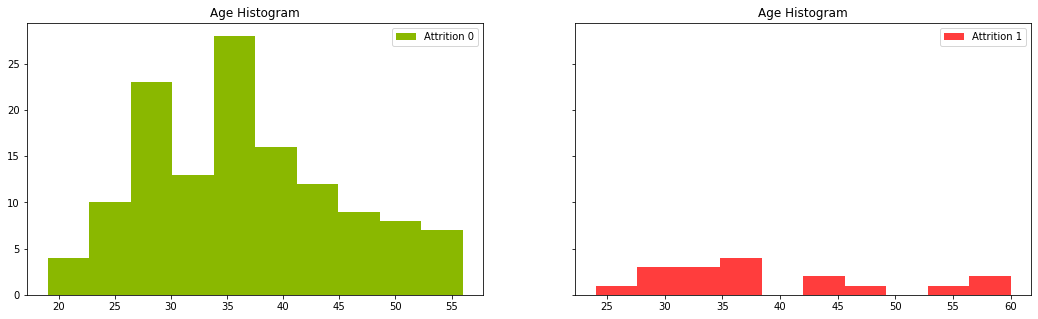

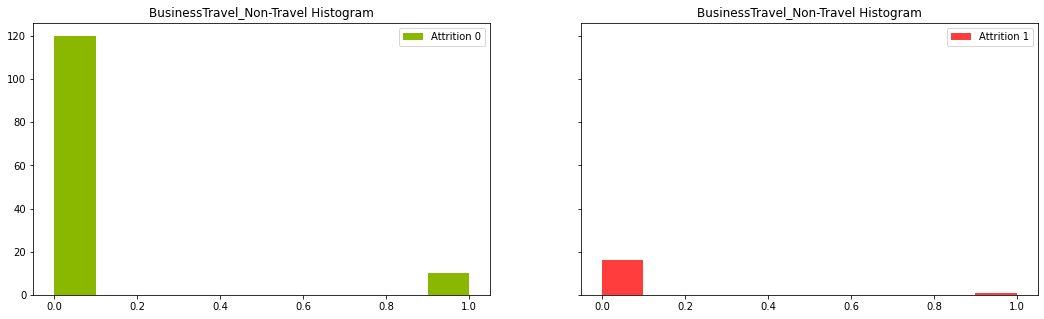

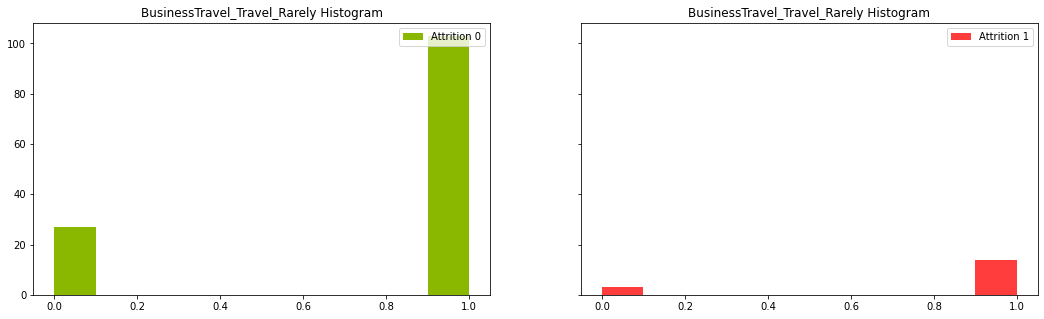

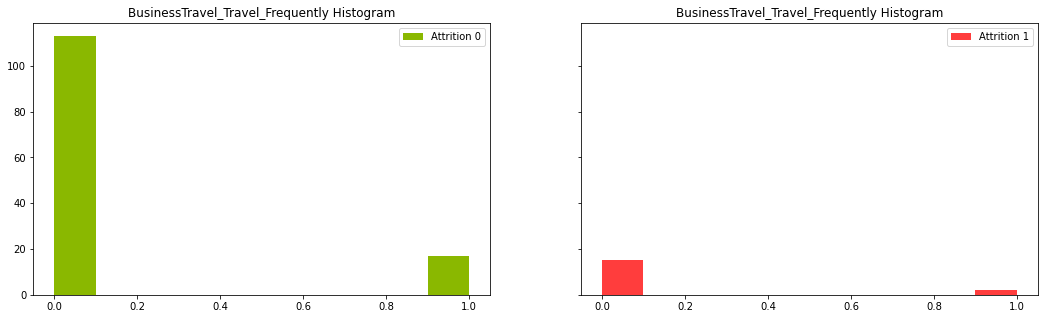

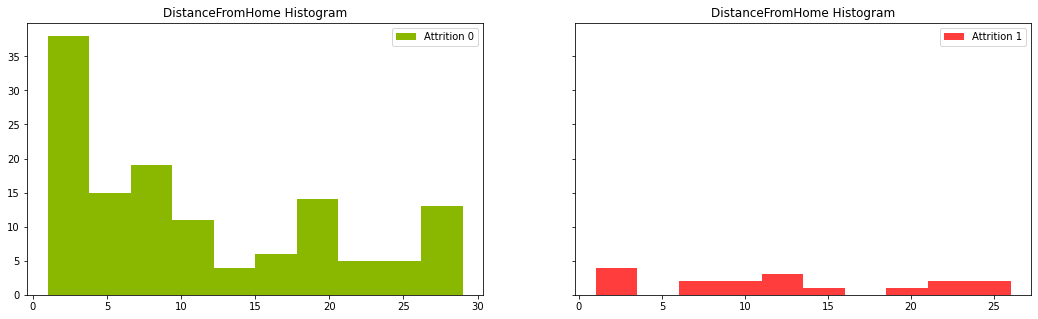

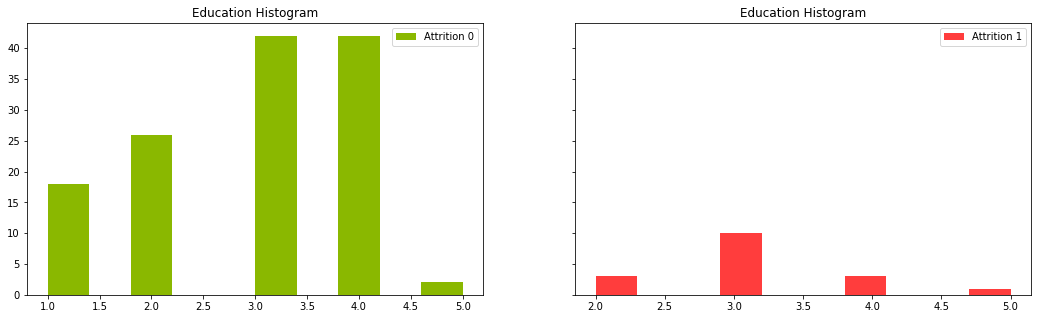

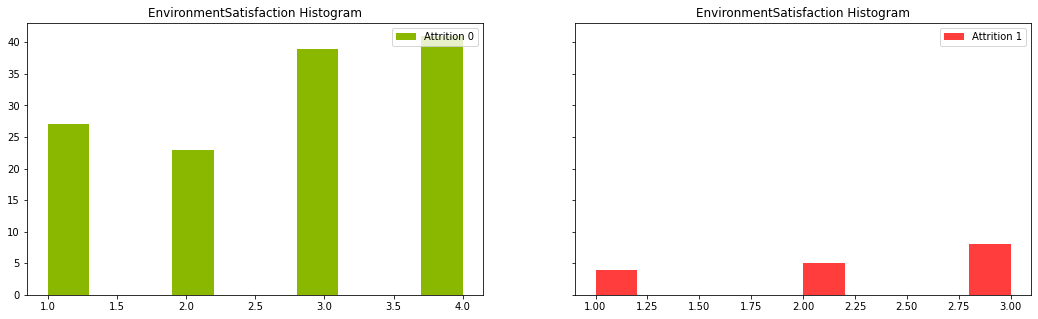

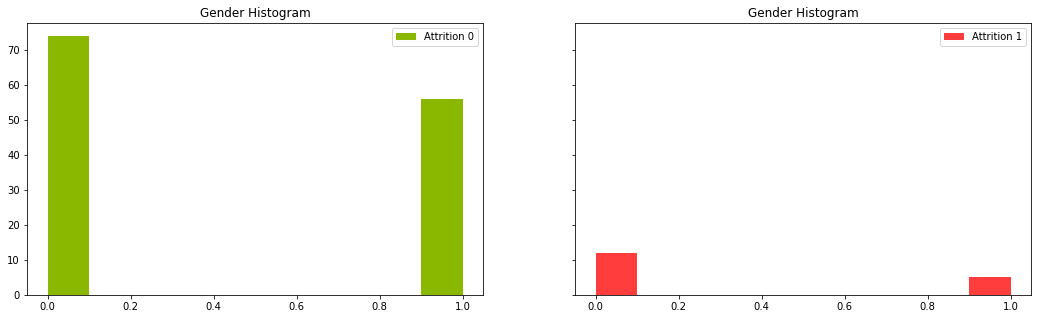

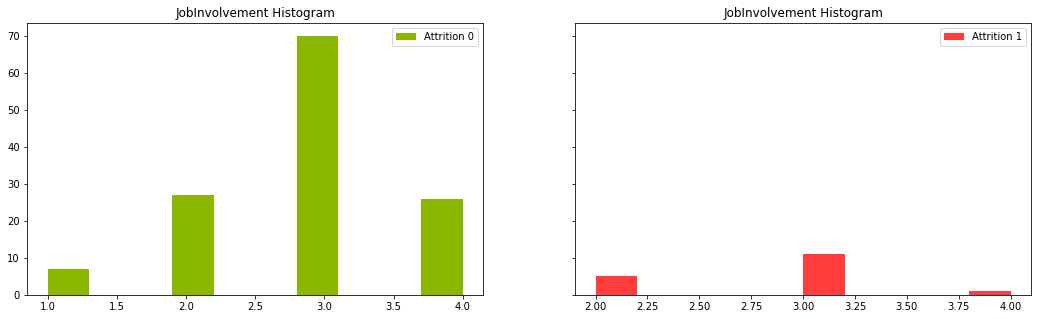

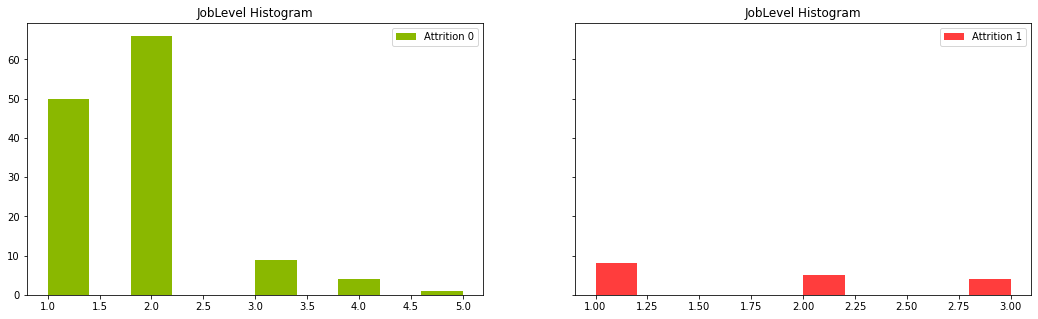

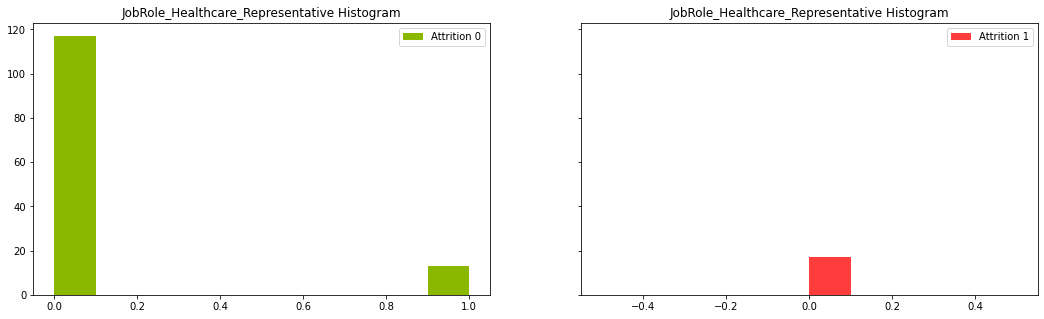

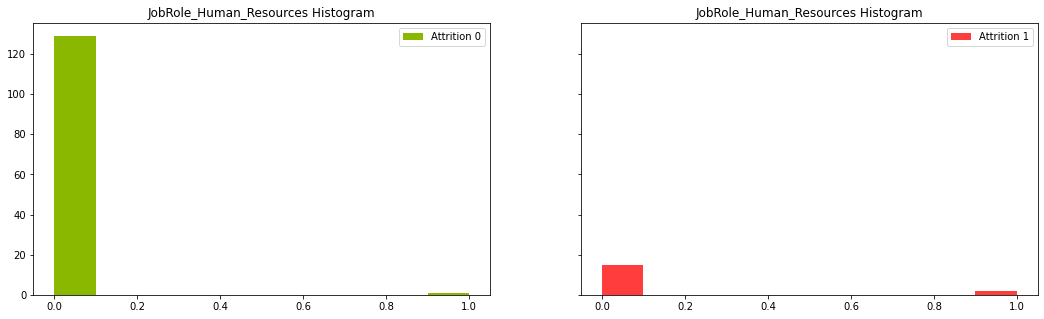

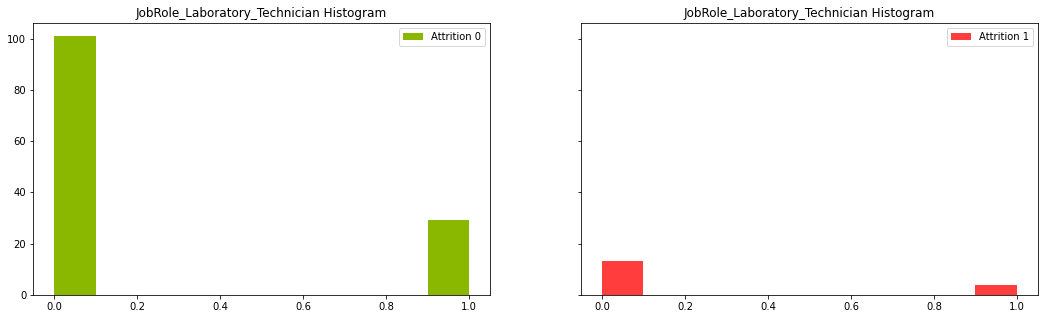

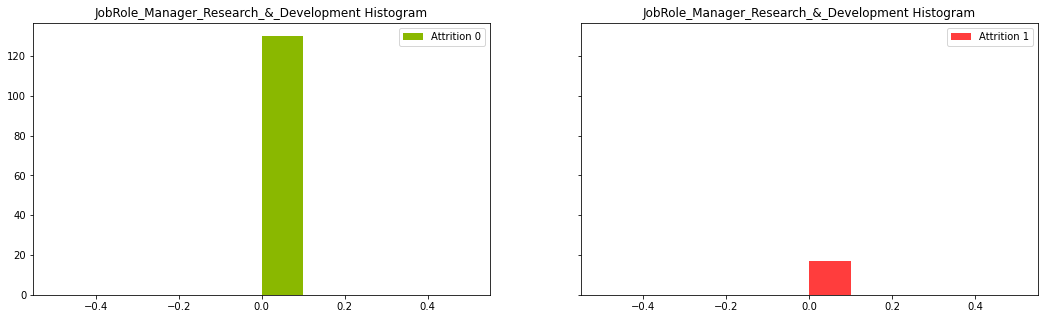

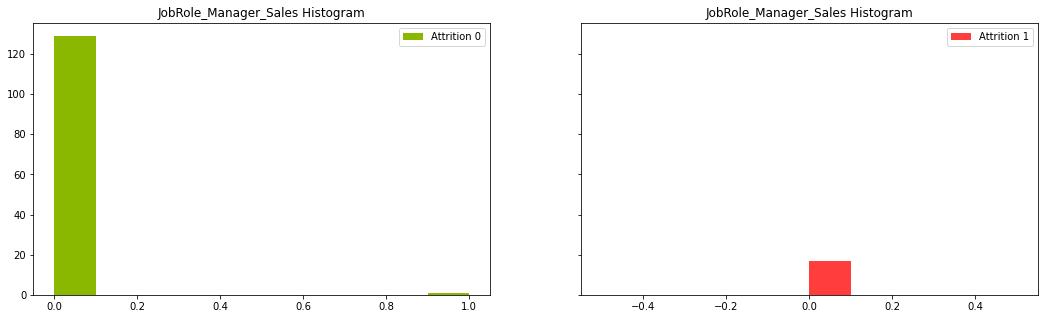

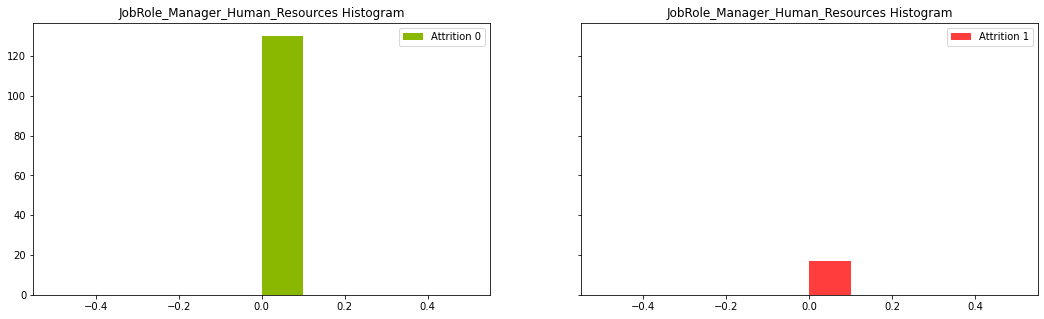

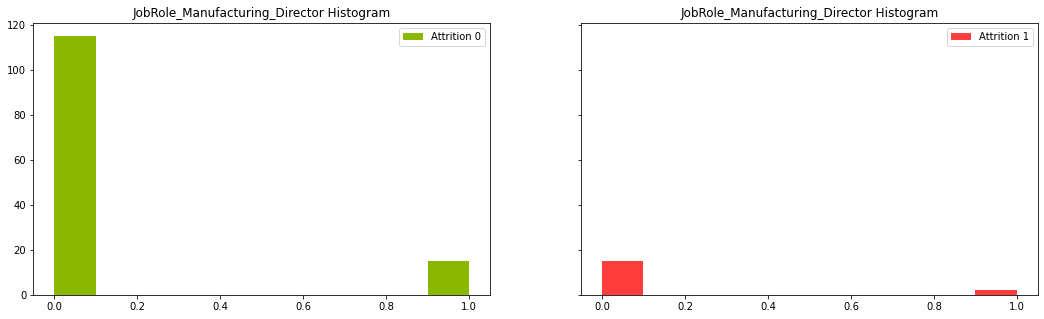

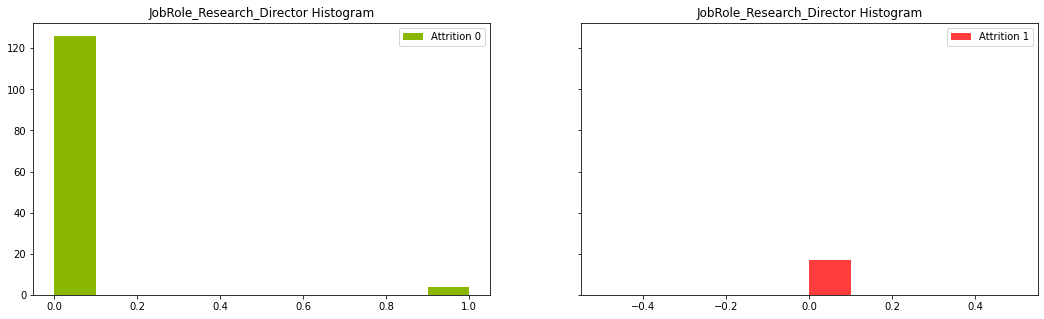

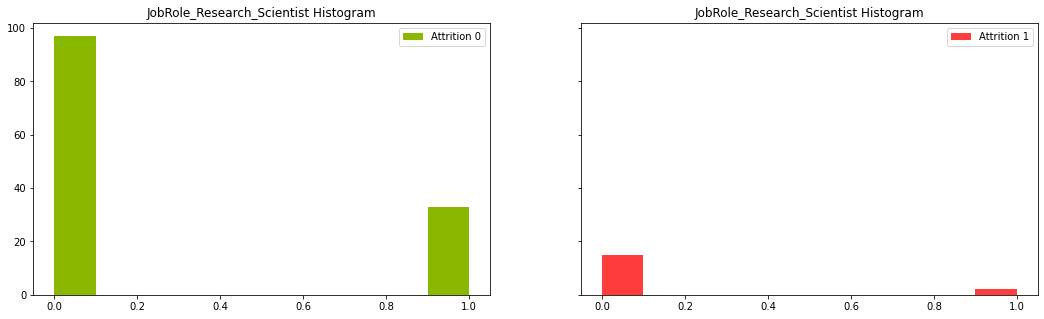

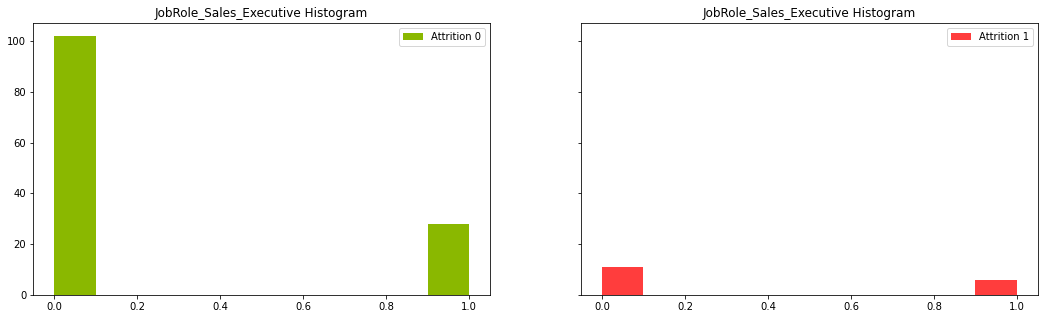

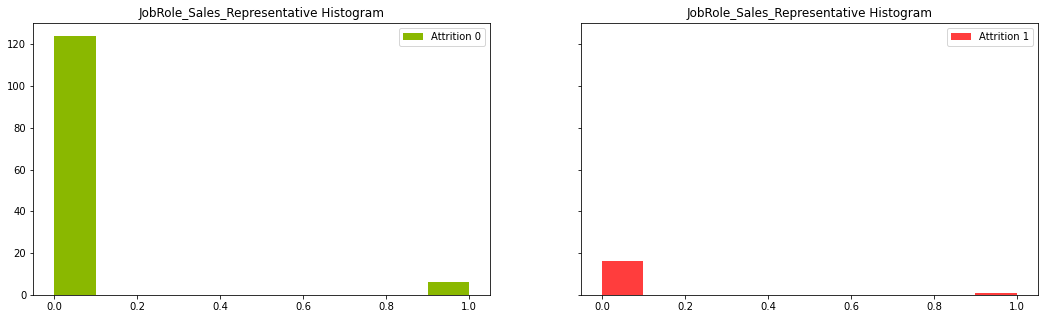

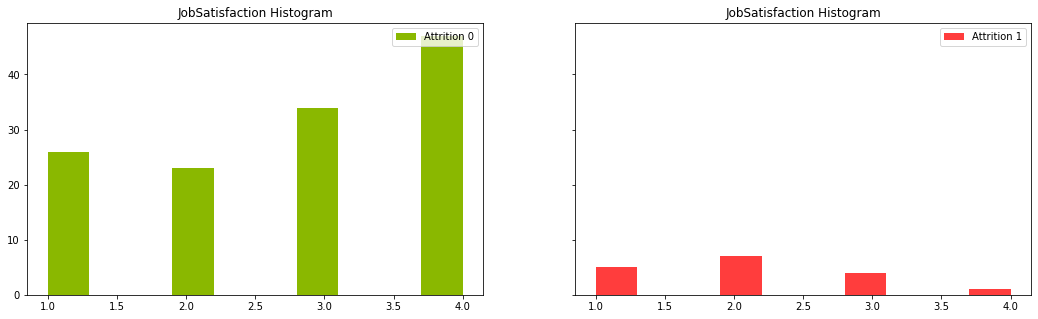

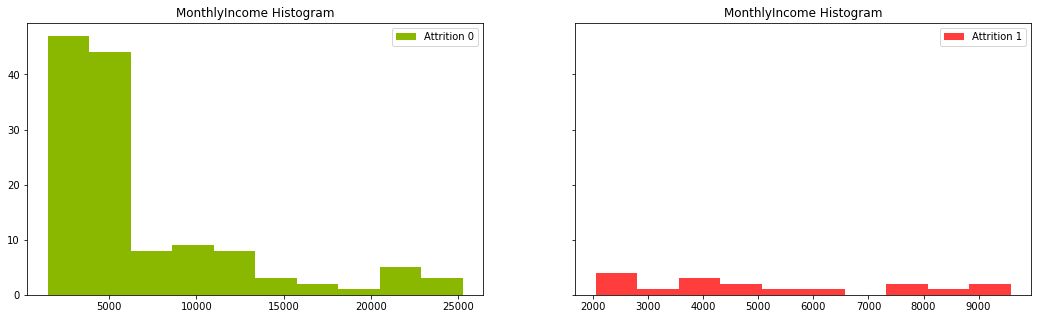

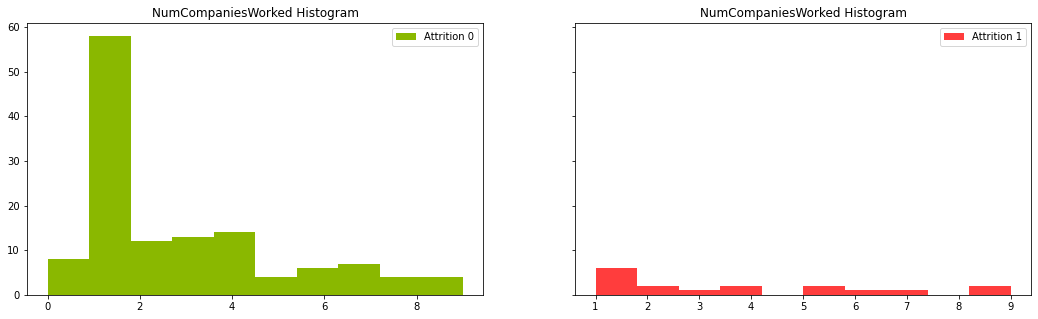

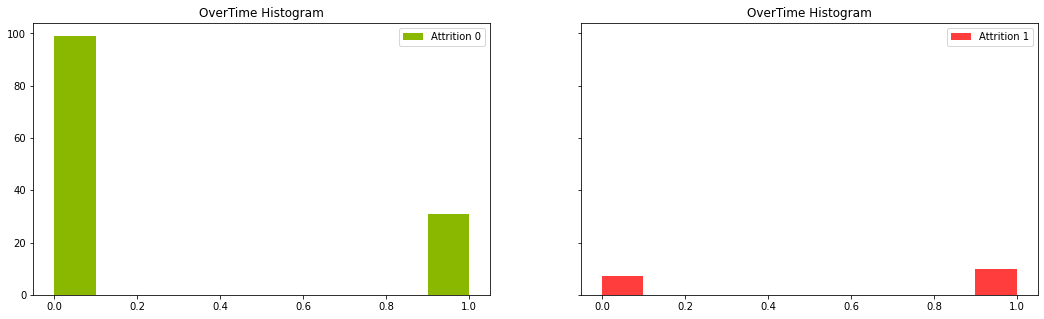

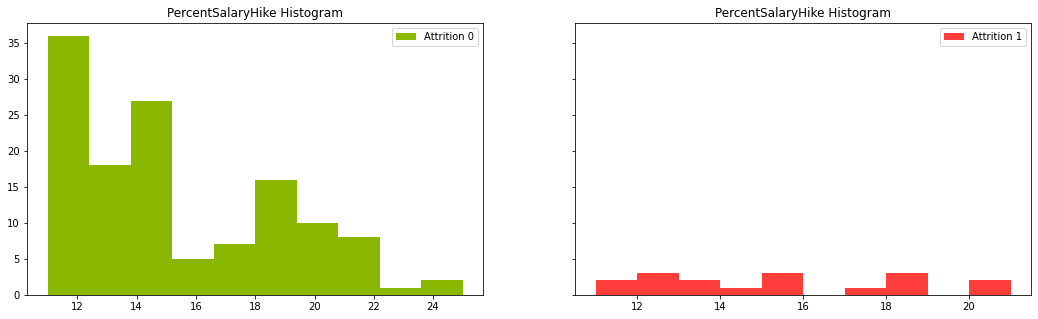

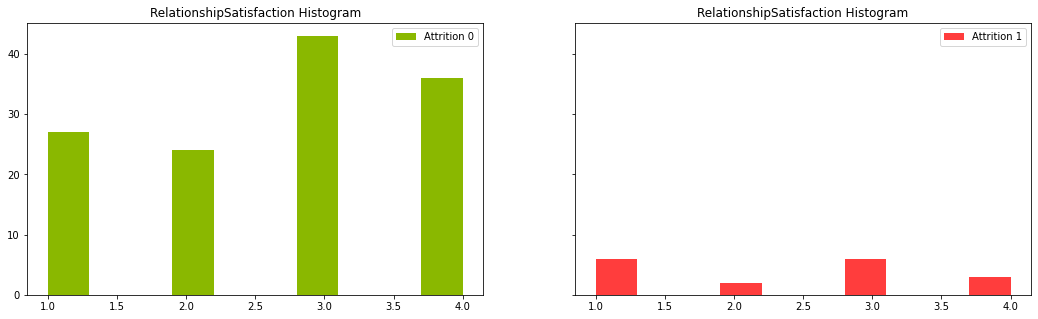

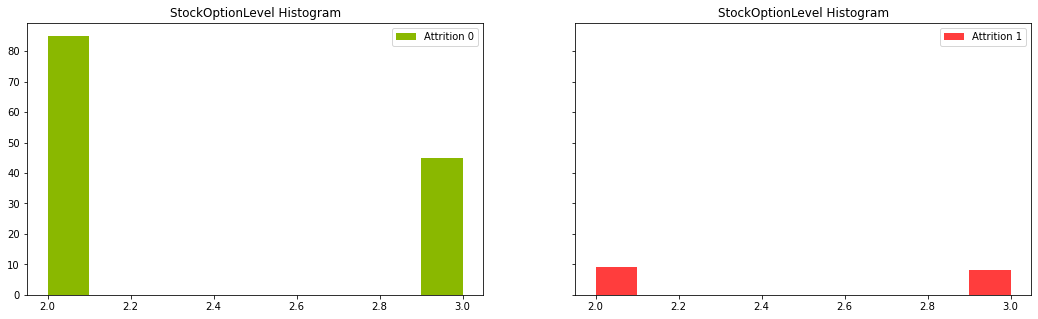

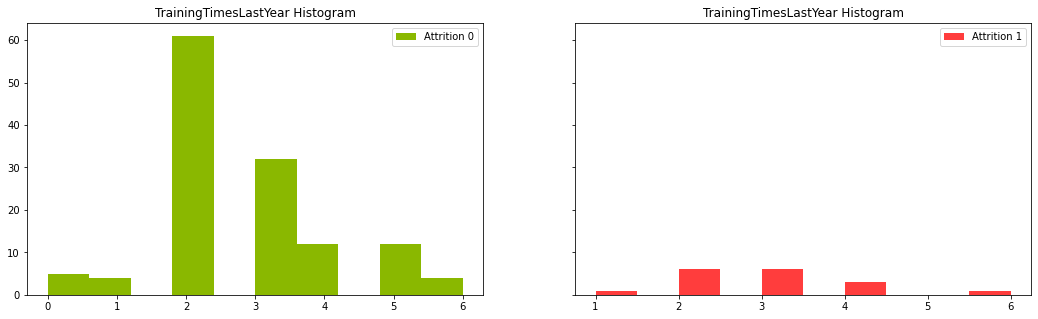

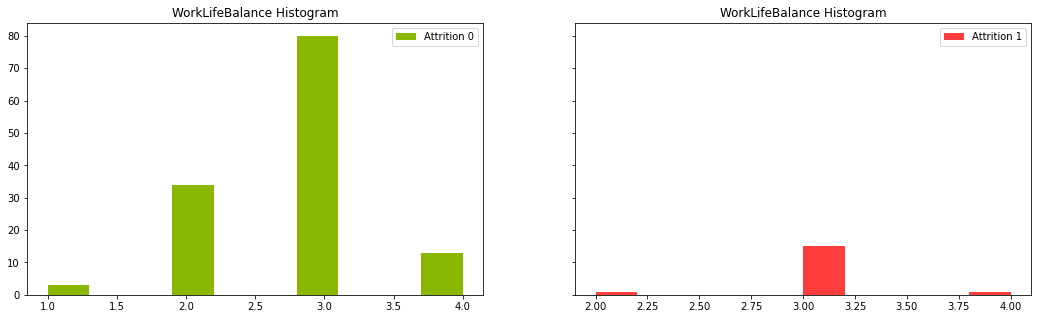

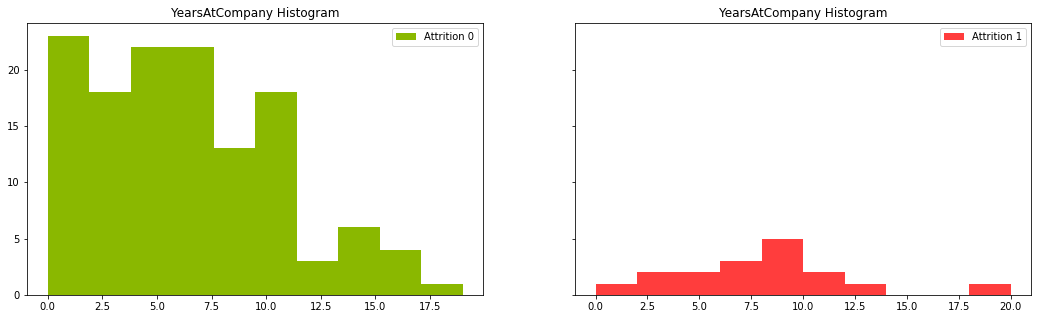

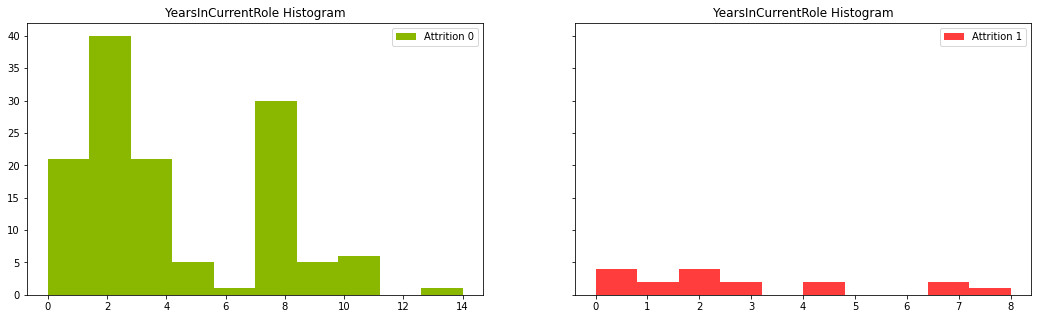

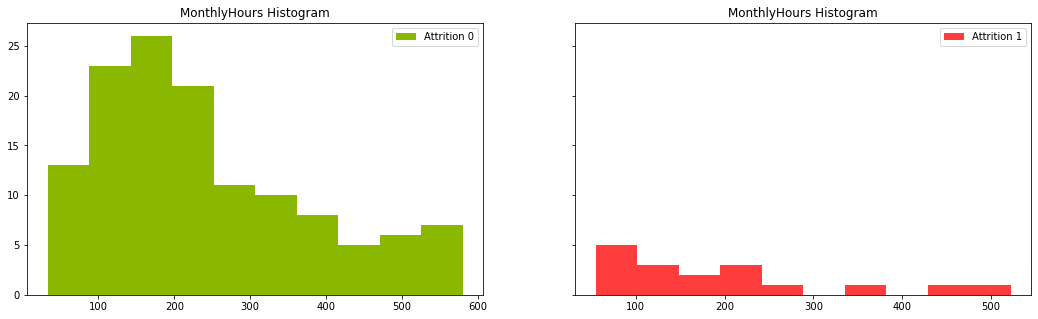

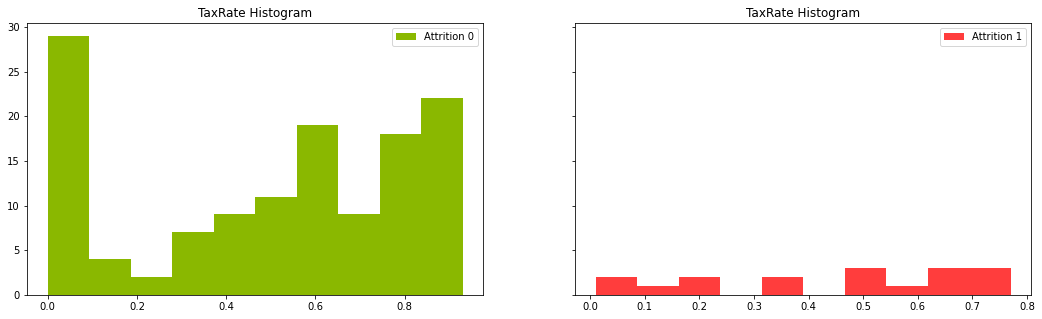

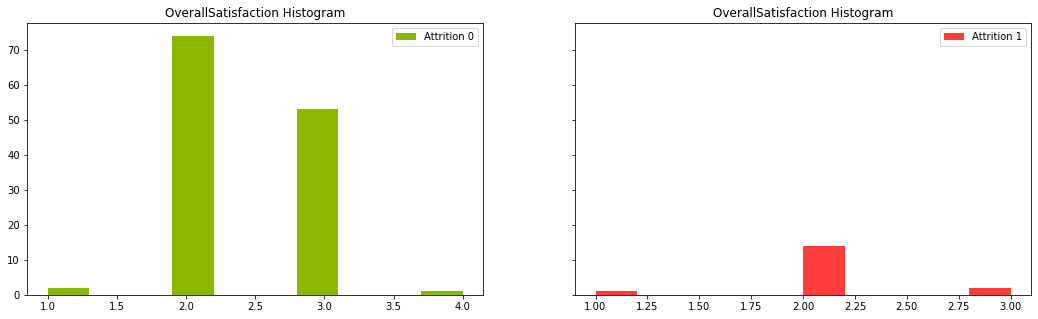

In [96]:
Attrition_0_dataset = df_NON_normalized[(df_NON_normalized['Labels'] == 2) & (df_NON_normalized['Attrition'] == 0)]
Attrition_1_dataset = df_NON_normalized[(df_NON_normalized['Labels'] == 2) & (df_NON_normalized['Attrition'] == 1)]

for column in df_NON_normalized.columns:
    
    if (column != 'Labels' and column != 'Attrition'):
        
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5), sharey = True)
        
        ax[0].hist(Attrition_0_dataset[column], label = 'Attrition 0', color = "#8AB800")
        ax[0].legend(loc='upper right')
        ax[0].set_title(column + " Histogram")
        
        ax[1].hist(Attrition_1_dataset[column], label = 'Attrition 1', color = "#FF3D3D")
        ax[1].legend(loc='upper right')
        ax[1].set_title(column + " Histogram")

        plt.show()

<h3>Description</h3>

The employees of <b>cluster 2</b> who leave are for the most part men, with an age ranging from 24 to 37, 43 to 49, and 53 to 60.
They rarely travel, work a short distance from home, have a medium-low education level, their satisfaction with the work environment is quite high, their involvement in work is medium, their work level is mostly low, some of them are part of the human resources, technical laboratory, manufacturing director, research scientist, sales executive departments.
Their job satisfaction is largely low, as are their salaries.
Many of them have worked in a few companies before, those who work overtime are the majority; their satisfaction with relationships in the workplace is mostly medium-low.
They have recently been updated, their life balance is average, they have been working in the company for a few years, from 0 to about 13, they have recently held their current role, have few working hours and have low overall satisfaction.

<h3>Other Graphs</h3>

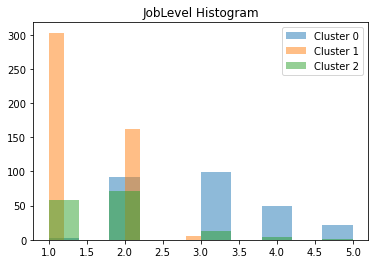

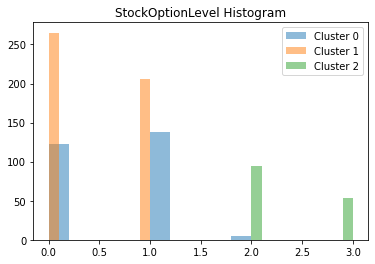

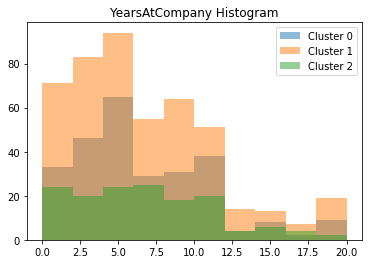

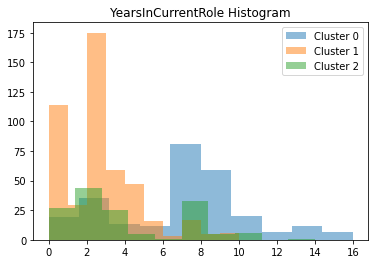

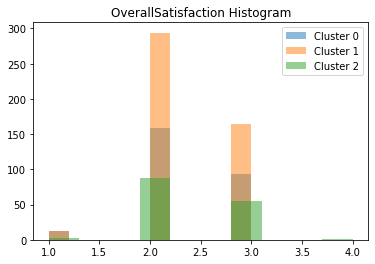

In [38]:
for column in df_NN.columns:
    if column != 'Labels':
    
        for num_cluster in np.unique(df_NN['Labels']):
            plt.hist(df_NN[df_NN['Labels'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

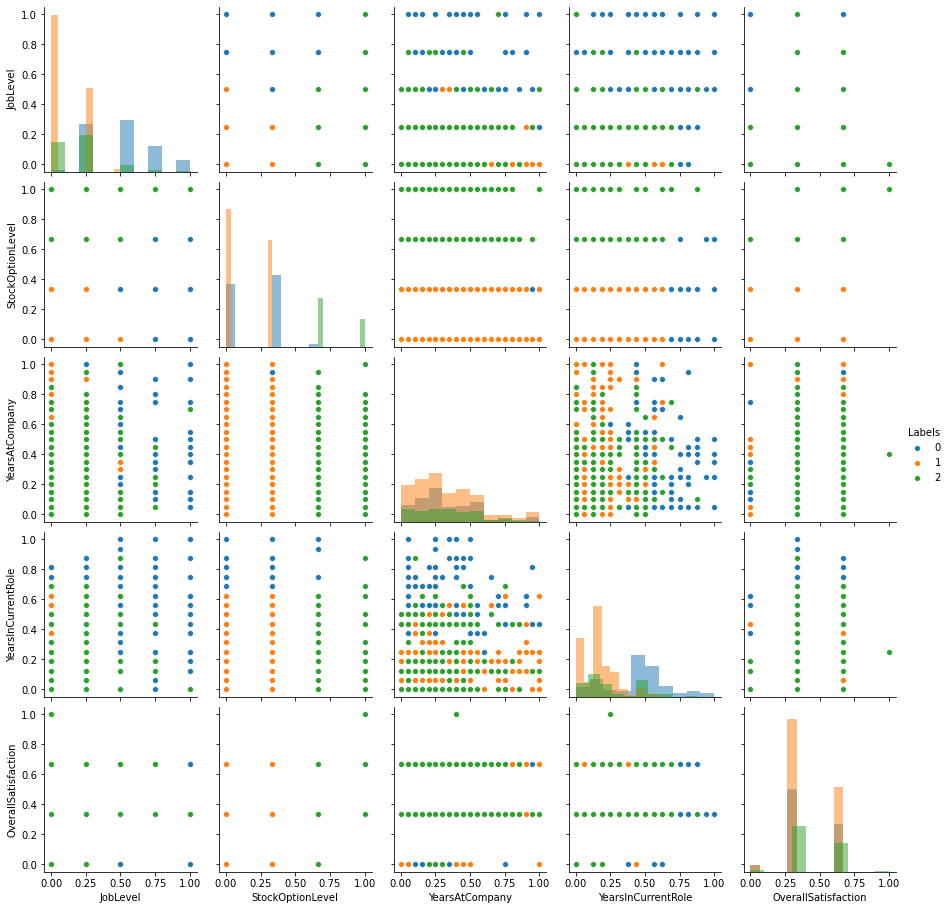

In [39]:
sns.pairplot(df, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")

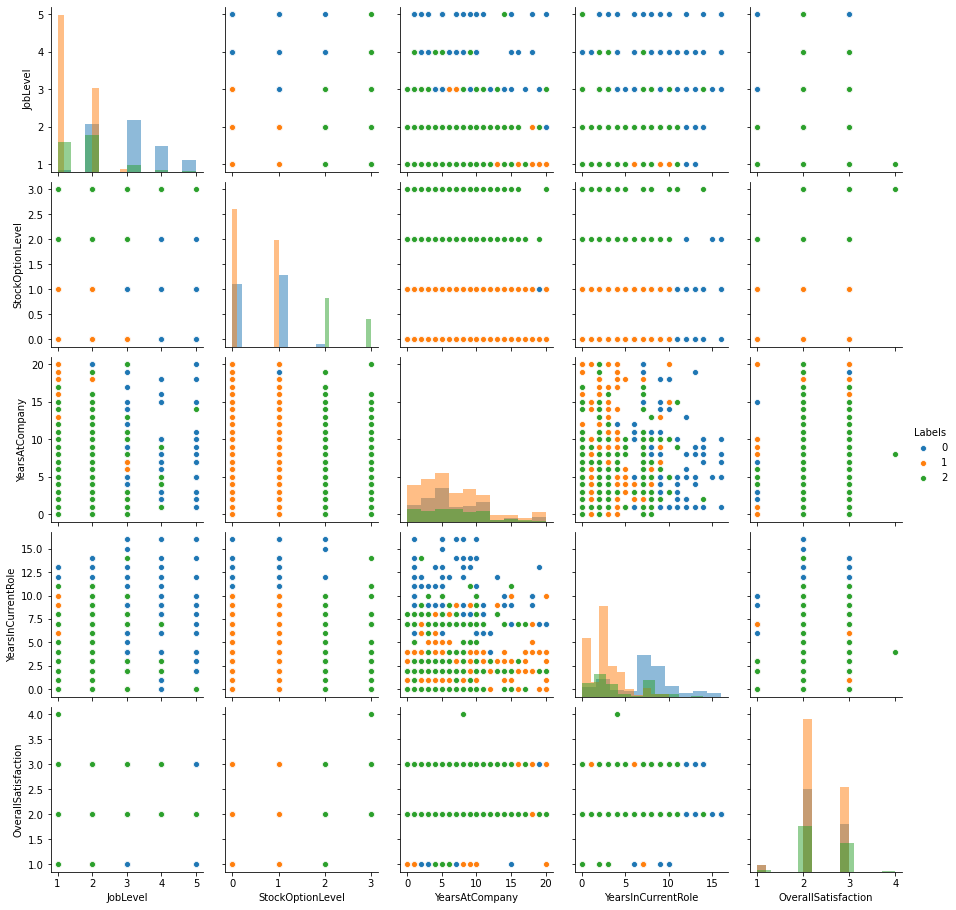

In [40]:
sns.pairplot(df_NN, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")